# Librerias

In [ ]:
# !pip install plot_likert
# !pip install matplotlib==3.1.3
# !pip install pingouin
# !pip install factor_analyzer


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plot_likert
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)
import pingouin as pg
from sklearn.preprocessing import OrdinalEncoder
import scipy.stats as stats
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import warnings
warnings.filterwarnings("ignore")
from Utils import Factorial_fuction

# Preparación de los datos

In [2]:
#Lectura de datos
data_train=pd.read_excel("Data/BD_emprendimiento.xlsx")
data_train.head()

id        Nombre del emprendimiento social (ES):  \
0  1.0                                          Bive   
1  2.0                            Fundación más amor   
2  3.0                 Fundación de lupus del caribe   
3  4.0  Corporación Investigativa Cultural Kariguaña   
4  5.0                            Futbol con corazon   

                                 Dirección  \
0                        Manizales, Caldas   
1                         Oficina virtual.   
2  Cra 50 #80-90,  Barranquilla - Colombia   
3                 Carrera 24 # 24 A - 42     
4           Cra. 59 ##74 - 73, Baranquilla   

                                 Enfoque territorial  \
0  Región Eje Cafetero y Antioquia, Región Pacífi...   
1                                      Región Caribe   
2                                      Región Caribe   
3                                      Región Caribe   
4                                      Región Caribe   

  Enfoque territorial: Especifique Departamento   \
0                                         Caldas   
1                                     Atlántico.   
2                                      Atlántico   
3                                     Atlántico    
4                                      Atlántico   

  Enfoque territorial: Especifique Ciudad/Municipio/Corregimiento  \
0                                      45 municipios                
1                           Barranquilla y aledaños.                
2              Todos los corregimiento del Atlántico                
3                                            Malambo                
4               Corregimientos aledaños al atlántico                

           B.1                                            B.2    B.3   \
0   Foundation                              Está constituida.  2012.0   
1   Foundation                                      No aplica  2020.0   
2   Foundation                                        Ninguna  2017.0   
3  Corporation  Complejidad de documentos y trámites legales.  2020.0   
4   Foundation                                        Ninguno  2005.0   

                    B.4.   ...         F.2.6.2         F.2.6.3  \
0  Several municipalities  ...  Strongly agree           Agree   
1         local community  ...  Strongly agree  Strongly agree   
2          One department  ...           Agree           Agree   
3  Several municipalities  ...           Agree           Agree   
4     Colombia / National  ...           Agree           Agree   

          F.2.6.4         F.2.6.5         F.2.6.6         F.2.7.1  \
0  Strongly agree  Strongly agree           Agree  Strongly agree   
1  Strongly agree           Agree  Strongly agree  Strongly agree   
2           Agree           Agree           Agree           Agree   
3           Agree           Agree           Agree           Agree   
4           Agree           Agree           Agree           Agree   

          F.2.7.2         F.2.7.3         F.2.7.4         F.2.7.5  
0  Strongly agree           Agree  Strongly agree  Strongly agree  
1  Strongly agree  Strongly agree  Strongly agree  Strongly agree  
2           Agree           Agree           Agree           Agree  
3           Agree           Agree  Strongly agree           Agree  
4           Agree           Agree           Agree           Agree  

[5 rows x 244 columns]

Text(0, 0.5, 'Region')

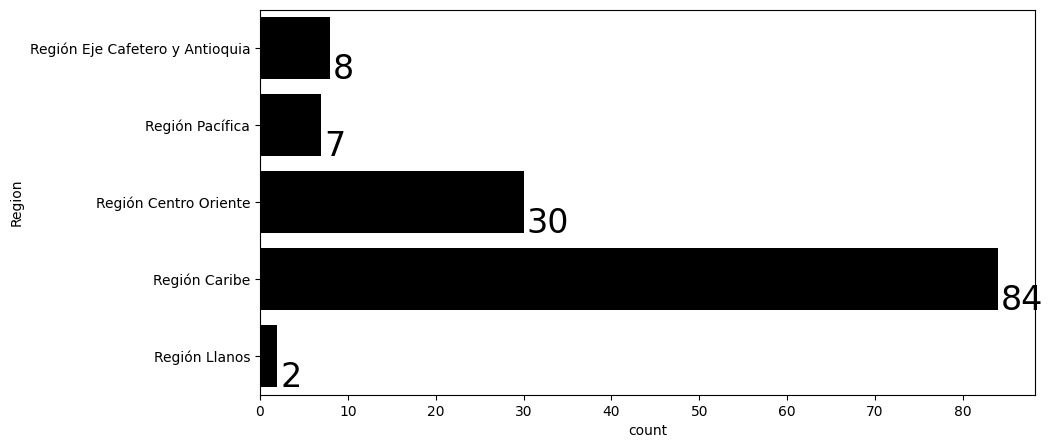

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
red = [data_train.iloc[:,3][i].split(sep=',') for i in range(120)]
redes=[elem for sublista in red for elem in sublista]
redes=[x.replace(',','') for x in redes]
redes=[x.strip() for x in redes]
redes=pd.DataFrame({'Tipo':redes})
ax=sns.countplot(y="Tipo", data=redes, color='k')
Factorial_fuction.without_hueH(ax,redes['Tipo'])
plt.ylabel("Region")


# **Part 1**

In [ ]:
#cantidad de datos
len_data=len(data_train)
print("Numero de variables: ",data_train.shape[1])
print("Numero de observaciones: ",len(data_train))

Numero de variables:  244
Numero de observaciones:  120


# Variables independientes

## Factores sociales

Text(0.5, 0, 'Frecuency')

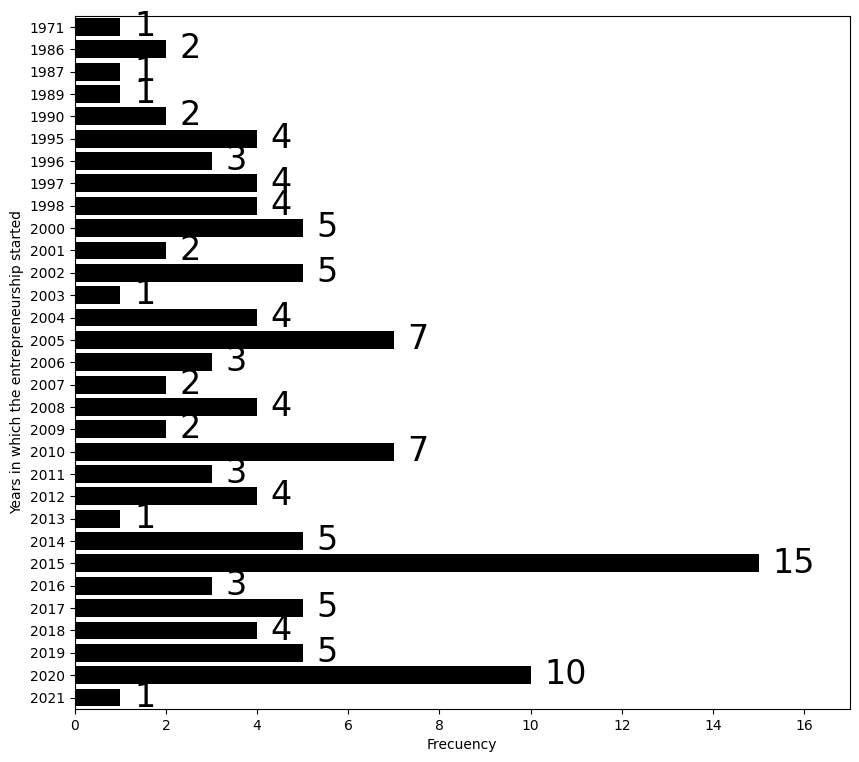

In [80]:
#B3 
fig, ax = plt.subplots(1, 1, figsize=(10, 9))
ax=sns.countplot(y=data_train['B.3 '].astype('int'), color='k')
Factorial_fuction.without_hueH(ax,data_train['B.3 '])
ax.set_xlim(0,max(data_train['B.3 '].value_counts())+2)
plt.ylabel("Years in which the entrepreneurship started")
plt.xlabel('Frecuency')

In [ ]:
# plt.figure(figsize=(45,20))
# actor = [data_train.iloc[:,10][i].split(sep=',') for i in range(120)]
# actores=[elem for sublista in actor for elem in sublista]
# actores=[x.replace(',','') for x in actores]
# actores=[x.strip() for x in actores]
# actores=pd.DataFrame({'Tipo':actores})
# ax=sns.countplot(actores['Tipo'],color='k')
# ax.set_ylim(0,max(actores['Tipo'].value_counts())+10)
# with_hue(ax,actores['Tipo'])
# plt.yticks(fontsize = 24, rotation=0)
# plt.xticks(fontsize = 28, rotation=0)
# # plt.ylabel("Network types", fontsize=18)
# plt.ylabel('Frecuency', fontsize=24)
# plt.xlabel("")

### Aspectos sociales

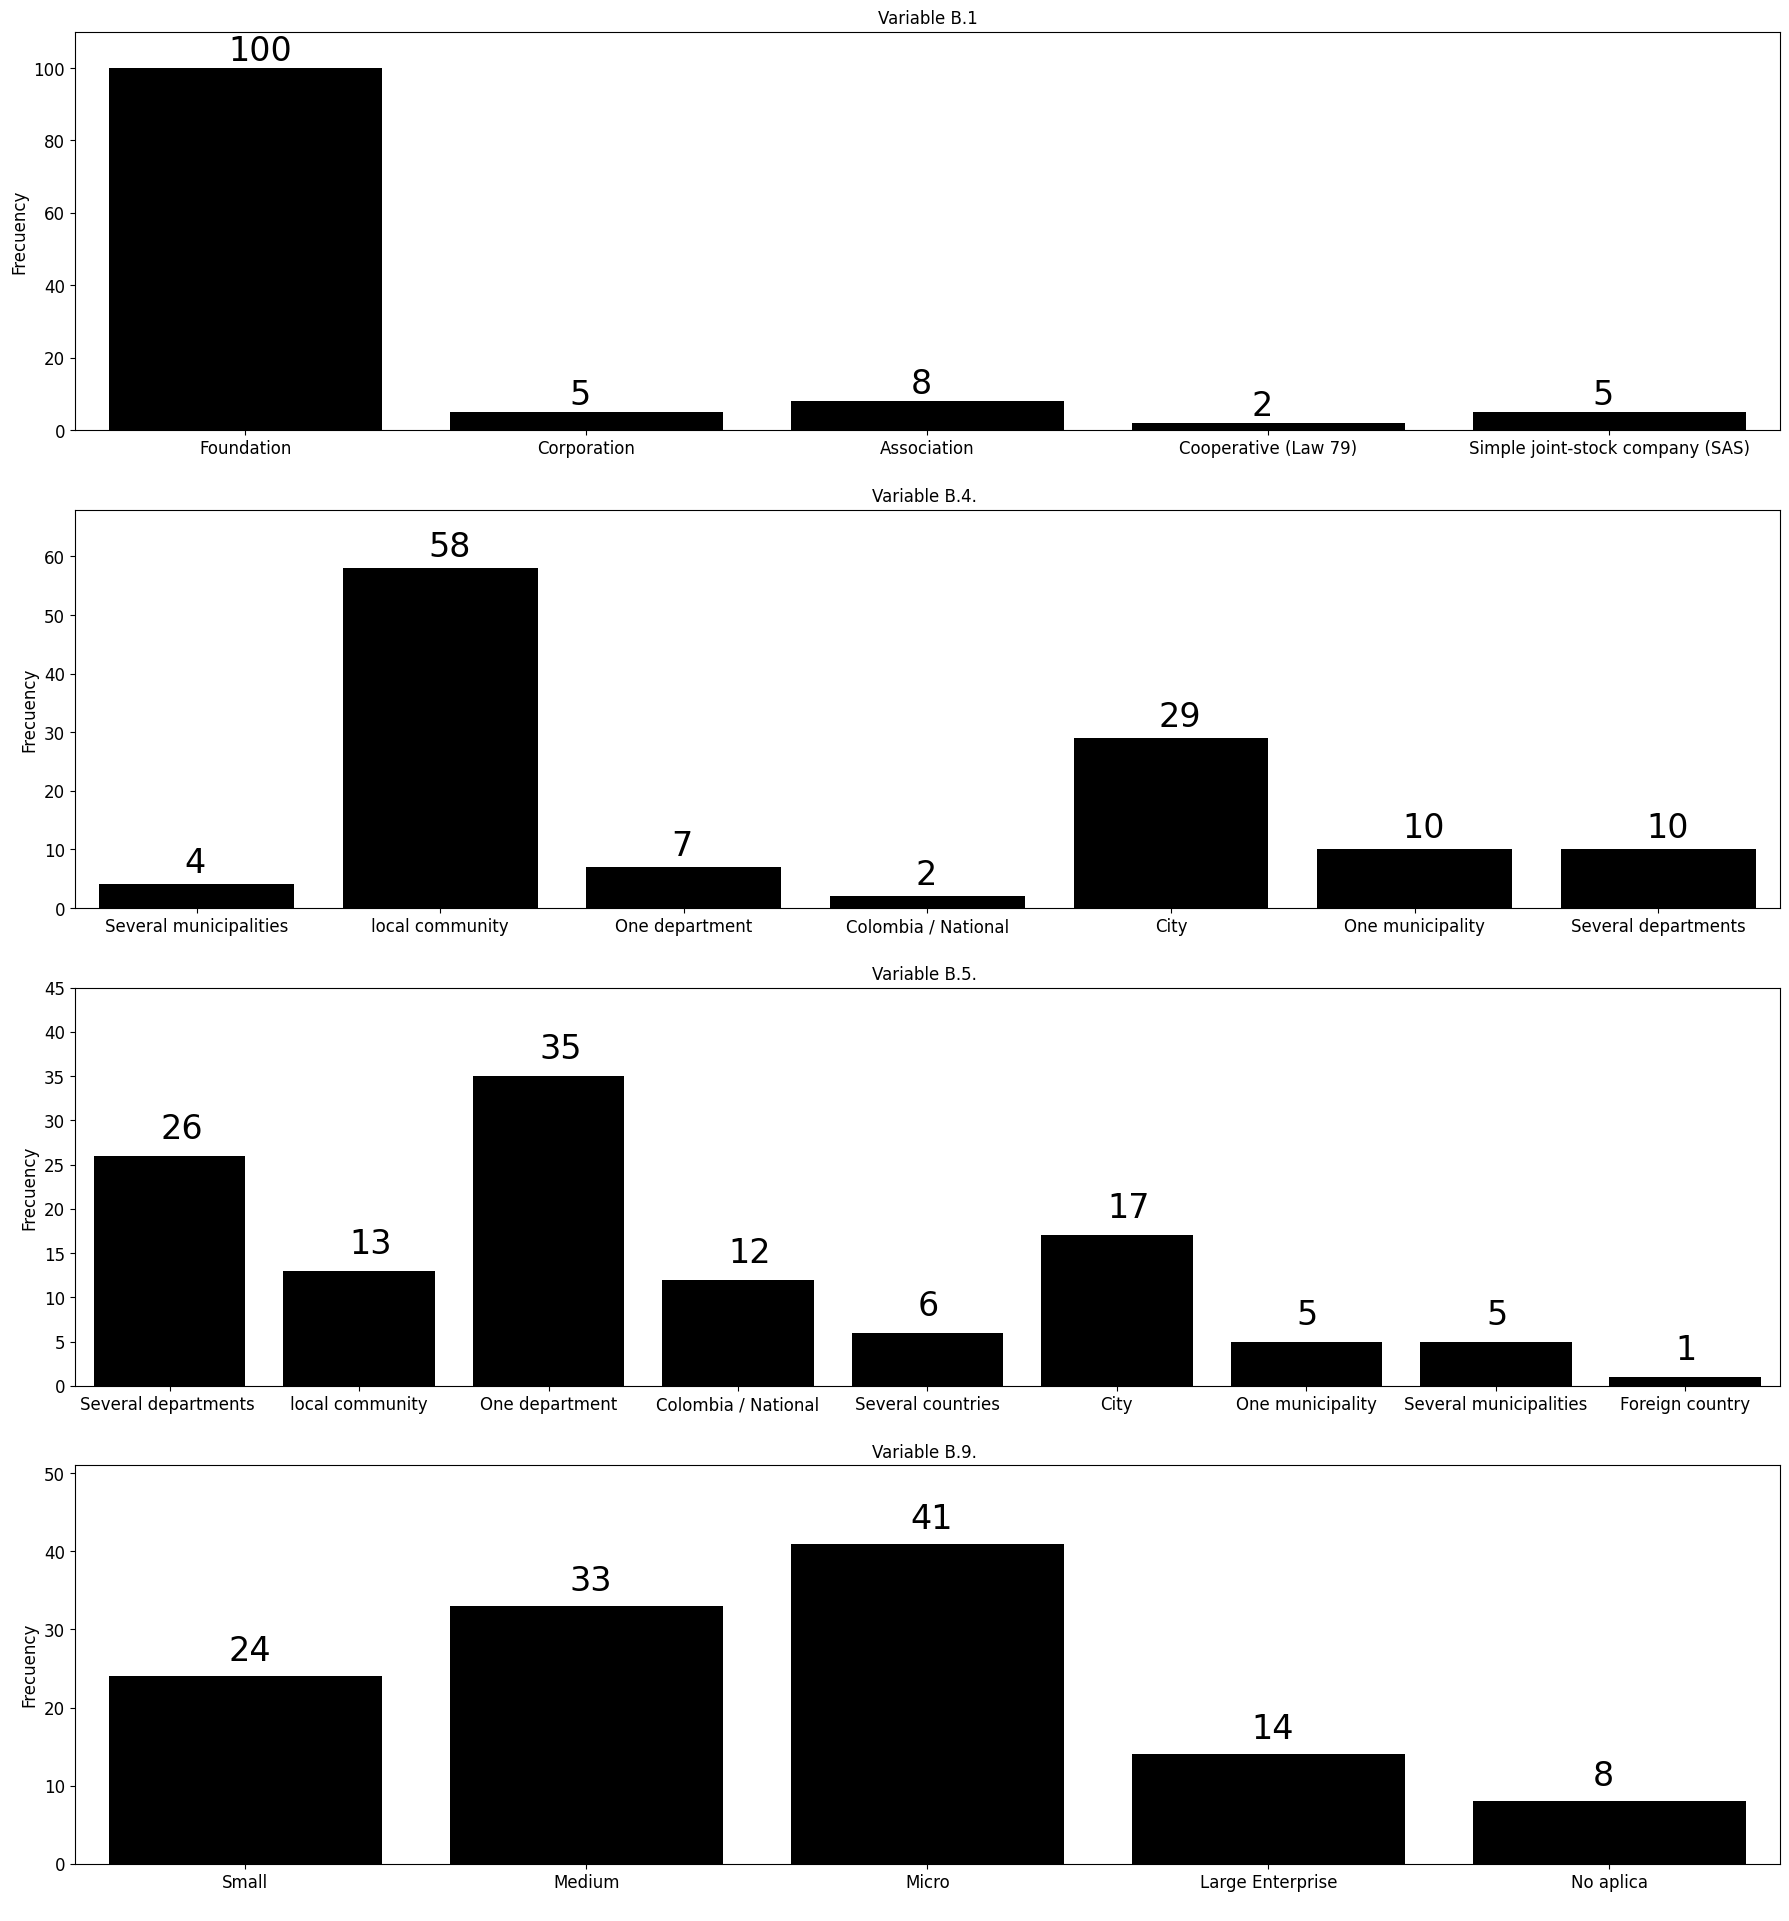

In [83]:
# variables nominales 22, 30
plt.figure(figsize=(22,30))
vars_to_plot = ['B.1', 'B.4. ', 'B.5. ','B.9. ']
for i, var in enumerate(vars_to_plot):
    plt.subplot(5,1,i+1)
    ax=sns.countplot(data_train[var], color='k')
    ax.set_ylim(0,max(data_train[var].value_counts())+10)
    Factorial_fuction.with_hue(ax,data_train[var])
    title_string = "Variable " + var
    plt.ylabel("Frecuency", fontsize=12)
    plt.xlabel(" ")
    plt.xticks(fontsize = 12, rotation=0) 
    plt.yticks(fontsize = 12)
    plt.title(title_string,fontsize = 12 )


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Small'),
  Text(0, 1, 'Medium'),
  Text(0, 2, 'Micro'),
  Text(0, 3, 'Large Enterprise'),
  Text(0, 4, 'No aplica')])

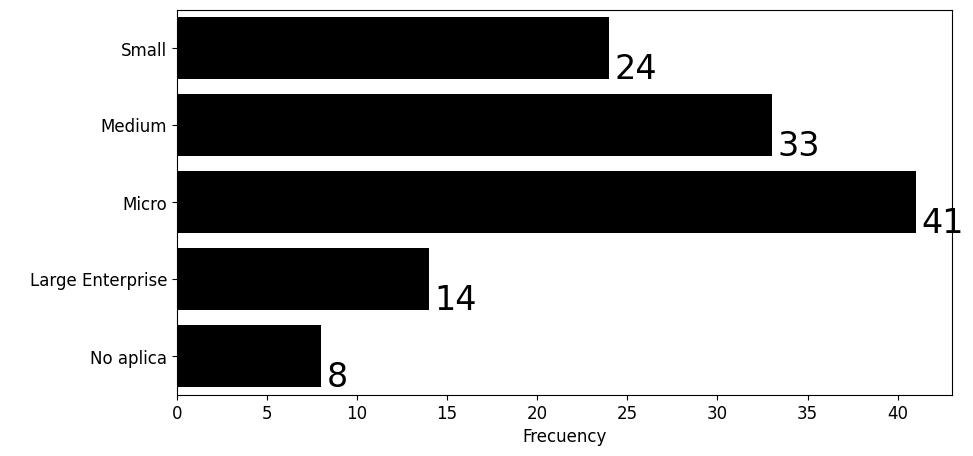

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax=sns.countplot(y=data_train['B.9. '], color='k')
Factorial_fuction.without_hueH(ax,data_train['B.9. '])
ax.set_xlim(0,max(data_train['B.9. '].value_counts())+2)
plt.xlabel("Frecuency", fontsize=12)
plt.ylabel(" ")
plt.xticks(fontsize = 12, rotation=0) 
plt.yticks(fontsize = 12)
# plt.title("Variable B.9",fontsize = 18 )

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Health'),
  Text(0, 1, 'Education'),
  Text(0, 2, 'Peace, human rights and participation'),
  Text(0, 3, 'Orange economy'),
  Text(0, 4, 'Environment'),
  Text(0, 5, 'Gender equity'),
  Text(0, 6, 'Agricultural development'),
  Text(0, 7, 'None')])

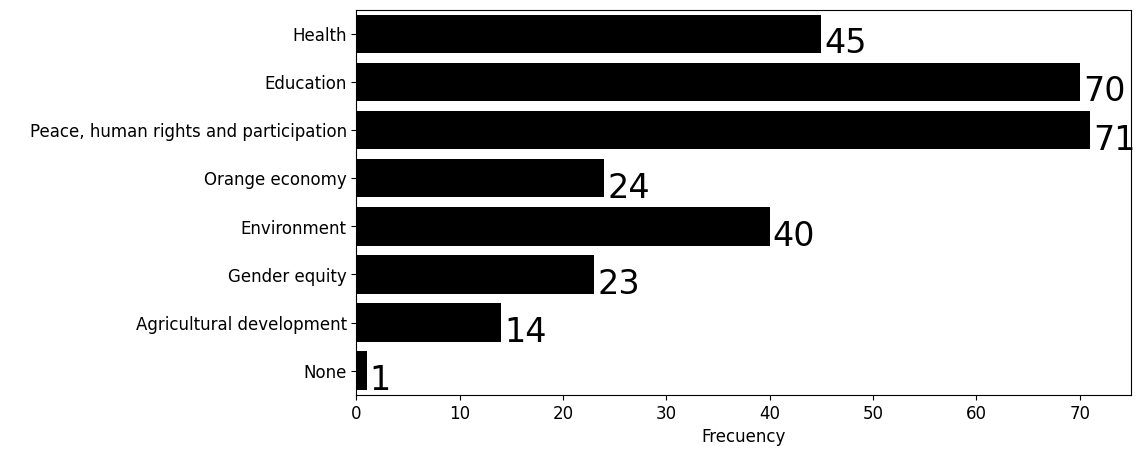

In [87]:
#B6
red = [data_train.iloc[:,11][i].split(sep=',') for i in range(120)]
redes=[elem for sublista in red for elem in sublista]
redes=[x.replace(',','') for x in redes]
redes=[x.strip() for x in redes]
redes=pd.DataFrame({'Tipo':redes})
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax=sns.countplot(y="Tipo", data=redes, color='k')
Factorial_fuction.without_hueH(ax,redes['Tipo'])
ax.set_xlim(0,max(redes["Tipo"].value_counts())+4)
labels = ("Health", "Education", "Peace, human rights and participation", "Orange economy", "Environment", "Gender equity", 
          "Agricultural development", "None")
ax.set_yticklabels(labels)
plt.ylabel(" ")
# plt.ylabel("Sector", fontsize=18)
plt.xlabel("Frecuency", fontsize=12)
plt.xticks(fontsize = 12, rotation=0) 
plt.yticks(fontsize = 12)
# plt.title("Variable B.6",fontsize = 18 )

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

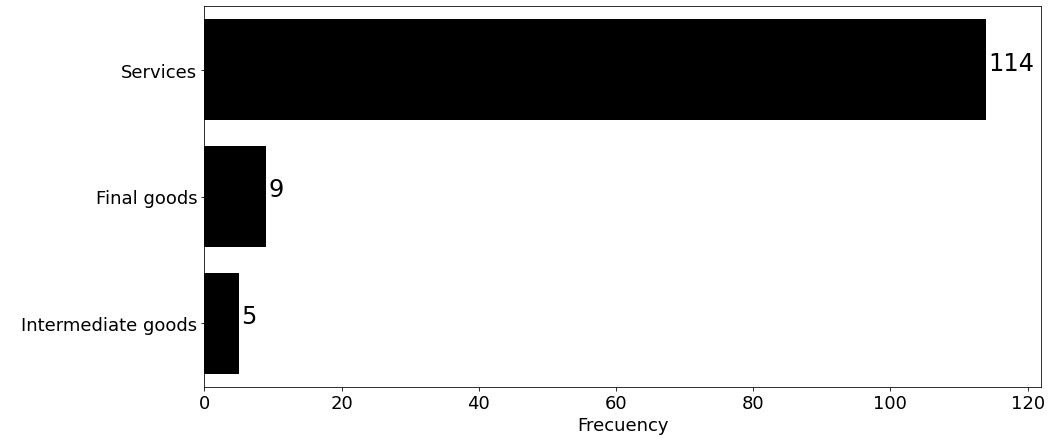

In [ ]:
#B7
red = [data_train.iloc[:,12][i].split(sep=',') for i in range(120)]
redes=[elem for sublista in red for elem in sublista]
redes=[x.replace(',','') for x in redes]
redes=[x.strip() for x in redes]
redes=pd.DataFrame({'Tipo':redes})
ax=sns.countplot(y="Tipo", data=redes,color='k')
Factorial_fuction.without_hueH(ax,redes['Tipo'])
ax.set_xlim(0,max(redes["Tipo"].value_counts())+8)
labels = ("Services", "Final goods", "Intermediate goods")
ax.set_yticklabels(labels)
# plt.ylabel("Type of products", fontsize=18)
plt.ylabel(" ") 
plt.xlabel("Frecuency", fontsize=18)
plt.xticks(fontsize = 18, rotation=0) 
plt.yticks(fontsize = 18)
# plt.title("Variable B.7",fontsize = 18 )

Text(0, 0.5, ' ')

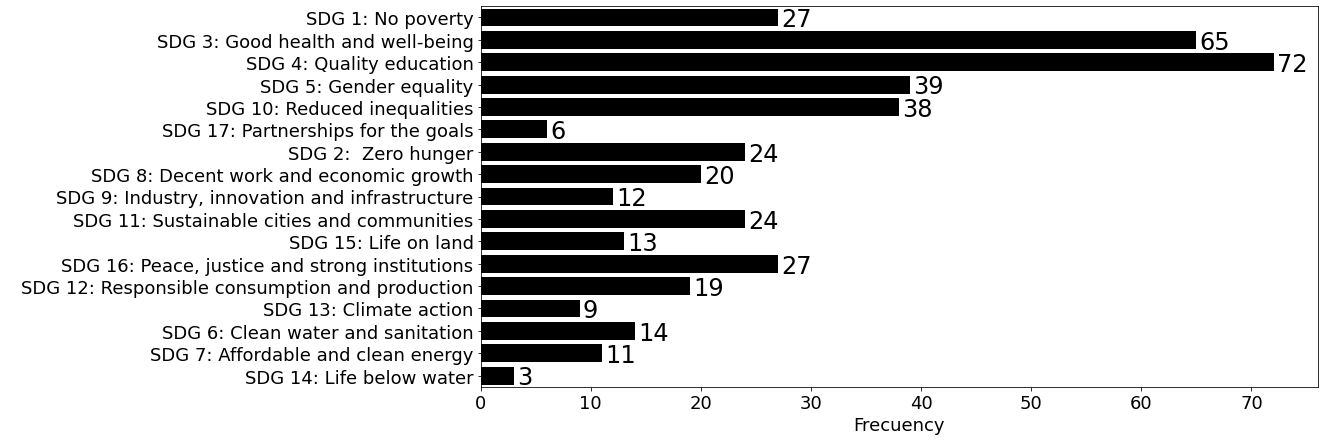

In [ ]:
#B8
red = [data_train.iloc[:,13][i].split(sep=',') for i in range(120)]
redes=[elem for sublista in red for elem in sublista]
redes=[x.replace(',','') for x in redes]
redes=[x.strip() for x in redes]
redes=pd.DataFrame({'Tipo':redes})
# fig, ax = plt.subplots(1, 1, figsize=(25, 12))
ax=sns.countplot(y="Tipo", data=redes,color='k')
Factorial_fuction.without_hueH(ax,redes['Tipo'])
ax.set_xlim(0,max(redes["Tipo"].value_counts())+4)
labels = ("SDG 1: No poverty", 
          "SDG 3: Good health and well-being", 
          "SDG 4: Quality education",
          "SDG 5: Gender equality",
          "SDG 10: Reduced inequalities",
          "SDG 17: Partnerships for the goals",
          "SDG 2:  Zero hunger",
          "SDG 8: Decent work and economic growth",
          "SDG 9: Industry, innovation and infrastructure",
          "SDG 11: Sustainable cities and communities",
          "SDG 15: Life on land",
          "SDG 16: Peace, justice and strong institutions",
          "SDG 12: Responsible consumption and production",
          "SDG 13: Climate action",
          "SDG 6: Clean water and sanitation",
          "SDG 7: Affordable and clean energy",
          "SDG 14: Life below water")
ax.set_yticklabels(labels)
# plt.ylabel("Sustainable Development Goals", fontsize=18)
plt.xlabel("Frecuency", fontsize=18)
plt.xticks(fontsize = 18, rotation=0) 
plt.yticks(fontsize = 18)
# plt.title("Variable B.8",fontsize = 18 )
plt.ylabel(" ")

In [ ]:
# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (35,12)

Text(0, 0.5, ' ')

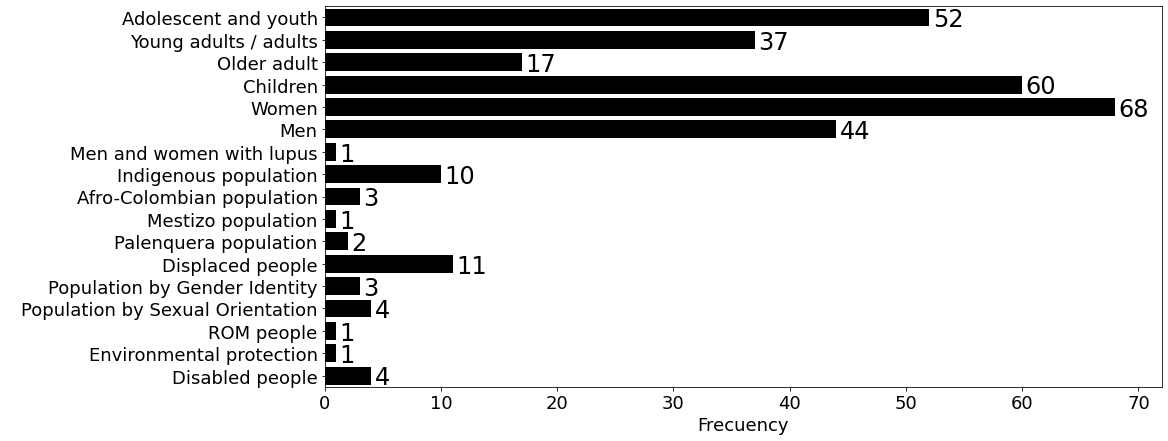

In [ ]:
#B10
red = [data_train.iloc[:,15][i].split(sep=',') for i in range(120)]
redes=[elem for sublista in red for elem in sublista]
redes=[x.replace(',','') for x in redes]
redes=[x.strip() for x in redes]
redes=pd.DataFrame({'Tipo':redes})
ax=sns.countplot(y="Tipo", data=redes, color='k')
Factorial_fuction.without_hueH(ax,redes['Tipo'])
ax.set_xlim(0,max(redes["Tipo"].value_counts())+4)
labels = ("Adolescent and youth", 
          "Young adults / adults", 
          "Older adult",
          "Children",
          "Women",
          "Men",
          "Men and women with lupus",
          "Indigenous population",
          "Afro-Colombian population",
          "Mestizo population",
          "Palenquera population",
          "Displaced people",
          "Population by Gender Identity",
          "Population by Sexual Orientation",
          "ROM people",
          "Environmental protection",
          "Disabled people")
ax.set_yticklabels(labels)
# plt.ylabel("Type of population primarily served ", fontsize=18)
plt.xlabel("Frecuency", fontsize=18)
plt.xticks(fontsize = 18, rotation=0) 
plt.yticks(fontsize = 18)
# plt.title("Variable B.10",fontsize = 18 )
plt.ylabel(" ")

<AxesSubplot: xlabel='Percentage of Responses'>

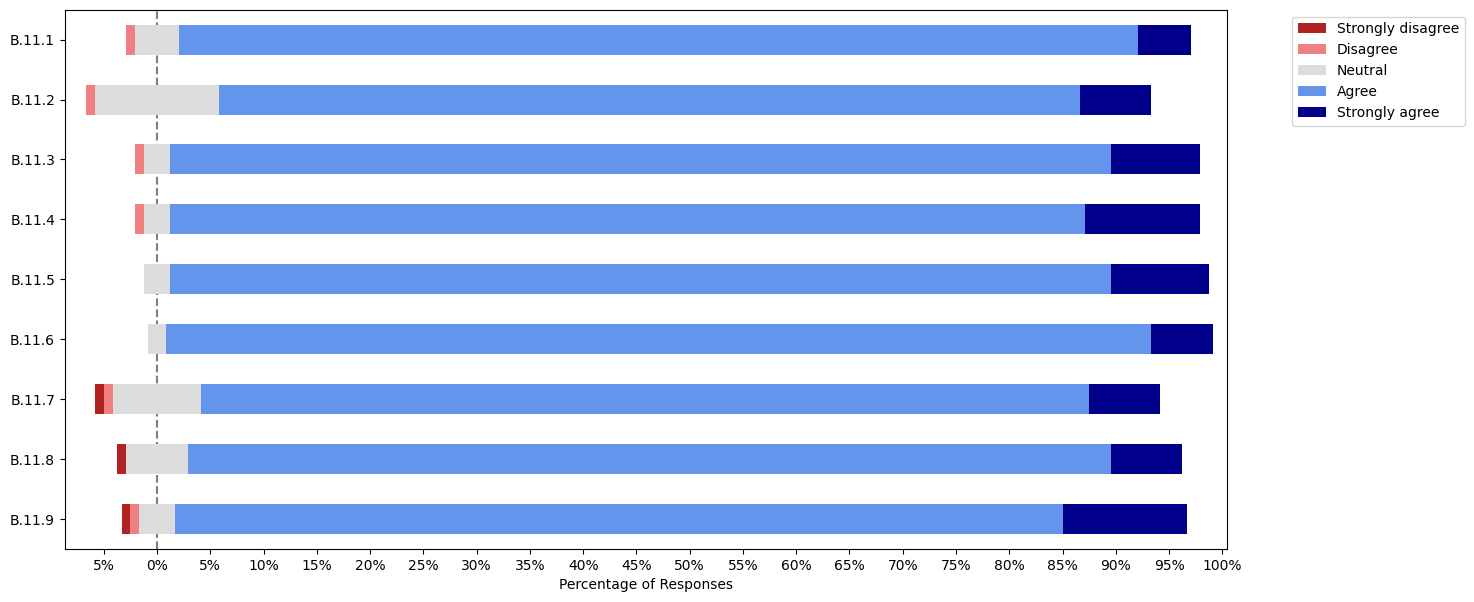

In [3]:
# B.11. En relación con el emprendimiento social: ¿En qué nivel está de acuerdo con las siguientes afirmaciones?

s1=data_train.iloc[:,16:25]
coln=s1.columns
# define my selections
myscale1 = \
    ['Strongly disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s1, myscale1, plot_percentage=True)


In [4]:
# codificar las variables
Factorial_fuction.Coding(s1,myscale1)
#validez
Factorial_fuction.validez(s1)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.7913957447949486
   
Validez de constructo: 
--------------------------------------
Bartlett test: 552.5761686688162  P-Value: 9.753676912475663e-94
KMO: 0.7001503874739321


In [ ]:
# #v de kramer
# v_kramer(s1['B.11.1'],data_train.iloc[:,220])

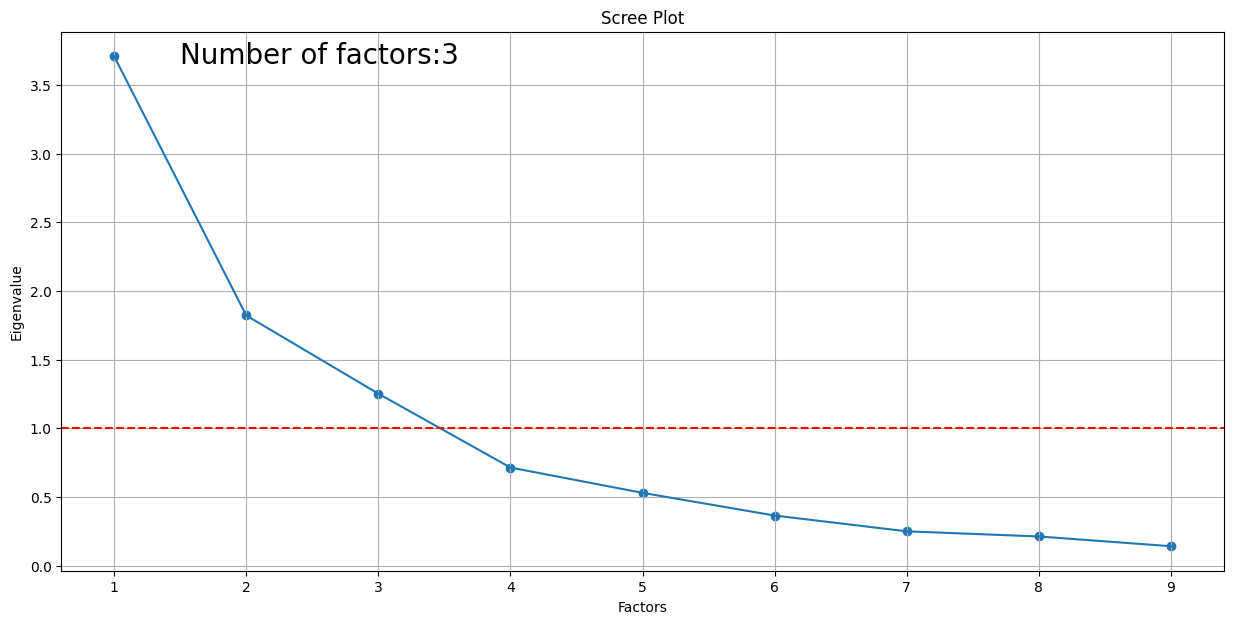

In [5]:
Factorial_fuction.Nfactores(s1)

In [6]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.set_params(n_factors=3, rotation='varimax')
fa.fit(s1.select_dtypes(include = "float64"))
fact = fa.loadings_
a = np.zeros((len(fact), len(fact[0,:])))
for i in range(len(fact)):
    arr = fact[i,:]
    ind=np.where(arr==max(arr))[0]
    a[i,ind]=fact[i,:].max()
    
pd.DataFrame(np.round(a,3), 
             columns=['Factor '+str(i+1) for i in range(len(fact[0,:]))],
             index=coln)


Factor 1  Factor 2  Factor 3
B.11.1     0.757     0.000     0.000
B.11.2     0.662     0.000     0.000
B.11.3     0.000     0.876     0.000
B.11.4     0.000     0.674     0.000
B.11.5     0.000     0.626     0.000
B.11.6     0.000     0.000     0.366
B.11.7     0.632     0.000     0.000
B.11.8     0.823     0.000     0.000
B.11.9     0.000     0.000     0.780

In [7]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1  factor 2  factor 3
ss Loadings     2.269321  1.943672  1.600399
Proportion Var  0.252147  0.215964  0.177822
Cumulative Var  0.252147  0.468110  0.645932

<AxesSubplot: xlabel='Percentage of Responses'>

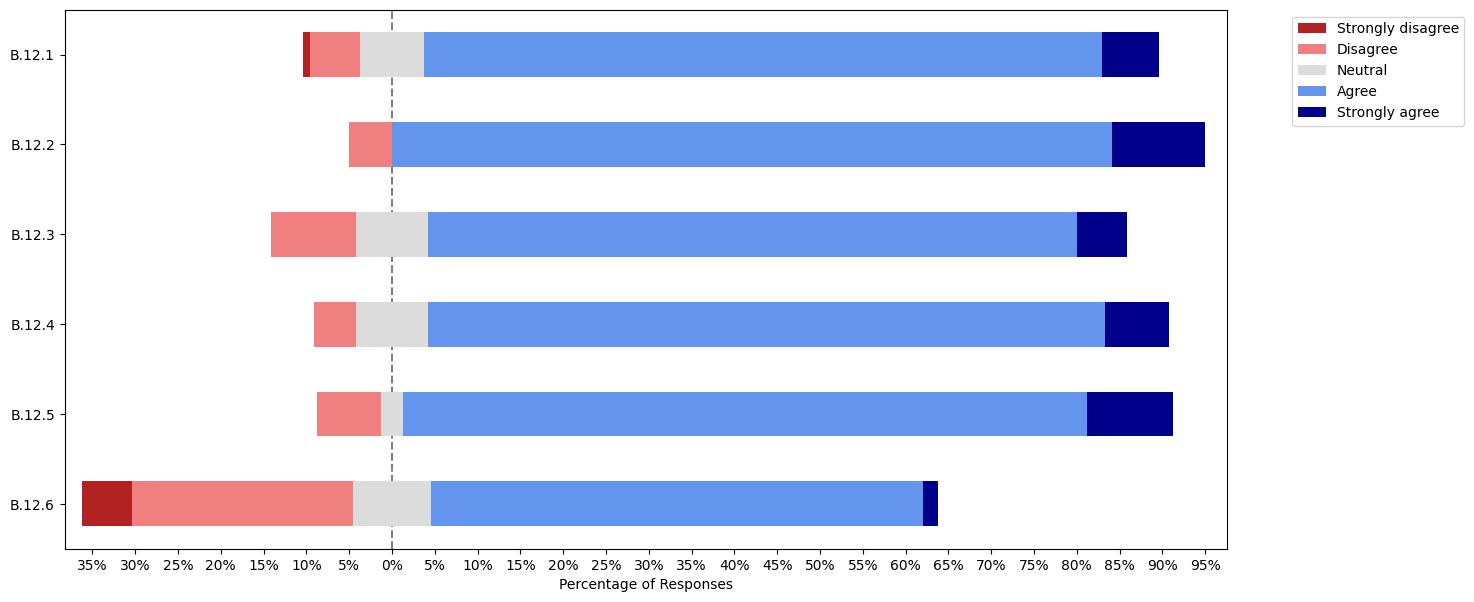

In [31]:
# B.12. En relación con el emprendimiento social como instrumento de inversión social: ¿En qué nivel está de acuerdo con las siguientes afirmaciones ?

s2=data_train.iloc[:,25:31]
coln=s2.columns
# define my selections
myscale1 = \
    ['Strongly disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s2, myscale1, plot_percentage=True)

In [32]:
# codificar las variables
Factorial_fuction.Coding(s2,myscale1)
#validez
Factorial_fuction.validez(s2)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.7811231415133054
   
Validez de constructo: 
--------------------------------------
Bartlett test: 300.71116942603373  P-Value: 3.97742478995918e-55
KMO: 0.8024821232193888


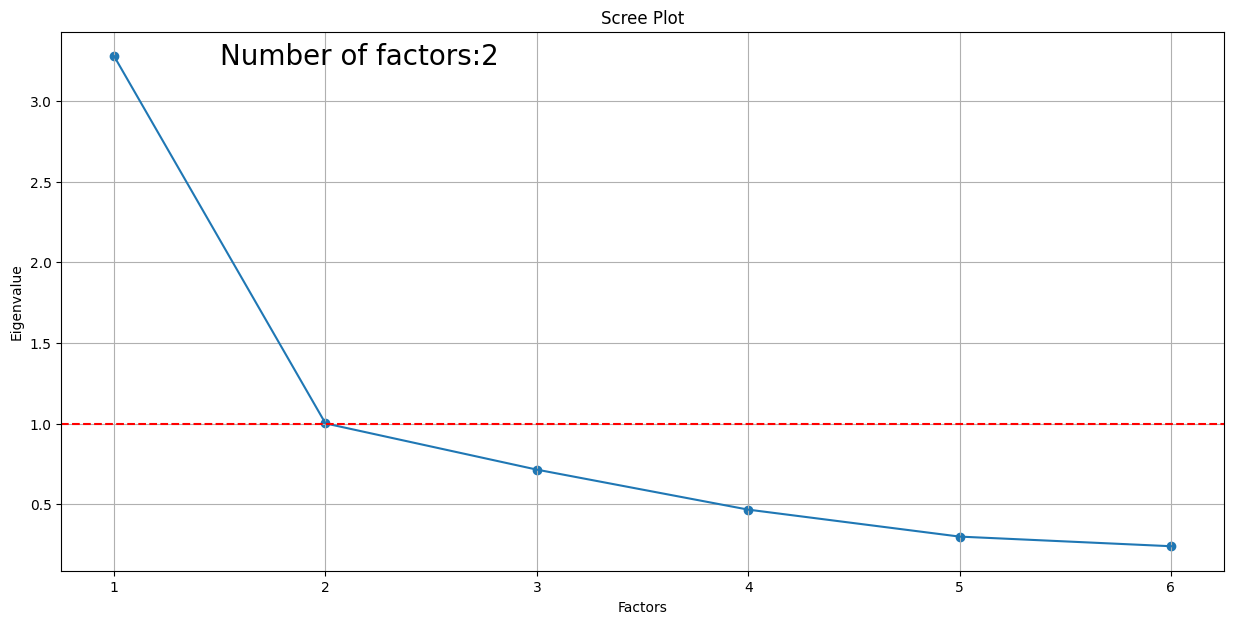

In [33]:
Factorial_fuction.Nfactores(s2)

In [35]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s2.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s2.select_dtypes(include = "float64"))
fact = fa.loadings_
a = np.zeros((len(fact), len(fact[0,:])))
for i in range(len(fact)):
    arr = fact[i,:]
    ind=np.where(arr==max(arr))[0]
    a[i,ind]=fact[i,:].max()
    
pd.DataFrame(np.round(a,3), 
             columns=['Factor '+str(i+1) for i in range(len(fact[0,:]))],
             index=coln)


Factor 1  Factor 2
B.12.1     0.548     0.000
B.12.2     0.864     0.000
B.12.3     0.000     0.433
B.12.4     0.818     0.000
B.12.5     0.707     0.000
B.12.6     0.000     0.625

In [36]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1  factor 2
ss Loadings     2.365159  1.007443
Proportion Var  0.394193  0.167907
Cumulative Var  0.394193  0.562100

## Factores Institucionales

### Apoyo del gobierno

<AxesSubplot: xlabel='Percentage of Responses'>

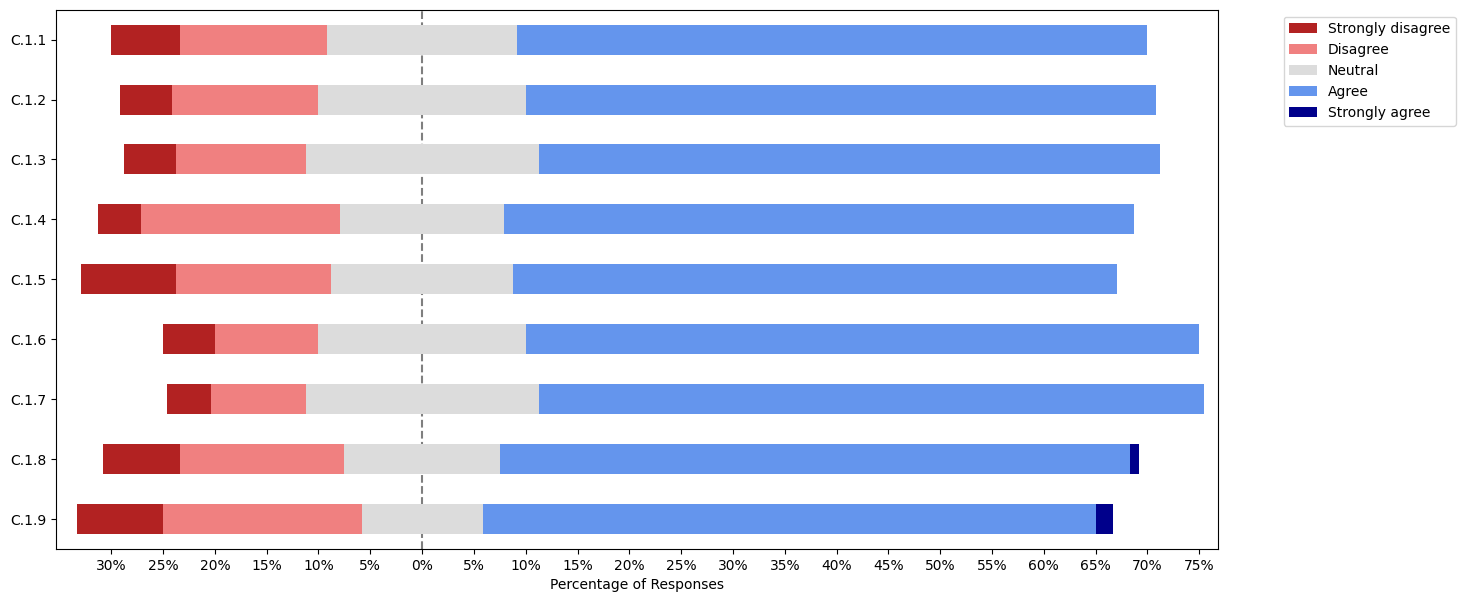

In [11]:
# C1.1 Apoyo del gobierno

s3=data_train.iloc[:,31:40].replace('Neutral, Agree','Neutral')
coln=s3.columns
s3=s3.replace('Disagree, Neutral','Neutral')
# define my selections
myscale1 = \
    ['Strongly disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s3, myscale1, plot_percentage=True)

In [12]:
# codificar las variables
Factorial_fuction.Coding(s3,myscale1)
#validez
Factorial_fuction.validez(s3)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.974278770949066
   
Validez de constructo: 
--------------------------------------
Bartlett test: 1666.583847504295  P-Value: 0.0
KMO: 0.8886364745001656


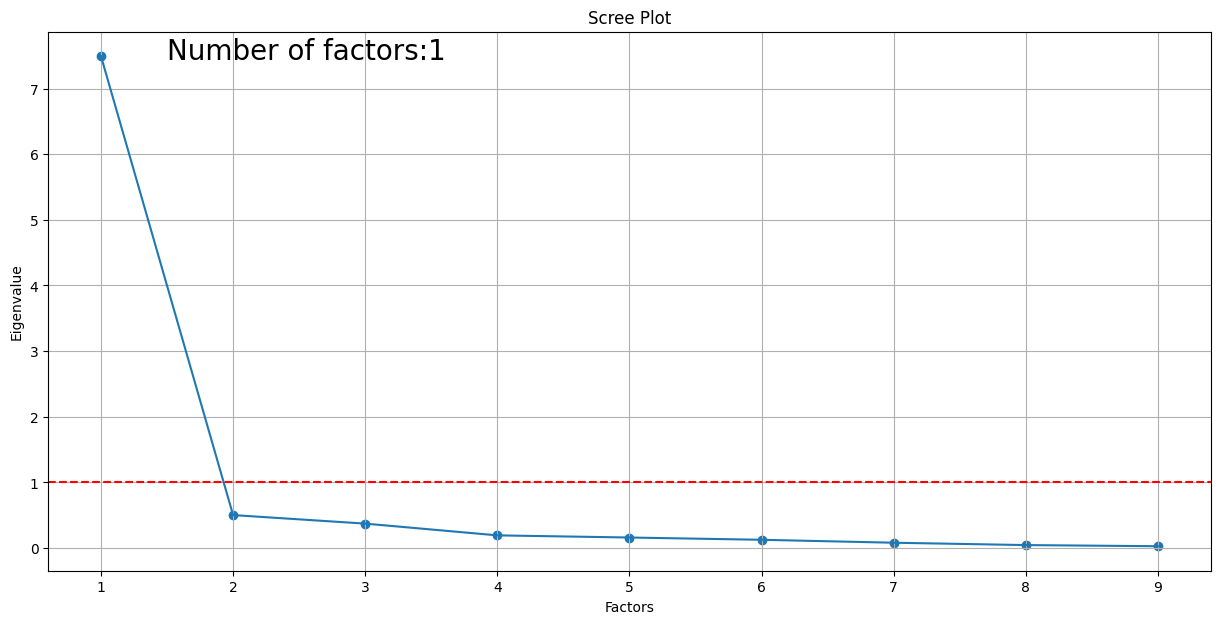

In [13]:
Factorial_fuction.Nfactores(s3)

In [14]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s3.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s3.select_dtypes(include = "float64"))
fact = fa.loadings_
a = np.zeros((len(fact), len(fact[0,:])))
for i in range(len(fact)):
    arr = fact[i,:]
    ind=np.where(arr==max(arr))[0]
    a[i,ind]=fact[i,:].max()
    
pd.DataFrame(np.round(a,3), 
             columns=['Factor '+str(i+1) for i in range(len(fact[0,:]))],
             index=coln)


Factor 1
C.1.1     0.928
C.1.2     0.936
C.1.3     0.871
C.1.4     0.920
C.1.5     0.936
C.1.6     0.795
C.1.7     0.874
C.1.8     0.935
C.1.9     0.906

In [ ]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1
ss Loadings     7.310539
Proportion Var  0.812282
Cumulative Var  0.812282

### Redes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frecuency')

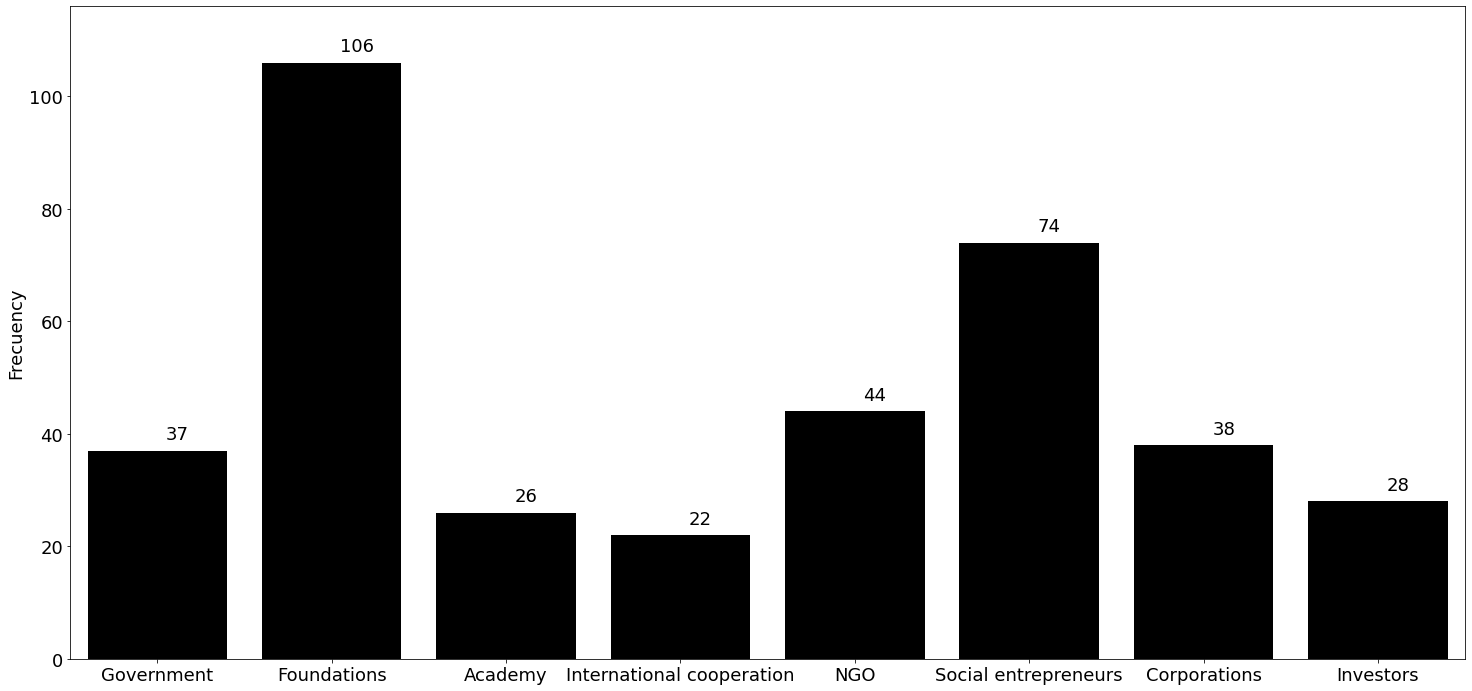

In [ ]:
#Tipo de actor
plt.figure(figsize=(25,12))
actor = [data_train.iloc[:,40][i].split(sep=',') for i in range(120)]
actores=[elem for sublista in actor for elem in sublista]
actores=[x.replace(',','') for x in actores]
actores=[x.strip() for x in actores]
actores=pd.DataFrame({'Tipo':actores})
ax=sns.countplot(actores['Tipo'],color='k')
ax.set_ylim(0,max(actores['Tipo'].value_counts())+10)
Factorial_fuction.with_hue(ax,actores['Tipo'])
plt.ylabel("Frecuency", fontsize=18)
plt.xlabel("")
plt.xticks(fontsize = 18, rotation=0)
plt.yticks(fontsize = 18, rotation=0)
labels = ("Government", 
          "Foundations", 
          "Academy",
          "International cooperation",
          "NGO",
          "Social entrepreneurs",
          "Corporations",
          "Investors",)
ax.set_xticklabels(labels)
# plt.xlabel("Type of stakeholders with the most important relationships", fontsize=18)
plt.ylabel('Frecuency', fontsize=18)


Text(0.5, 0, 'Frecuency')

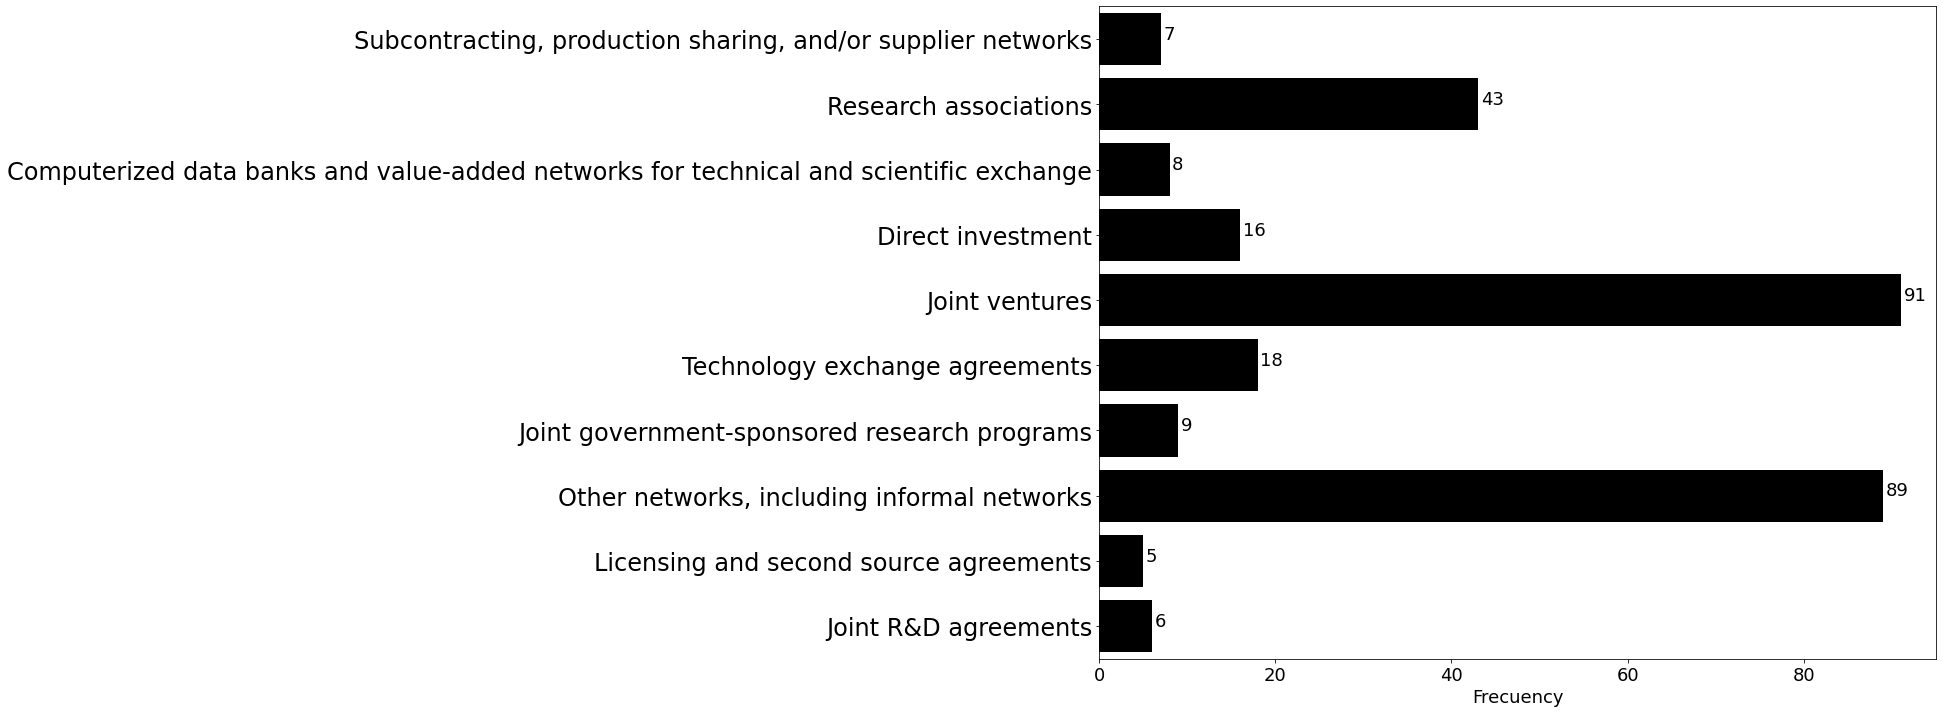

In [ ]:
#Tipo de redes
plt.figure(figsize=(15,12))
red = [data_train.iloc[:,41][i].split(sep=',') for i in range(120)]
redes=[elem for sublista in red for elem in sublista]
redes=[x.replace(',','') for x in redes]
redes=[x.strip() for x in redes]
redes=pd.DataFrame({'Tipo':redes})
ax=sns.countplot(y="Tipo", data=redes, color='k')
Factorial_fuction.without_hueH(ax,redes['Tipo'])
ax.set_xlim(0,max(redes["Tipo"].value_counts())+4)
plt.xticks(fontsize = 18, rotation=0)
labels = ("Subcontracting, production sharing, and/or supplier networks", 
          "Research associations", 
          "Computerized data banks and value-added networks for technical and scientific exchange",
          "Direct investment",
          "Joint ventures",
          "Technology exchange agreements",
          "Joint government-sponsored research programs",
          "Other networks, including informal networks",
          "Licensing and second source agreements",
          "Joint R&D agreements")
ax.set_yticklabels(labels)
plt.yticks(fontsize = 24, rotation=0)
# plt.ylabel("Network types", fontsize=18)
plt.ylabel("")
plt.xlabel('Frecuency', fontsize=18)

Text(0.5, 0, 'Frecuency')

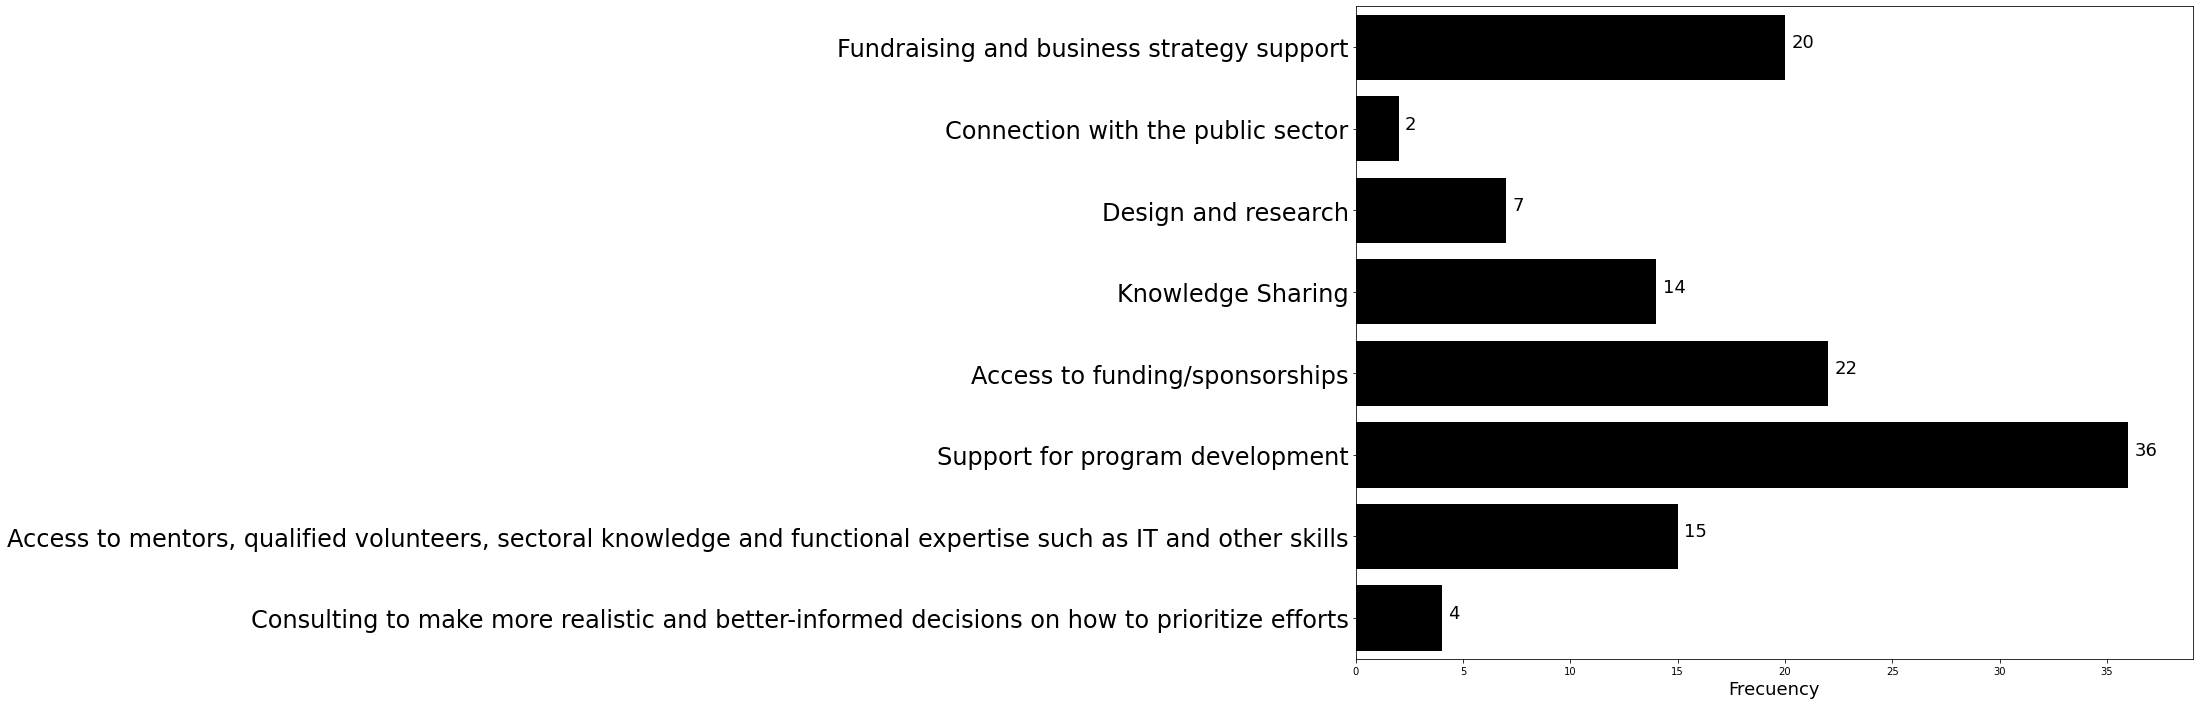

In [ ]:
#resultado de redes
plt.figure(figsize=(15,12))
res = [data_train.iloc[:,42][i].split(sep=',') for i in range(120)]
res=[elem for sublista in res for elem in sublista]
res=[x.replace(',','') for x in res]
res=[x.strip() for x in res]
res=pd.DataFrame({'Tipo':res})
ax=sns.countplot(y="Tipo", data=res, color='k')
Factorial_fuction.without_hueH(ax,res['Tipo'])
ax.set_xlim(0,max(res["Tipo"].value_counts())+3)
labels = ("Fundraising and business strategy support", 
          "Connection with the public sector", 
          "Design and research",
          "Knowledge Sharing",
          "Access to funding/sponsorships",
          "Support for program development",
          "Access to mentors, qualified volunteers, sectoral knowledge and functional expertise such as IT and other skills",
          "Consulting to make more realistic and better-informed decisions on how to prioritize efforts")
ax.set_yticklabels(labels)
# plt.ylabel("Expected results of the networks ")
plt.yticks(fontsize = 24, rotation=0)
# plt.ylabel("Network types", fontsize=18)
plt.ylabel("")
plt.xlabel('Frecuency', fontsize=18)

<AxesSubplot: xlabel='Percentage of Responses'>

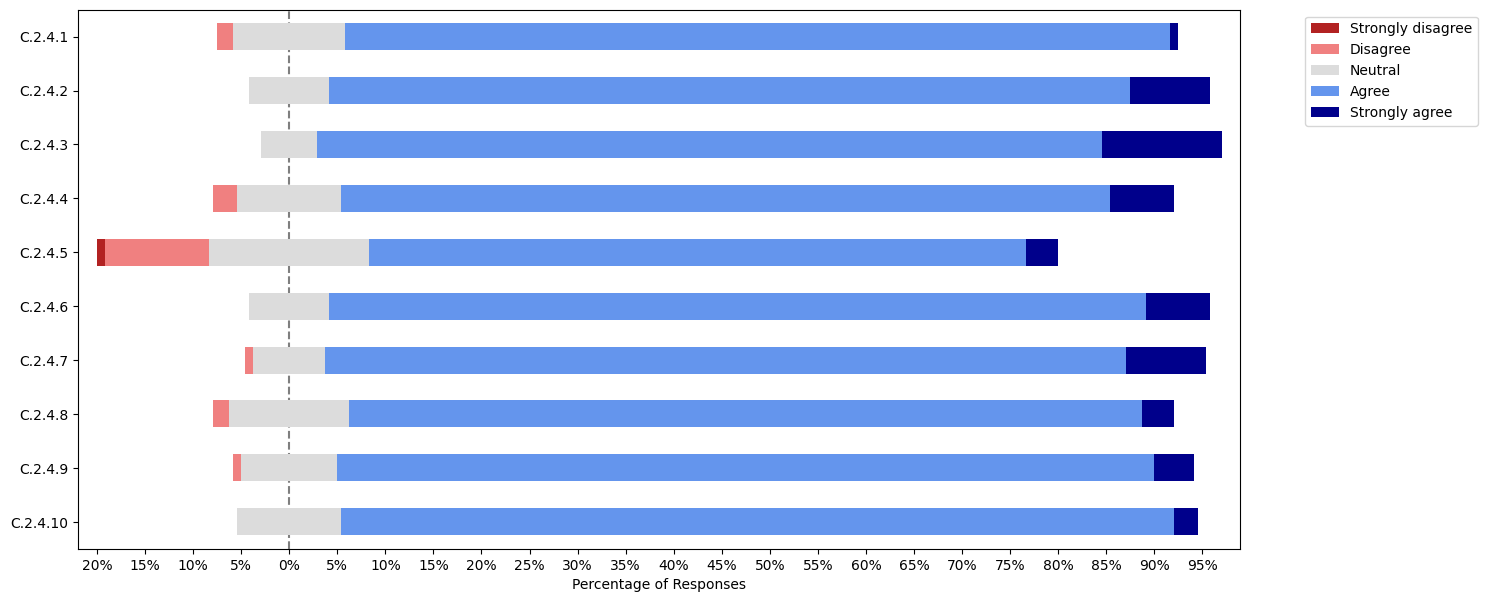

In [21]:
# C.2.4. En el desarrollo de su actividad empresarial. ¿En qué nivel está de acuerdo con las siguientes afirmaciones? 

s4=data_train.iloc[:,44:54]
coln=s4.columns
# define my selections
myscale1 = \
    ['Strongly disagree',
 'Disagree',
  'Neutral',
 'Agree',
 'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s4, myscale1, plot_percentage=True)

In [22]:
# codificar las variables
Factorial_fuction.Coding(s4,myscale1)
#validez
Factorial_fuction.validez(s4)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.7923299128564004
   
Validez de constructo: 
--------------------------------------
Bartlett test: 492.11016640007665  P-Value: 1.6190813790018487e-76
KMO: 0.6845112679779216


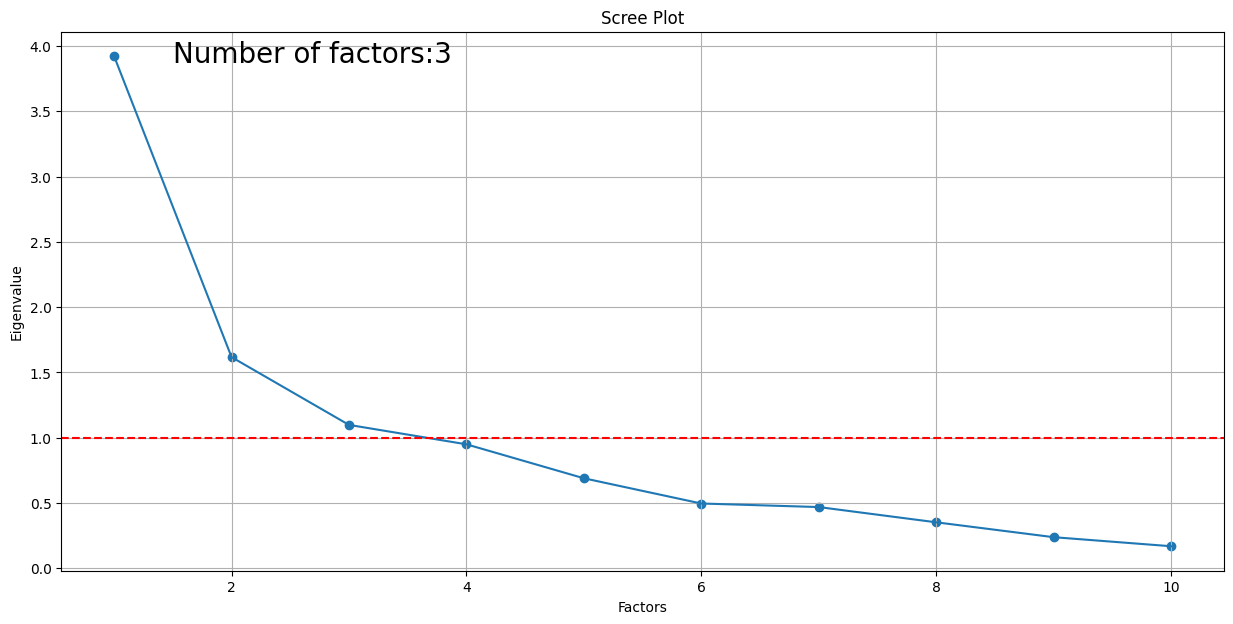

In [23]:
Factorial_fuction.Nfactores(s4)

In [24]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s4.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s4.select_dtypes(include = "float64"))
fact = fa.loadings_
a = np.zeros((len(fact), len(fact[0,:])))
for i in range(len(fact)):
    arr = fact[i,:]
    ind=np.where(arr==max(arr))[0]
    a[i,ind]=fact[i,:].max()
    
pd.DataFrame(np.round(a,3), 
             columns=['Factor '+str(i+1) for i in range(len(fact[0,:]))],
             index=coln)

Factor 1  Factor 2  Factor 3
C.2.4.1      0.507     0.000     0.000
C.2.4.2      0.000     0.000     0.975
C.2.4.3      0.000     0.000     0.522
C.2.4.4      0.000     0.506     0.000
C.2.4.5      0.444     0.000     0.000
C.2.4.6      0.000     0.554     0.000
C.2.4.7      0.000     1.007     0.000
C.2.4.8      0.736     0.000     0.000
C.2.4.9      0.720     0.000     0.000
C.2.4.10     0.639     0.000     0.000

In [25]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1  factor 2  factor 3
ss Loadings     2.136788  1.961447  1.586998
Proportion Var  0.213679  0.196145  0.158700
Cumulative Var  0.213679  0.409823  0.568523

### Entorno

<AxesSubplot: xlabel='Percentage of Responses'>

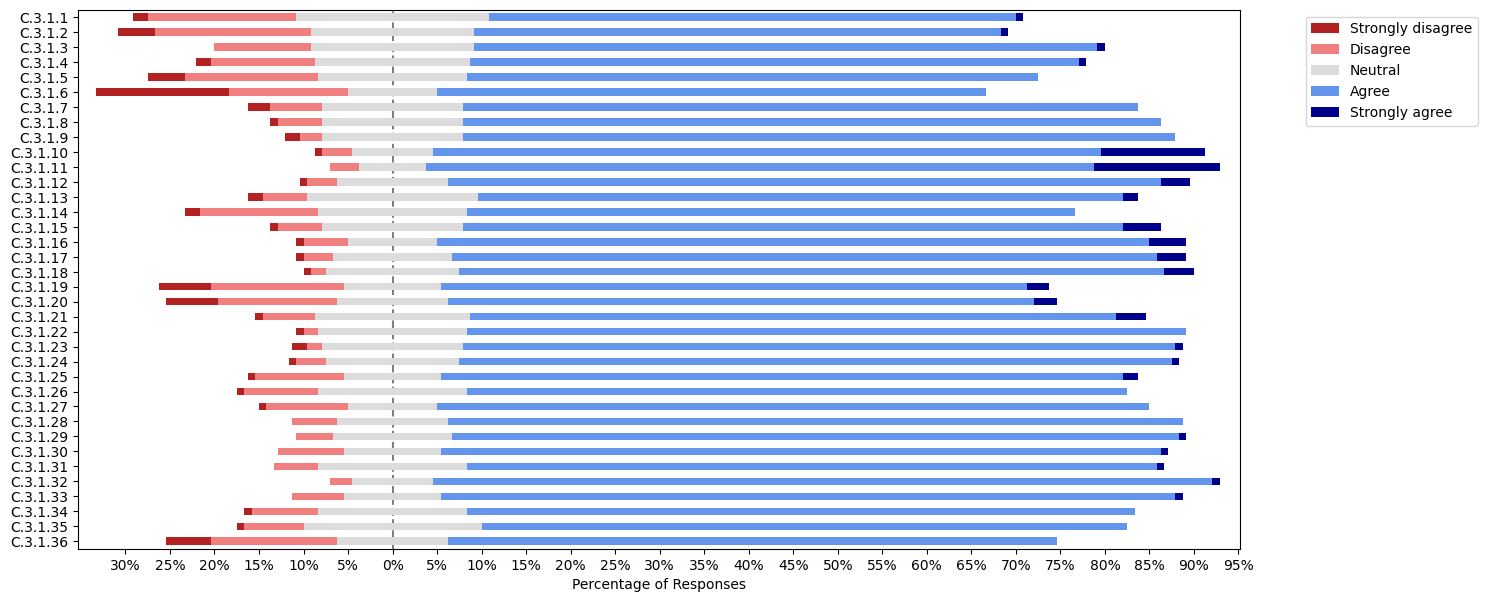

In [14]:
# teniendo en cuenta todos los indicadores
st=data_train.iloc[:,54:90]
coln=st.columns
# define my selections
myscale1 = \
    ['Strongly disagree',
 'Disagree',
  'Neutral',
 'Agree',
 'Strongly agree']
# create a likert plot
plot_likert.plot_likert(st, myscale1, plot_percentage=True)

In [15]:
# codificar las variables
Factorial_fuction.Coding(st,myscale1)
#validez
Factorial_fuction.validez(st)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.9684591742455558
   
Validez de constructo: 
--------------------------------------
Bartlett test: 5826.831337839365  P-Value: 0.0
KMO: 0.8228717086299117


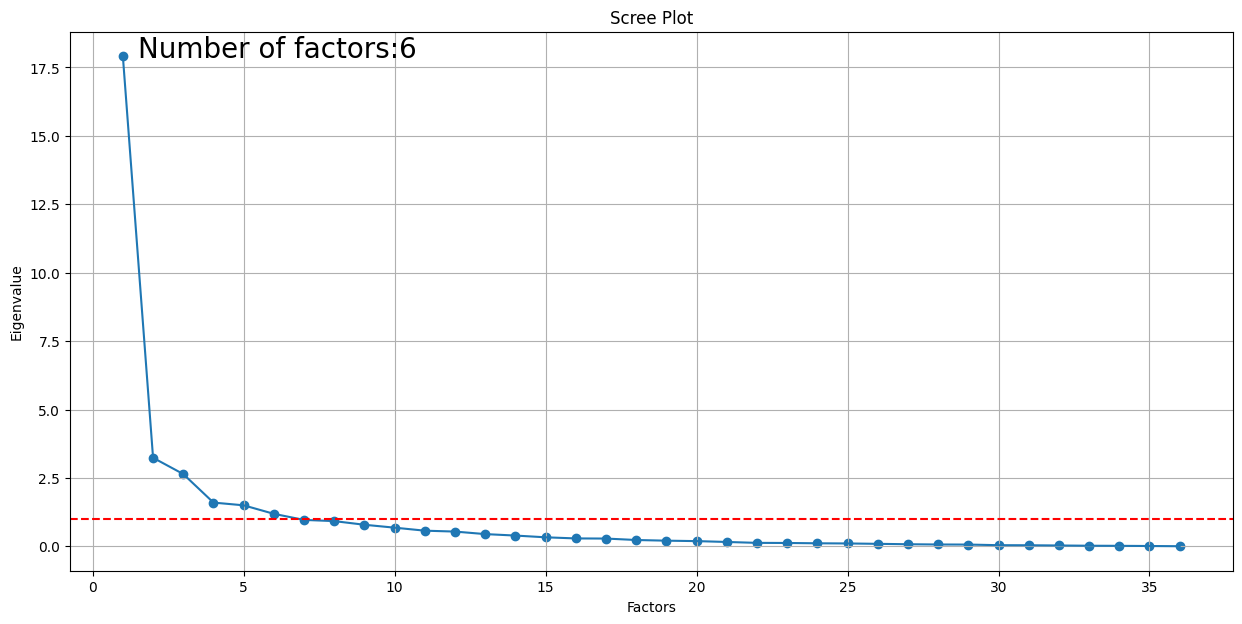

In [16]:
Factorial_fuction.Nfactores(st)

In [17]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(st.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(st.select_dtypes(include = "float64"))
fact = fa.loadings_
a = np.zeros((len(fact), len(fact[0,:])))
for i in range(len(fact)):
    arr = fact[i,:]
    ind=np.where(arr==max(arr))[0]
    a[i,ind]=fact[i,:].max()
    
pd.DataFrame(np.round(a,3), 
             columns=['Factor '+str(i+1) for i in range(len(fact[0,:]))],
             index=coln)

Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  Factor 6
C.3.1.1      0.738     0.000     0.000     0.000     0.000     0.000
C.3.1.2      0.747     0.000     0.000     0.000     0.000     0.000
C.3.1.3      0.717     0.000     0.000     0.000     0.000     0.000
C.3.1.4      0.667     0.000     0.000     0.000     0.000     0.000
C.3.1.5      0.775     0.000     0.000     0.000     0.000     0.000
C.3.1.6      0.791     0.000     0.000     0.000     0.000     0.000
C.3.1.7      0.589     0.000     0.000     0.000     0.000     0.000
C.3.1.8      0.551     0.000     0.000     0.000     0.000     0.000
C.3.1.9      0.000     0.000     0.587     0.000     0.000     0.000
C.3.1.10     0.000     0.000     0.000     0.000     0.000     0.763
C.3.1.11     0.000     0.000     0.000     0.000     0.000     0.847
C.3.1.12     0.000     0.000     0.000     0.000     0.000     0.609
C.3.1.13     0.611     0.000     0.000     0.000     0.000     0.000
C.3.1.14     0.680     0.000     0.000     0.000     0.000     0.000
C.3.1.15     0.000     0.000     0.626     0.000     0.000     0.000
C.3.1.16     0.000     0.000     0.000     0.824     0.000     0.000
C.3.1.17     0.000     0.000     0.000     0.896     0.000     0.000
C.3.1.18     0.000     0.000     0.000     0.942     0.000     0.000
C.3.1.19     0.000     0.000     0.000     0.000     0.631     0.000
C.3.1.20     0.000     0.000     0.000     0.000     0.639     0.000
C.3.1.21     0.000     0.000     0.000     0.000     0.588     0.000
C.3.1.22     0.000     0.000     0.000     0.000     0.638     0.000
C.3.1.23     0.000     0.000     0.479     0.000     0.000     0.000
C.3.1.24     0.000     0.000     0.585     0.000     0.000     0.000
C.3.1.25     0.000     0.000     0.428     0.000     0.000     0.000
C.3.1.26     0.535     0.000     0.000     0.000     0.000     0.000
C.3.1.27     0.000     0.000     0.530     0.000     0.000     0.000
C.3.1.28     0.000     0.850     0.000     0.000     0.000     0.000
C.3.1.29     0.000     0.917     0.000     0.000     0.000     0.000
C.3.1.30     0.000     0.753     0.000     0.000     0.000     0.000
C.3.1.31     0.379     0.000     0.000     0.000     0.000     0.000
C.3.1.32     0.000     0.667     0.000     0.000     0.000     0.000
C.3.1.33     0.000     0.000     0.577     0.000     0.000     0.000
C.3.1.34     0.000     0.471     0.000     0.000     0.000     0.000
C.3.1.35     0.000     0.000     0.000     0.000     0.585     0.000
C.3.1.36     0.517     0.000     0.000     0.000     0.000     0.000

In [18]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1  factor 2  factor 3  factor 4  factor 5  factor 6
ss Loadings     7.530844  4.843270  4.007279  3.893484  3.676083  2.691863
Proportion Var  0.209190  0.134535  0.111313  0.108152  0.102113  0.074774
Cumulative Var  0.209190  0.343725  0.455039  0.563191  0.665304  0.740078

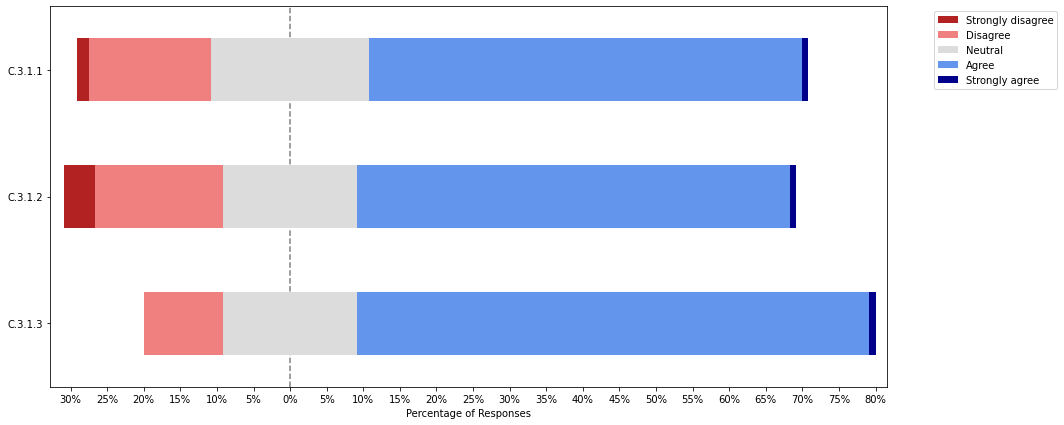

In [ ]:
#Economico

s5=data_train.iloc[:,54:57]
# define my selections
myscale1 = \
    ['Strongly disagree',
 'Disagree',
  'Neutral',
 'Agree',
 'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s5, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s5,myscale1)
#validez
Factorial_fuction.validez(s5)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.9094710176509041
   
Validez de constructo: 
--------------------------------------
Bartlett test: 282.0868554110759  P-Value: 7.486530495526644e-61
KMO: 0.712299503233622


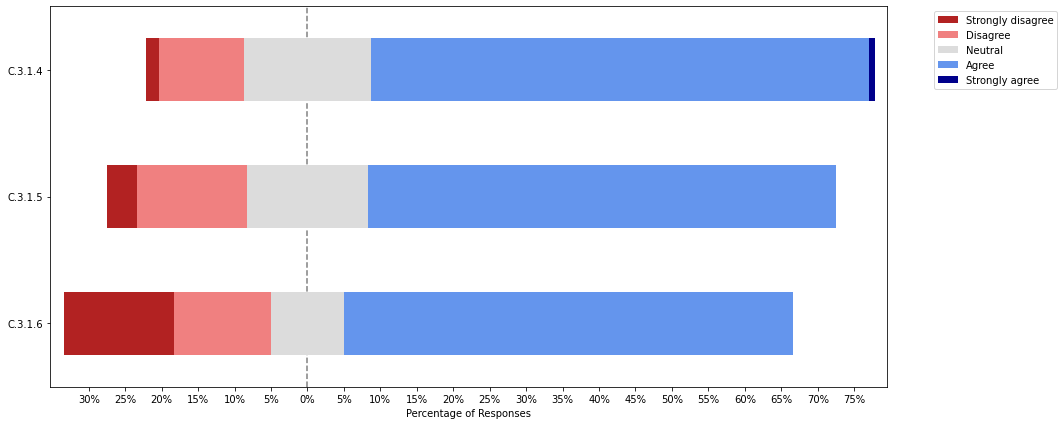

In [ ]:
#Politico-juridico

s6=data_train.iloc[:,57:60]
# define my selections
myscale1 = \
    ['Strongly disagree',
 'Disagree',
  'Neutral',
 'Agree',
 'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s6, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s6,myscale1)
#validez
Factorial_fuction.validez(s6)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.8840214607203464
   
Validez de constructo: 
--------------------------------------
Bartlett test: 235.77088888798048  P-Value: 7.816594343655904e-51
KMO: 0.7035998772228066


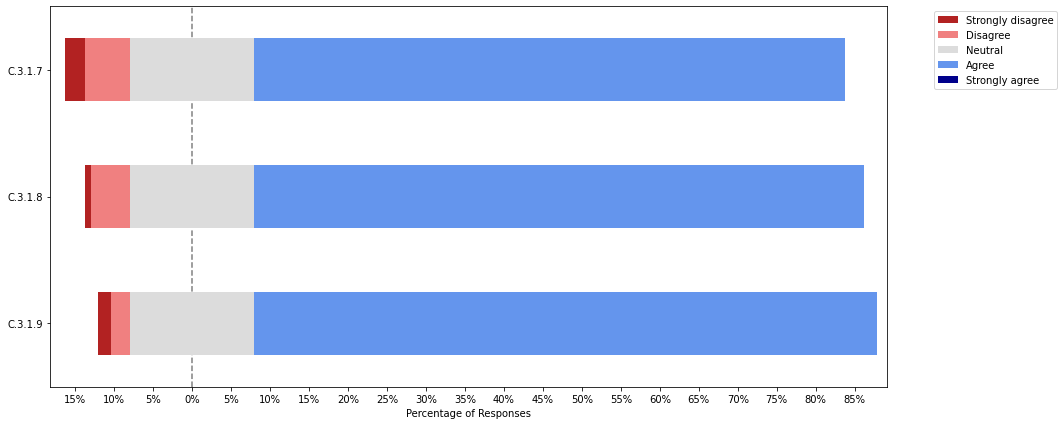

In [ ]:
#socio-cultural

s7=data_train.iloc[:,60:63]
# define my selections
myscale1 = \
    ['Strongly disagree',
 'Disagree',
  'Neutral',
 'Agree',
 'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s7, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s7,myscale1)
#validez
Factorial_fuction.validez(s7)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.884371029224905
   
Validez de constructo: 
--------------------------------------
Bartlett test: 219.83050875866488  P-Value: 2.184529285508664e-47
KMO: 0.7213654481149504


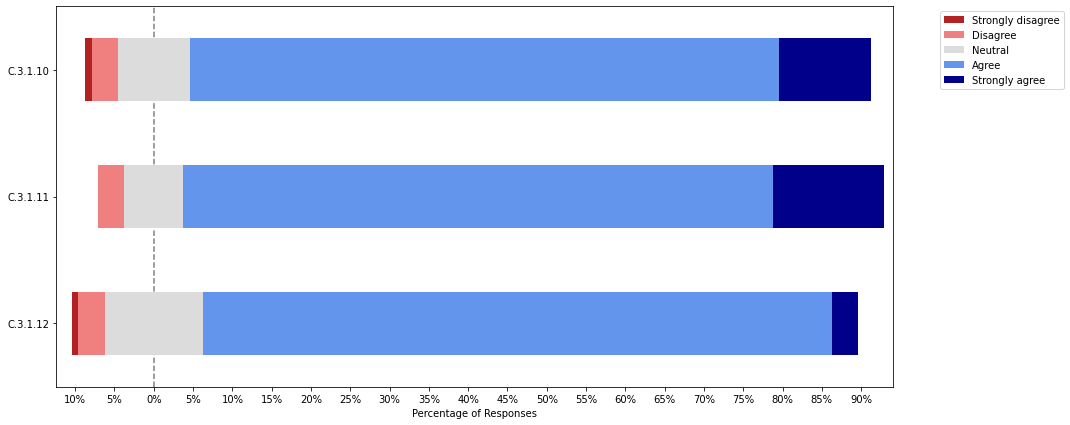

In [ ]:
#tecnologico

s8=data_train.iloc[:,63:66]
# define my selections
myscale1 = \
    ['Strongly disagree',
 'Disagree',
  'Neutral',
 'Agree',
 'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s8, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s8,myscale1)
#validez
Factorial_fuction.validez(s8)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.8650563607085344
   
Validez de constructo: 
--------------------------------------
Bartlett test: 181.81513228361115  P-Value: 3.5765968890476436e-39
KMO: 0.6956099537947061


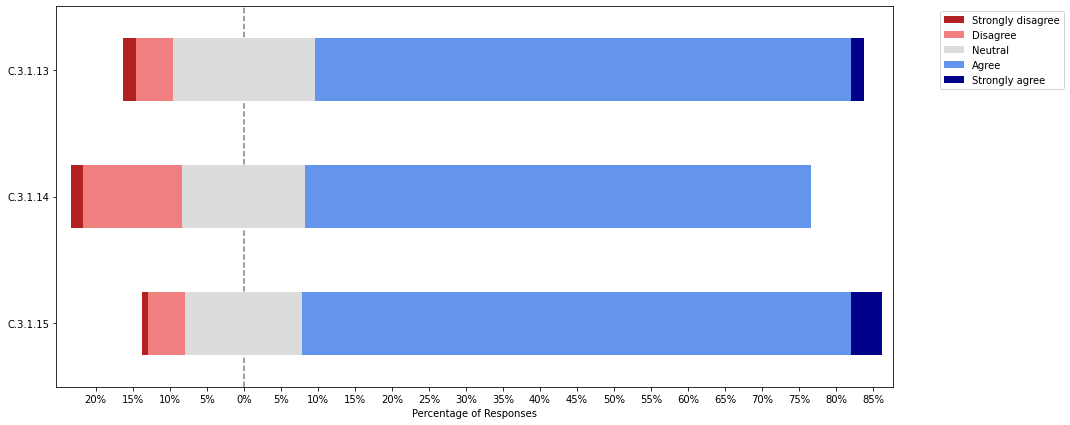

In [ ]:
#demografico

s9=data_train.iloc[:,66:69]
# define my selections
myscale1 = \
    ['Strongly disagree',
 'Disagree',
  'Neutral',
 'Agree',
 'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s9, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s9,myscale1)
#validez
Factorial_fuction.validez(s9)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.6635126681263678
   
Validez de constructo: 
--------------------------------------
Bartlett test: 106.43481796385551  P-Value: 6.419175250302492e-23
KMO: 0.4003876285009625


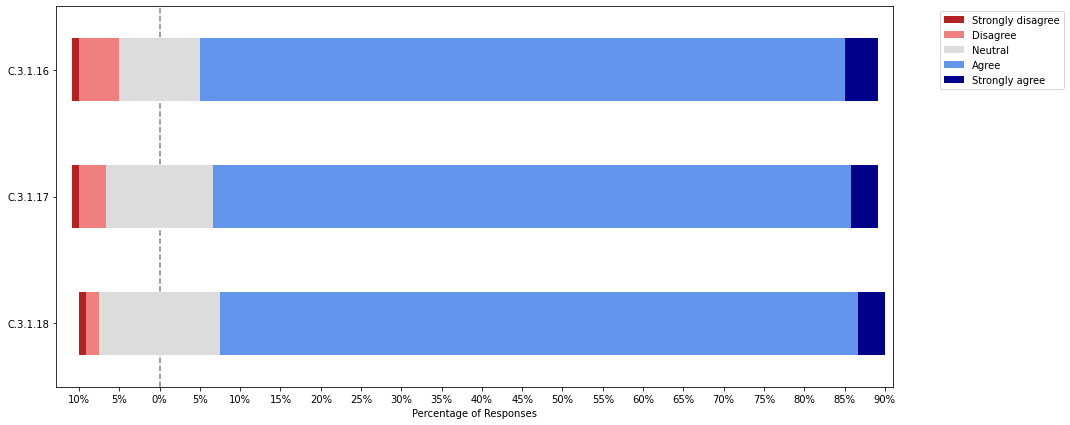

In [ ]:
#natural

s10=data_train.iloc[:,69:72]
# define my selections
myscale1 = \
    ['Strongly disagree',
 'Disagree',
  'Neutral',
 'Agree',
 'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s10, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s10,myscale1)
#validez
Factorial_fuction.validez(s10)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.9741875179752655
   
Validez de constructo: 
--------------------------------------
Bartlett test: 584.6471396534452  P-Value: 2.145925326527106e-126
KMO: 0.7221315862549739


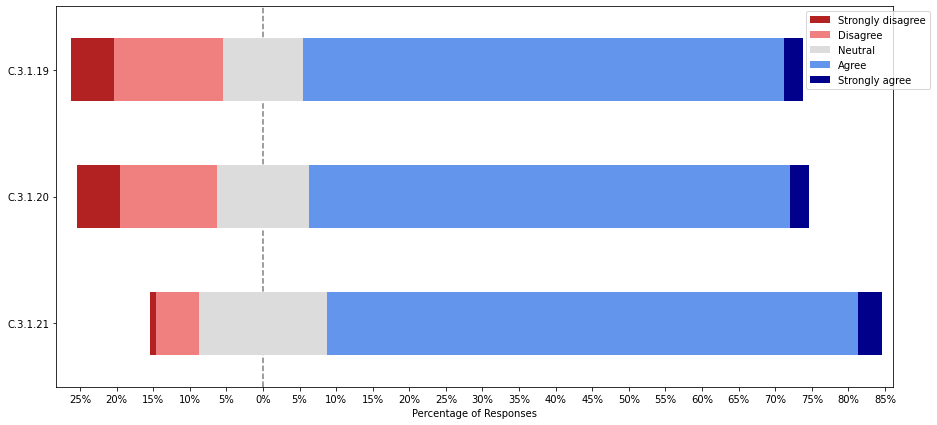

In [ ]:
#internacional

s11=data_train.iloc[:,72:75]
# define my selections
myscale1 = \
    ['Strongly disagree',
 'Disagree',
  'Neutral',
 'Agree',
 'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s11, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s11,myscale1)
#validez
Factorial_fuction.validez(s11)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.8640126082722568
   
Validez de constructo: 
--------------------------------------
Bartlett test: 431.2729732310671  P-Value: 3.720347229550073e-93
KMO: 0.6025552451353878


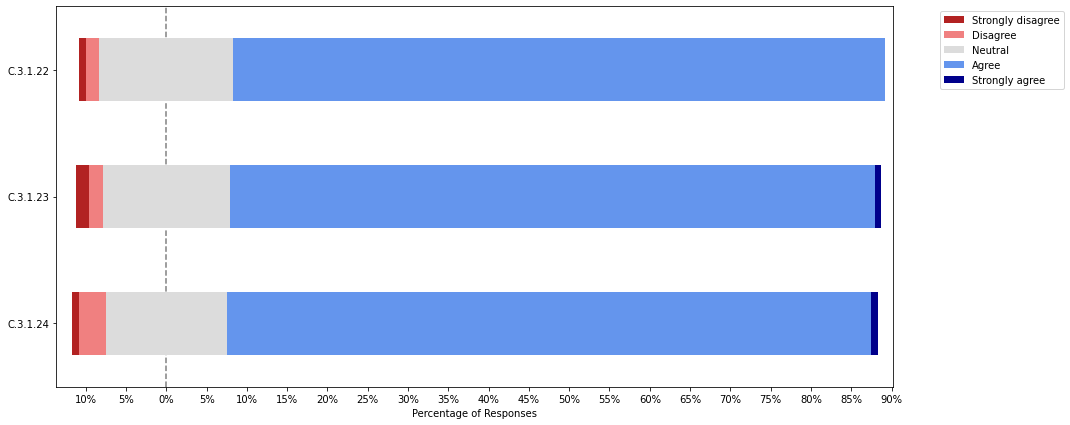

In [ ]:
#usuario

s12=data_train.iloc[:,75:78]
# define my selections
myscale1 = \
    ['Strongly disagree',
 'Disagree',
  'Neutral',
 'Agree',
 'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s12, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s12,myscale1)
#validez
Factorial_fuction.validez(s12)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.8862192153267364
   
Validez de constructo: 
--------------------------------------
Bartlett test: 206.66716612367244  P-Value: 1.5291752521900368e-44
KMO: 0.7281847013752738


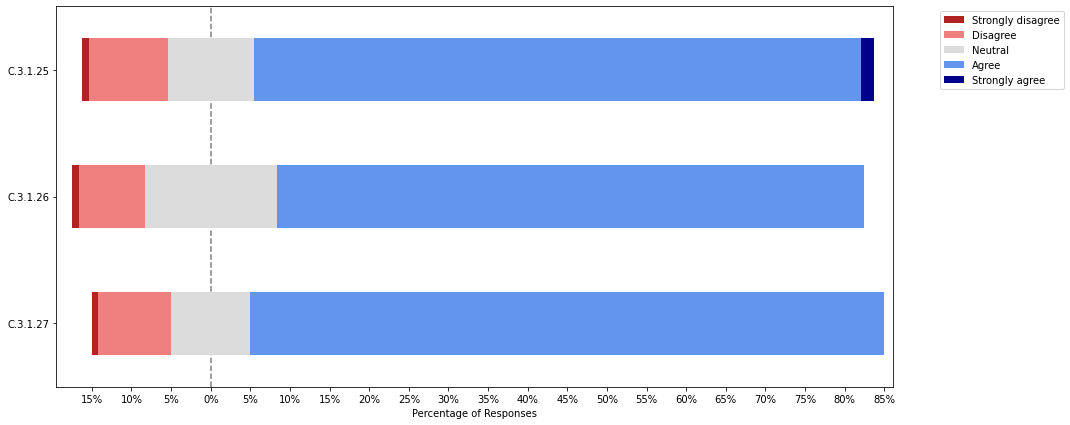

In [ ]:
#proveedores

s13=data_train.iloc[:,78:81]
# define my selections
myscale1 = \
    ['Strongly disagree',
 'Disagree',
  'Neutral',
 'Agree',
 'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s13, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s13,myscale1)
#validez
Factorial_fuction.validez(s13)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.9248986925605933
   
Validez de constructo: 
--------------------------------------
Bartlett test: 283.4010977323778  P-Value: 3.8895448015525705e-61
KMO: 0.7468747598635284


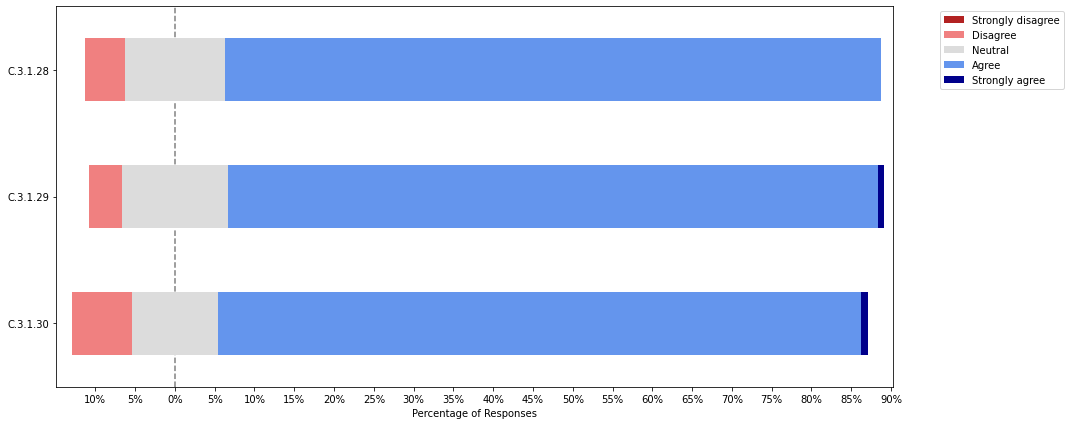

In [ ]:
#competidores

s14=data_train.iloc[:,81:84]
# define my selections
myscale1 = \
    ['Strongly disagree',
 'Disagree',
  'Neutral',
 'Agree',
 'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s14, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s14,myscale1)
#validez
Factorial_fuction.validez(s14)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.9415152216691743
   
Validez de constructo: 
--------------------------------------
Bartlett test: 353.21623500221983  P-Value: 3.0009161682818754e-76
KMO: 0.7448484186515161


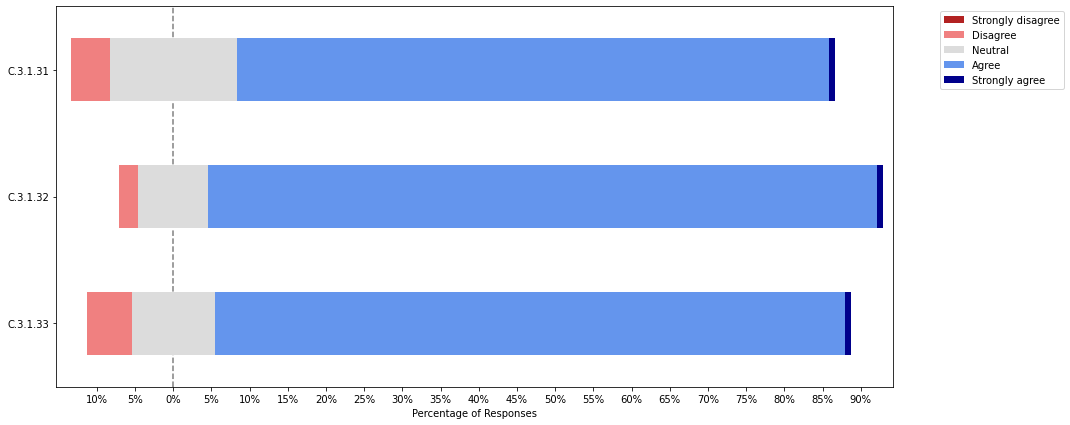

In [ ]:
#otros grupos

s15=data_train.iloc[:,84:87]
# define my selections
myscale1 = \
    ['Strongly disagree',
 'Disagree',
  'Neutral',
 'Agree',
 'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s15, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s15,myscale1)
#validez
Factorial_fuction.validez(s15)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.7002006439270219
   
Validez de constructo: 
--------------------------------------
Bartlett test: 82.78987672349824  P-Value: 7.735514734075496e-18
KMO: 0.605646168972504


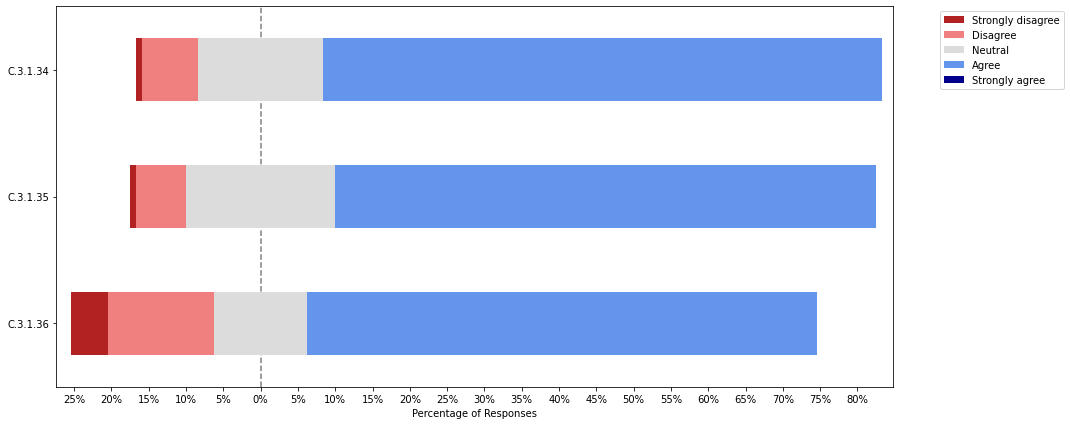

In [ ]:
#intermediarios

s16=data_train.iloc[:,87:90]
# define my selections
myscale1 = \
    ['Strongly disagree',
 'Disagree',
  'Neutral',
 'Agree',
 'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s16, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s16,myscale1)
#validez
Factorial_fuction.validez(s16)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.8757428229872313
   
Validez de constructo: 
--------------------------------------
Bartlett test: 209.54804534612973  P-Value: 3.6463627286529197e-45
KMO: 0.7438824417209108


## Factores organizacionales

### Plan de negocio

<AxesSubplot: xlabel='Percentage of Responses'>

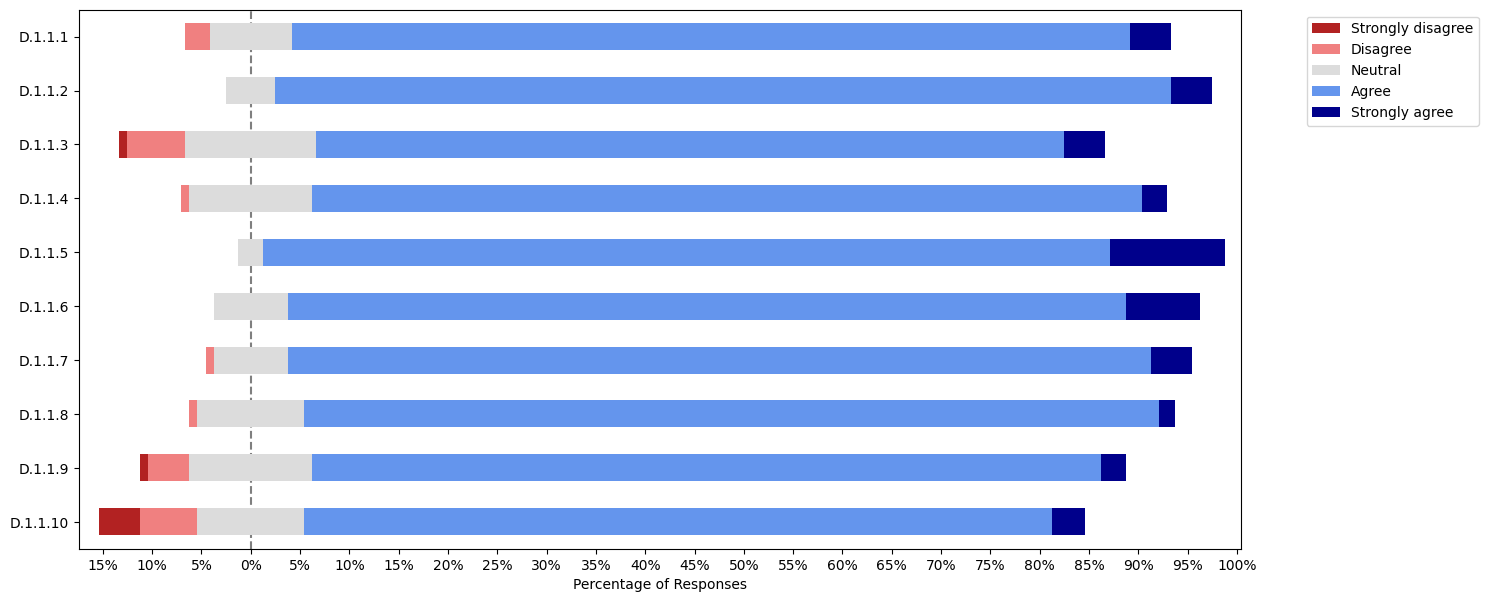

In [39]:
#D.1.1. Conforme a su planificación, ¿En qué nivel está de acuerdo con los siguientes ítems? 

s17=data_train.iloc[:,90:100].replace('Agree, Strongly agree','Agree')
s17=s17.replace('Neutral, Agree','Neutral')
coln=s17.columns
# define my selections
myscale1 = \
    ['Strongly disagree',
 'Disagree',
  'Neutral',
 'Agree',
 'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s17, myscale1, plot_percentage=True)


In [40]:
# codificar las variables
Factorial_fuction.Coding(s17,myscale1)
#validez
Factorial_fuction.validez(s17)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.8163514388326057
   
Validez de constructo: 
--------------------------------------
Bartlett test: 613.0914359688426  P-Value: 9.614196469554901e-101
KMO: 0.6601896686093658


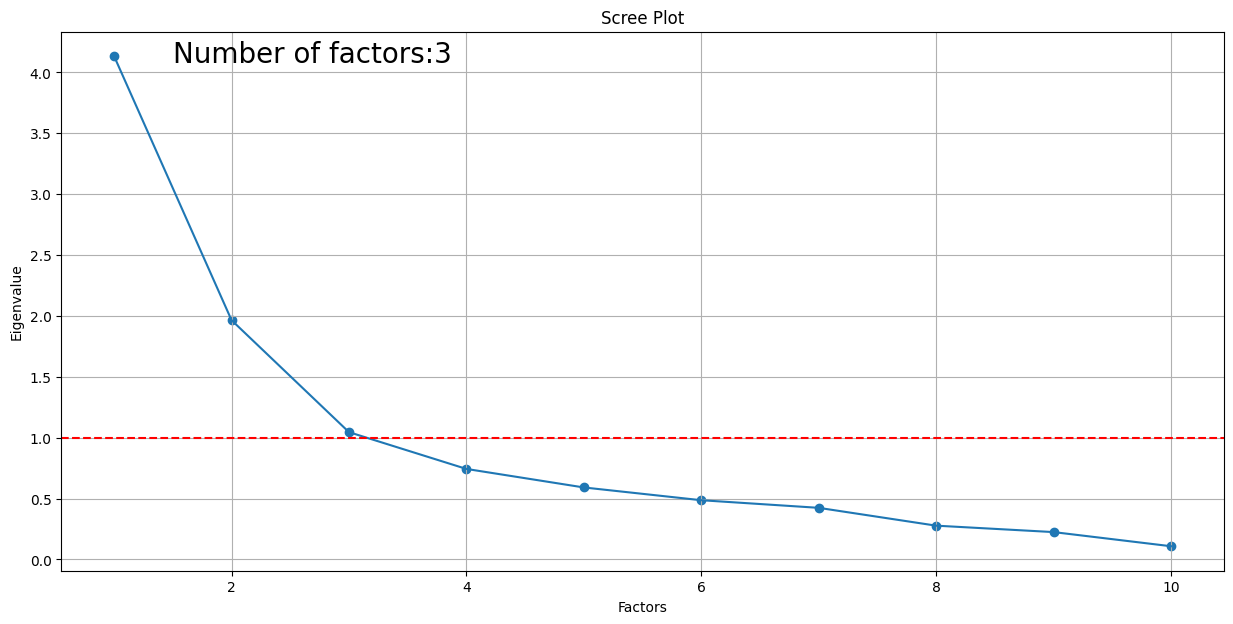

In [41]:
Factorial_fuction.Nfactores(s17)

In [42]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s17.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s17.select_dtypes(include = "float64"))
fact = fa.loadings_
a = np.zeros((len(fact), len(fact[0,:])))
for i in range(len(fact)):
    arr = fact[i,:]
    ind=np.where(arr==max(arr))[0]
    a[i,ind]=fact[i,:].max()
    
pd.DataFrame(np.round(a,3), 
             columns=['Factor '+str(i+1) for i in range(len(fact[0,:]))],
             index=coln)

Factor 1  Factor 2  Factor 3
D.1.1.1      0.000     0.549     0.000
D.1.1.2      0.000     0.549     0.000
D.1.1.3      0.629     0.000     0.000
D.1.1.4      0.000     0.665     0.000
D.1.1.5      0.000     0.000     0.988
D.1.1.6      0.000     0.000     0.608
D.1.1.7      0.616     0.000     0.000
D.1.1.8      0.767     0.000     0.000
D.1.1.9      0.000     0.564     0.000
D.1.1.10     0.799     0.000     0.000

In [43]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1  factor 2  factor 3
ss Loadings     2.497854  1.812760  1.702109
Proportion Var  0.249785  0.181276  0.170211
Cumulative Var  0.249785  0.431061  0.601272

### Medios financieros

<AxesSubplot: xlabel='Percentage of Responses'>

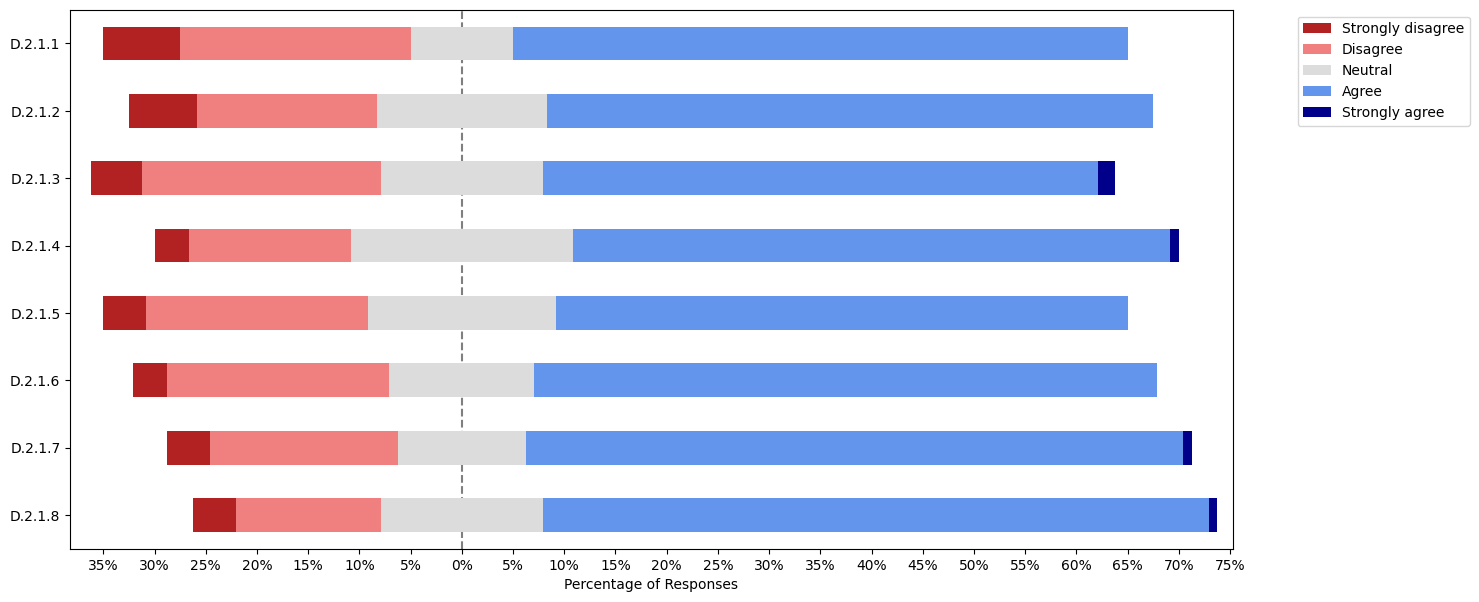

In [44]:
#D.2.1. De acuerdo a la estructura financiera de su empresa social, ¿en qué nivel está de acuerdo con las siguientes afirmaciones? 

s18=data_train.iloc[:,100:108].replace('Disagree, Neutral','Neutral')
coln=s18.columns
s18=s18.replace('Neutral, Agree','Neutral')
# define my selections
myscale1 = \
    ['Strongly disagree',
 'Disagree',
  'Neutral',
 'Agree',
 'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s18, myscale1, plot_percentage=True)

In [45]:
# codificar las variables
Factorial_fuction.Coding(s18,myscale1)
#validez
Factorial_fuction.validez(s18)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.9779895849645268
   
Validez de constructo: 
--------------------------------------
Bartlett test: 1480.312381540907  P-Value: 1.1718153852951671e-294
KMO: 0.9219310822683243


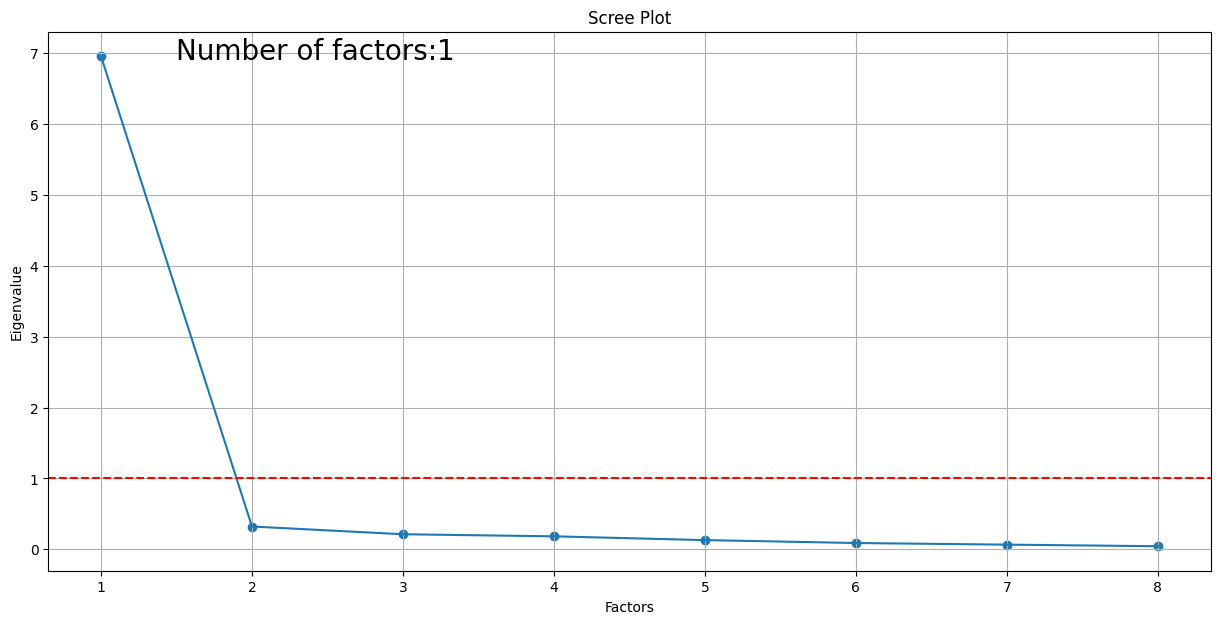

In [46]:
Factorial_fuction.Nfactores(s18)

In [47]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s18.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s18.select_dtypes(include = "float64"))
fact = fa.loadings_
a = np.zeros((len(fact), len(fact[0,:])))
for i in range(len(fact)):
    arr = fact[i,:]
    ind=np.where(arr==max(arr))[0]
    a[i,ind]=fact[i,:].max()
    
pd.DataFrame(np.round(a,3), 
             columns=['Factor '+str(i+1) for i in range(len(fact[0,:]))],
             index=coln)

Factor 1
D.2.1.1     0.922
D.2.1.2     0.896
D.2.1.3     0.927
D.2.1.4     0.932
D.2.1.5     0.948
D.2.1.6     0.956
D.2.1.7     0.896
D.2.1.8     0.900

In [48]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1
ss Loadings     6.806340
Proportion Var  0.850793
Cumulative Var  0.850793

<AxesSubplot: xlabel='Percentage of Responses'>

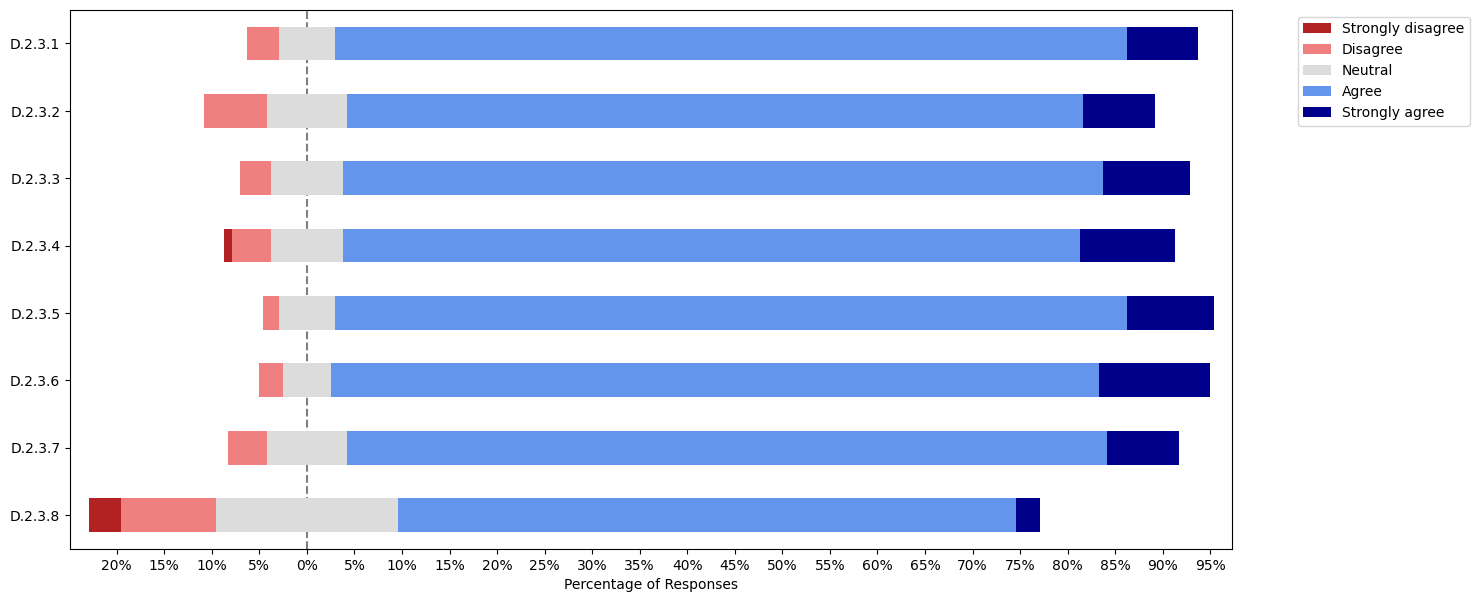

In [49]:
#D.2.3. De acuerdo a las principales dificultades para acceso financiero, ¿en qué nivel está de acuerdo con las siguientes barreras para acceder a la financiación? 

s19=data_train.iloc[:,116:124]
coln=s19.columns
# define my selections
myscale1 = \
    ['Strongly disagree',
 'Disagree',
  'Neutral',
 'Agree',
 'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s19, myscale1, plot_percentage=True)

In [50]:
# codificar las variables
Factorial_fuction.Coding(s19,myscale1)
#validez
Factorial_fuction.validez(s19)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.8970345474626794
   
Validez de constructo: 
--------------------------------------
Bartlett test: 756.6533324855553  P-Value: 2.678860447126198e-141
KMO: 0.8650801314256588


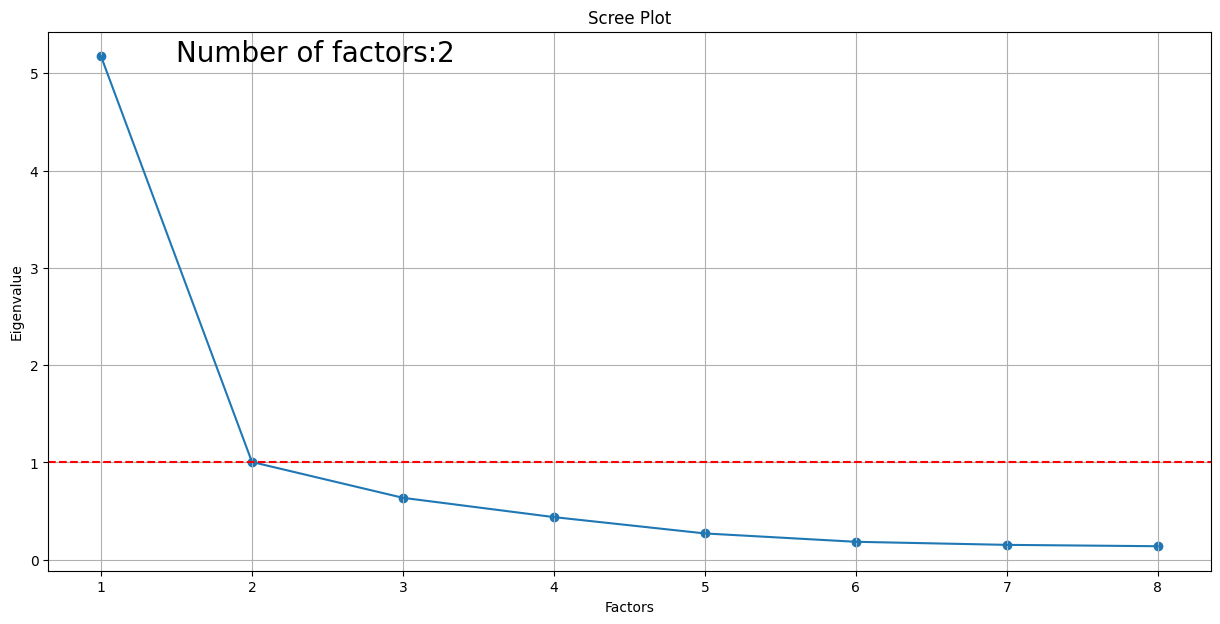

In [51]:
Factorial_fuction.Nfactores(s19)

In [52]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s19.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s19.select_dtypes(include = "float64"))
fact = fa.loadings_
a = np.zeros((len(fact), len(fact[0,:])))
for i in range(len(fact)):
    arr = fact[i,:]
    ind=np.where(arr==max(arr))[0]
    a[i,ind]=fact[i,:].max()
    
pd.DataFrame(np.round(a,3), 
             columns=['Factor '+str(i+1) for i in range(len(fact[0,:]))],
             index=coln)

Factor 1  Factor 2
D.2.3.1     0.871     0.000
D.2.3.2     0.691     0.000
D.2.3.3     0.780     0.000
D.2.3.4     0.000     0.696
D.2.3.5     0.803     0.000
D.2.3.6     0.000     0.614
D.2.3.7     0.000     0.821
D.2.3.8     0.000     0.457

In [53]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1  factor 2
ss Loadings     3.261672  2.197826
Proportion Var  0.407709  0.274728
Cumulative Var  0.407709  0.682437

### Capital Humano

In [ ]:
# D.3.1.En la actualidad, ¿cuántas personas están trabajando en el emprendimiento social de forma exclusiva (sin trabajar para otros al mismo tiempo) excluidos los propietarios
ch1=data_train[data_train['D.3.1.']!=" "]['D.3.1.'].astype(float)


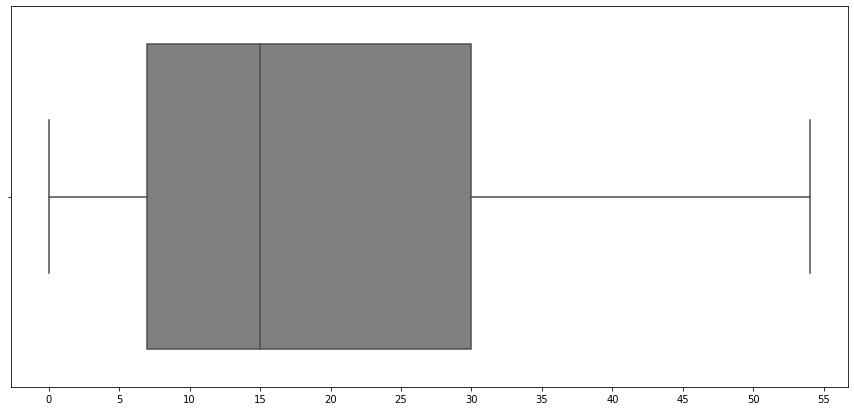

In [ ]:
ax=sns.boxplot([x for x in ch1 if x<60],color='grey')
ax.set_xticks(range(0,60,5))

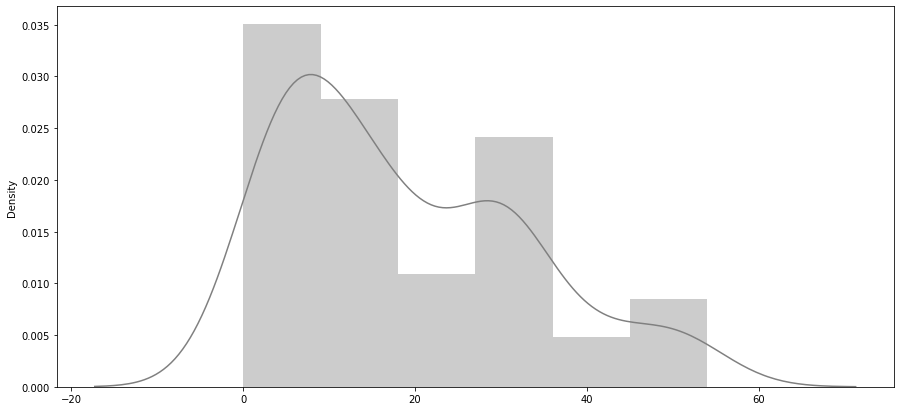

In [ ]:
sns.distplot([x for x in ch1 if x<60],color='grey' )

In [ ]:
#D.3.2.  En la actualidad, ¿cuántos voluntarios/colaboradores tiene la organización? __________ (Entendiendo como un voluntario/colaborador a una persona que dedica tiempo, libremente y sin remuneración, a cualquier organización que tenga una misión social en particular).

ch2=data_train[data_train['D.3.2.']!=" "]['D.3.2.'].astype(float)

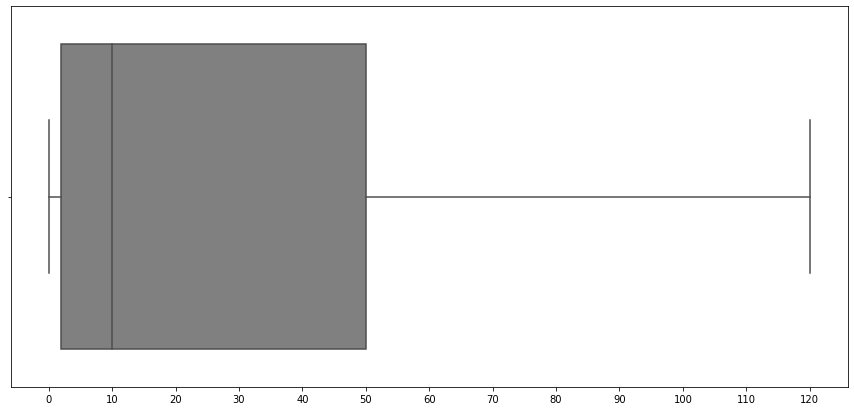

In [ ]:
ax=sns.boxplot([x for x in ch2 if x<140],color='grey')
ax.set_xticks(range(0,130,10))

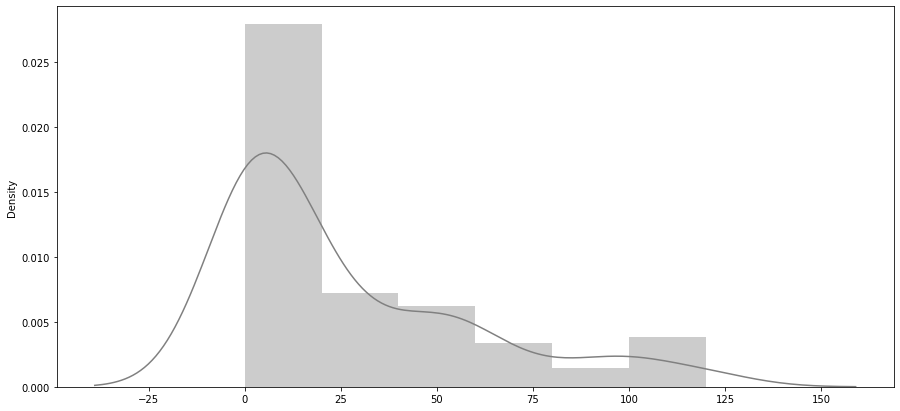

In [ ]:
sns.distplot([x for x in ch2 if x<140], color='grey')

<AxesSubplot: xlabel='Percentage of Responses'>

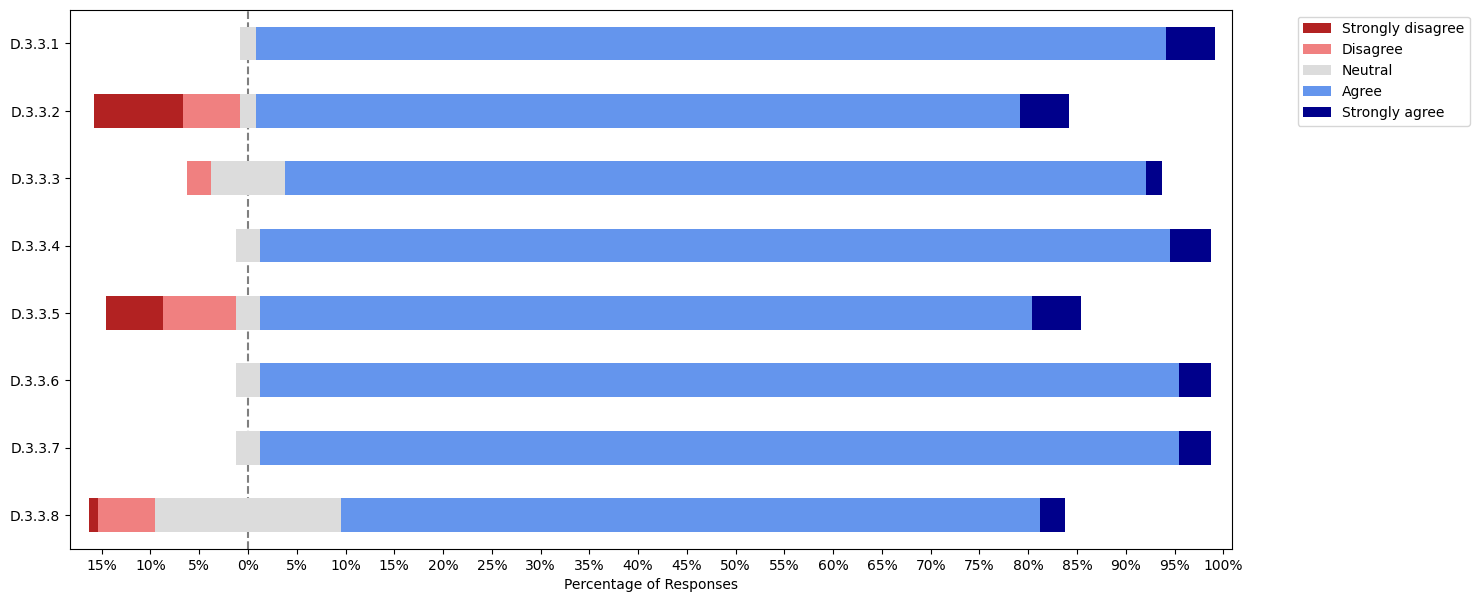

In [28]:
#D.3.3. De acuerdo con las estructuras de recursos humanos de su empresa, ¿en qué nivel está de acuerdo con las siguientes afirmaciones? 
#s19 =data_train[['D.3.3.1',  'D.3.3.6', 'D.3.3.7']]
s19=data_train.iloc[:,126:134]#.replace('En desacuerdo, Neutral','Neutral')
coln=s19.columns
# s18=s18.replace('Neutral, De acuerdo','Neutral')
# define my selections
myscale1 = \
    ['Strongly disagree',
 'Disagree',
  'Neutral',
 'Agree',
 'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s19, myscale1, plot_percentage=True)

In [29]:
# codificar las variables
Factorial_fuction.Coding(s19,myscale1)
#validez
Factorial_fuction.validez(s19)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.7372194394271918
   
Validez de constructo: 
--------------------------------------
Bartlett test: 500.26534498516565  P-Value: 5.939847515620656e-88
KMO: 0.6830084943924767


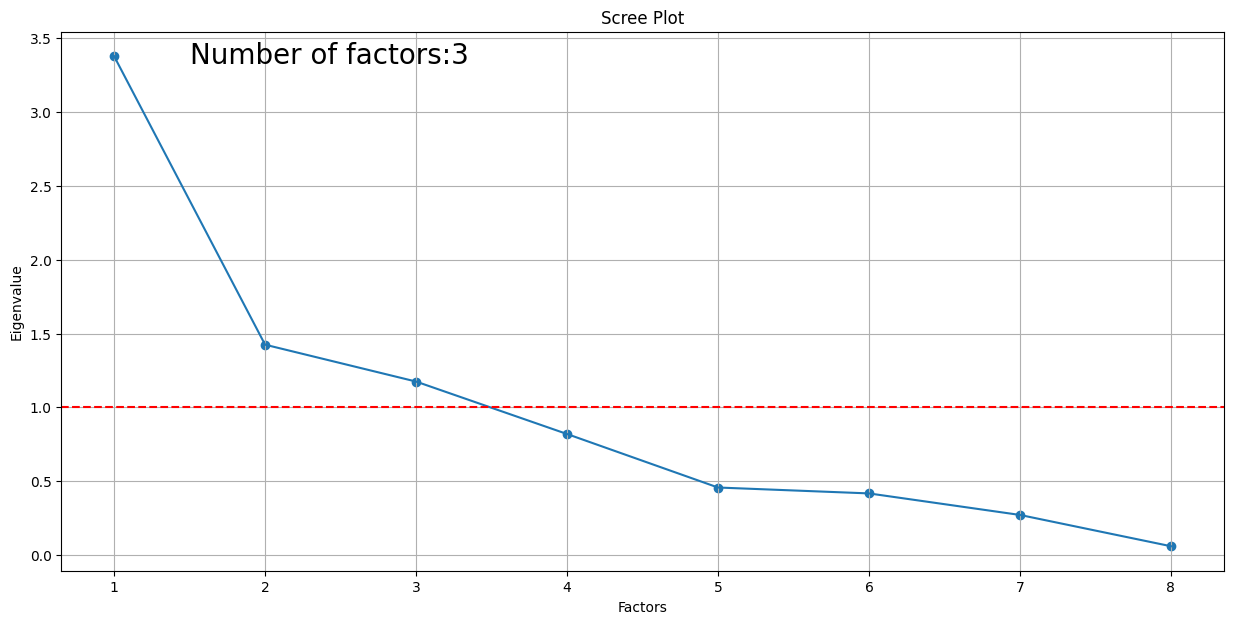

In [30]:
Factorial_fuction.Nfactores(s19)

In [31]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s19.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s19.select_dtypes(include = "float64"))
fact = fa.loadings_
a = np.zeros((len(fact), len(fact[0,:])))
for i in range(len(fact)):
    arr = fact[i,:]
    ind=np.where(arr==max(arr))[0]
    a[i,ind]=fact[i,:].max()
    
pd.DataFrame(np.round(a,3), 
             columns=['Factor '+str(i+1) for i in range(len(fact[0,:]))],
             index=coln)

Factor 1  Factor 2  Factor 3
D.3.3.1     0.000     0.656     0.000
D.3.3.2     0.909     0.000     0.000
D.3.3.3     0.000     0.000     0.975
D.3.3.4     0.000     0.000     0.305
D.3.3.5     0.966     0.000     0.000
D.3.3.6     0.000     0.800     0.000
D.3.3.7     0.000     0.803     0.000
D.3.3.8     0.000     0.000     0.492

In [32]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1  factor 2  factor 3
ss Loadings     1.908888  1.887709  1.411590
Proportion Var  0.238611  0.235964  0.176449
Cumulative Var  0.238611  0.474575  0.651023

Text(0.5, 0, 'Frecuency')

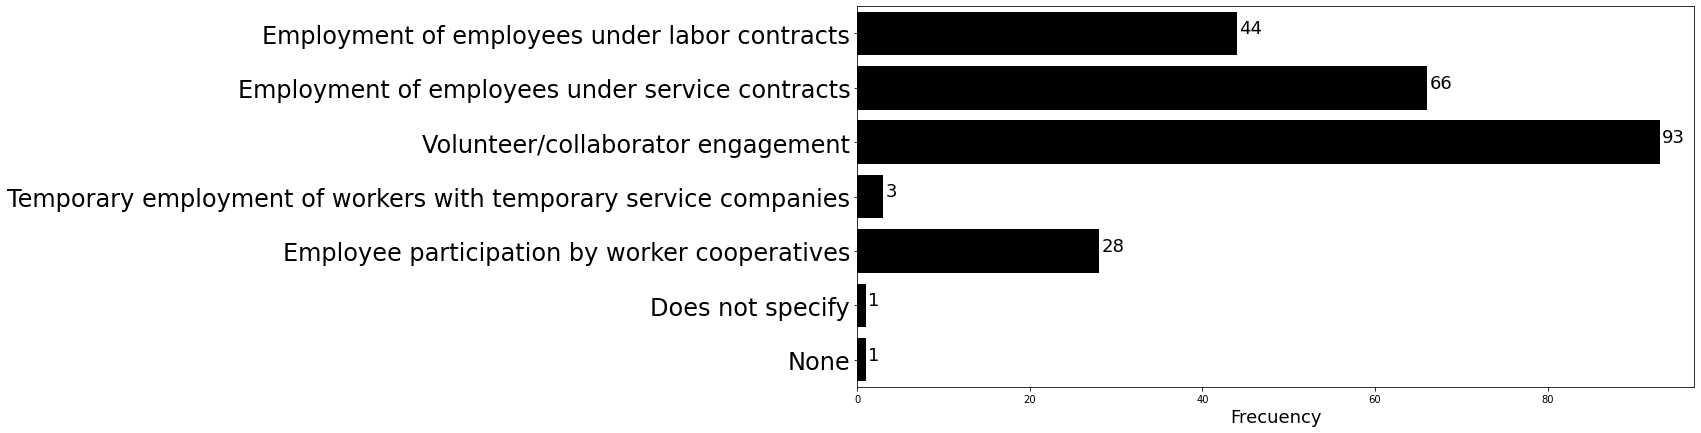

In [ ]:
# C.3.4.  Tipo de modalidades de vinculación (Señale las opciones que representen la situación de su empresa)
modalidad = [data_train.iloc[:,134][i].split(sep=',') for i in range(120)]
modalidad=[elem for sublista in modalidad for elem in sublista]
modalidad=[x.replace(',','') for x in modalidad]
modalidad=[x.strip() for x in modalidad]
modalidad=pd.DataFrame({'Tipo':modalidad})
ax=sns.countplot(y="Tipo", data=modalidad, color="k")
Factorial_fuction.without_hueH(ax,modalidad['Tipo'])
ax.set_xlim(0,max(modalidad["Tipo"].value_counts())+4)
labels = ("Employment of employees under labor contracts", 
          "Employment of employees under service contracts", 
          "Volunteer/collaborator engagement",
          "Temporary employment of workers with temporary service companies",
          "Employee participation by worker cooperatives",
          "Does not specify",
          "None")
ax.set_yticklabels(labels)
plt.ylabel("Type of linkage modalities")
plt.xlabel('Frecuency')
plt.yticks(fontsize = 24, rotation=0)
# plt.ylabel("Network types", fontsize=18)
plt.ylabel("")
plt.xlabel('Frecuency', fontsize=18)

### Innovación

<AxesSubplot: xlabel='Percentage of Responses'>

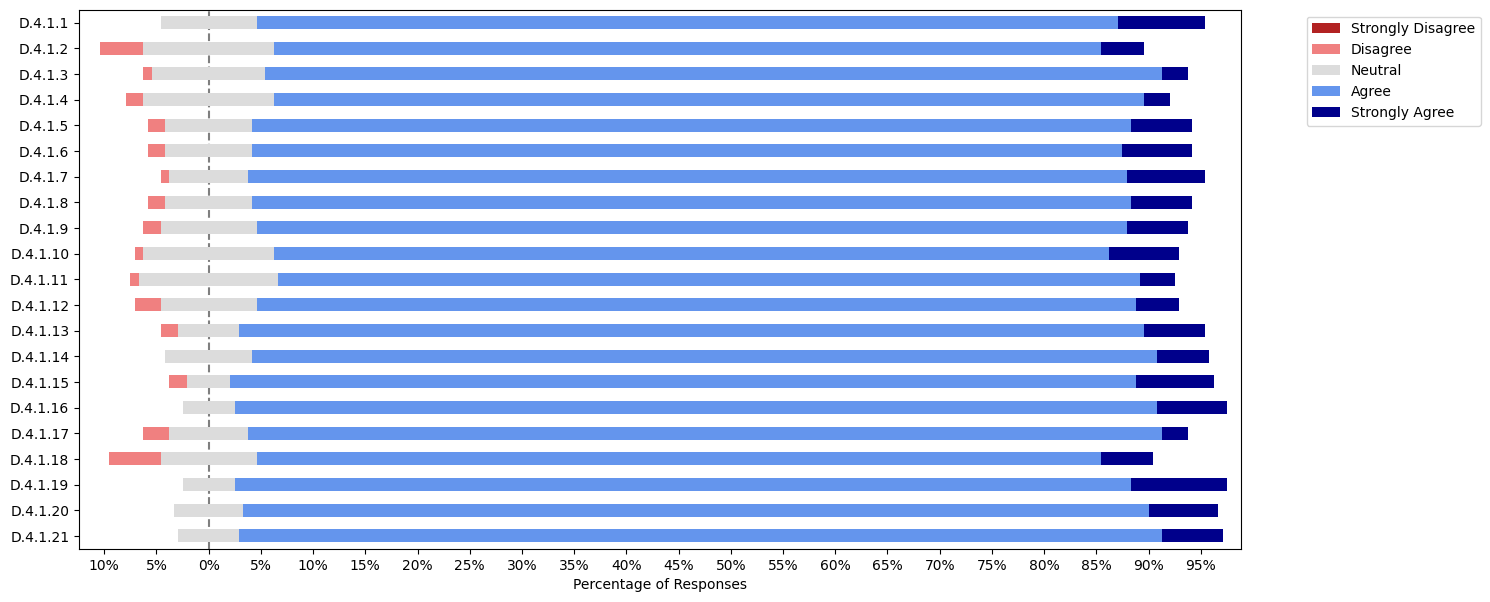

In [52]:
# Teniendo en cuenta todos los indicadores
# s2t=data_train[['D.4.1.4', 'D.4.1.5', 'D.4.1.6','D.4.1.7', 'D.4.1.8', 'D.4.1.9','D.4.1.11']]
s2t=data_train.iloc[:,135:156]#.replace('En desacuerdo, Neutral','Neutral')
coln=s2t.columns
# s18=s18.replace('Neutral, De acuerdo','Neutral')
# define my selections
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
# create a likert plot
plot_likert.plot_likert(s2t, myscale1, plot_percentage=True)

In [53]:
# codificar las variables
Factorial_fuction.Coding(s2t,myscale1)
#validez
Factorial_fuction.validez(s2t)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.9368698374932664
   
Validez de constructo: 
--------------------------------------
Bartlett test: 2273.372979478398  P-Value: 0.0
KMO: 0.8205219848800599


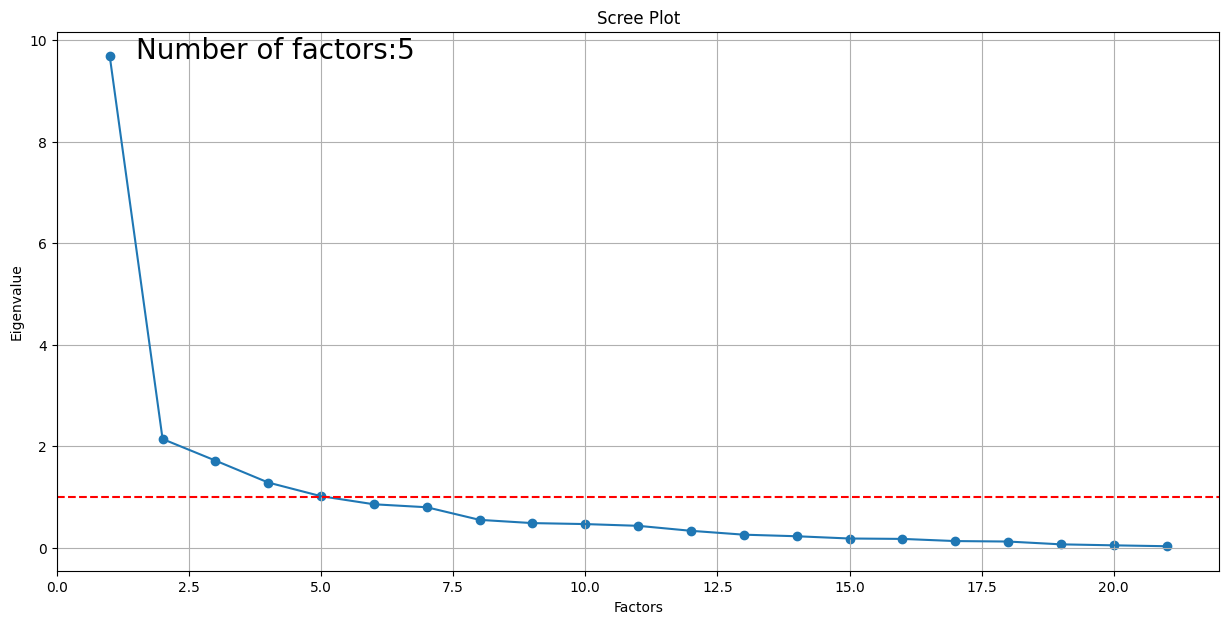

In [54]:
Factorial_fuction.Nfactores(s2t)

In [55]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s2t.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s2t.select_dtypes(include = "float64"))
fact = fa.loadings_
a = np.zeros((len(fact), len(fact[0,:])))
for i in range(len(fact)):
    arr = fact[i,:]
    ind=np.where(arr==max(arr))[0]
    a[i,ind]=fact[i,:].max()
    
pd.DataFrame(np.round(a,3), 
             columns=['Factor '+str(i+1) for i in range(len(fact[0,:]))],
             index=coln)

Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
D.4.1.1      0.000     0.540     0.000     0.000     0.000
D.4.1.2      0.000     0.000     0.697     0.000     0.000
D.4.1.3      0.000     0.000     0.749     0.000     0.000
D.4.1.4      0.649     0.000     0.000     0.000     0.000
D.4.1.5      0.748     0.000     0.000     0.000     0.000
D.4.1.6      0.853     0.000     0.000     0.000     0.000
D.4.1.7      0.730     0.000     0.000     0.000     0.000
D.4.1.8      0.785     0.000     0.000     0.000     0.000
D.4.1.9      0.818     0.000     0.000     0.000     0.000
D.4.1.10     0.000     0.000     0.000     0.346     0.000
D.4.1.11     0.686     0.000     0.000     0.000     0.000
D.4.1.12     0.690     0.000     0.000     0.000     0.000
D.4.1.13     0.000     0.000     0.000     0.000     0.537
D.4.1.14     0.418     0.000     0.000     0.000     0.000
D.4.1.15     0.000     0.000     0.000     0.000     0.562
D.4.1.16     0.000     0.000     0.000     0.000     0.557
D.4.1.17     0.000     0.000     0.000     0.621     0.000
D.4.1.18     0.000     0.000     0.000     0.610     0.000
D.4.1.19     0.000     0.608     0.000     0.000     0.000
D.4.1.20     0.000     0.737     0.000     0.000     0.000
D.4.1.21     0.000     0.905     0.000     0.000     0.000

In [56]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1  factor 2  factor 3  factor 4  factor 5
ss Loadings     5.657446  3.119331  2.065832  1.730316  1.660359
Proportion Var  0.269402  0.148540  0.098373  0.082396  0.079065
Cumulative Var  0.269402  0.417942  0.516315  0.598711  0.677775

<AxesSubplot: xlabel='Percentage of Responses'>

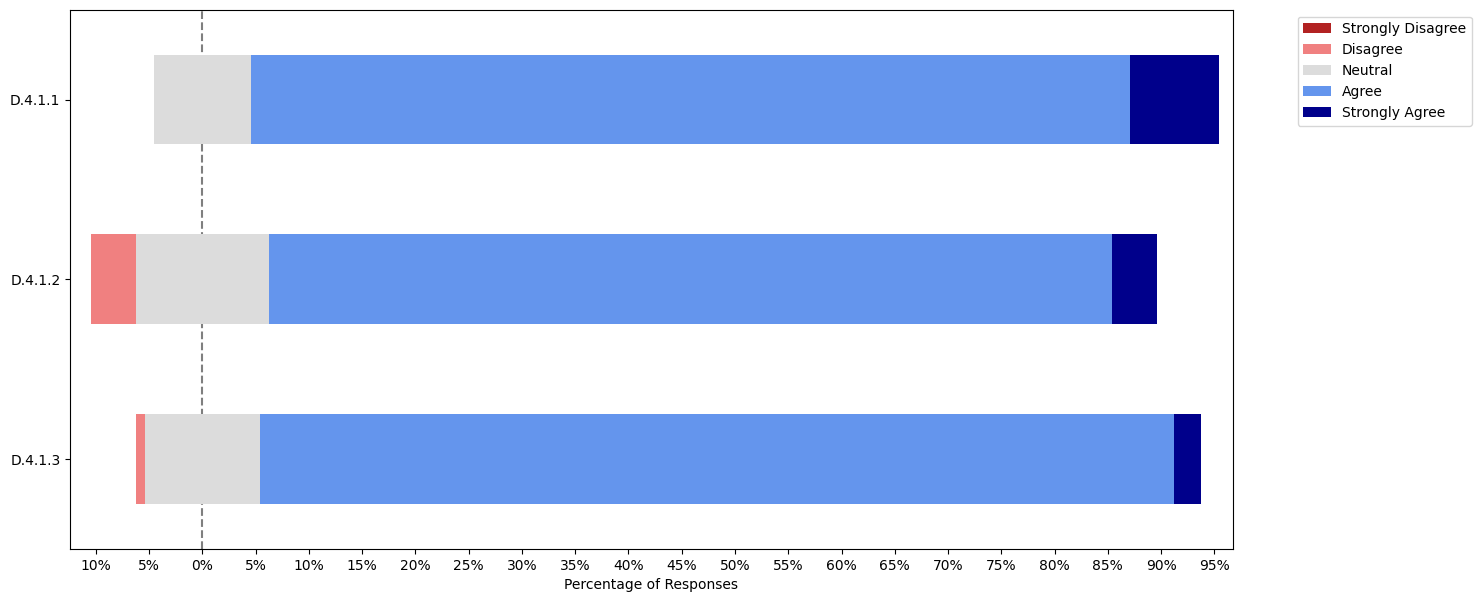

In [66]:
# Incremental
s20=data_train.iloc[:,135:138]#.replace('En desacuerdo, Neutral','Neutral')
coln=s20.columns
# s18=s18.replace('Neutral, De acuerdo','Neutral')
# define my selections
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
# create a likert plot
plot_likert.plot_likert(s20, myscale1, plot_percentage=True)

In [67]:
# codificar las variables
Factorial_fuction.Coding(s20,myscale1)
#validez
Factorial_fuction.validez(s20)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.7549131070326456
   
Validez de constructo: 
--------------------------------------
Bartlett test: 96.09484274401105  P-Value: 1.074016729028596e-20
KMO: 0.6722988624532559


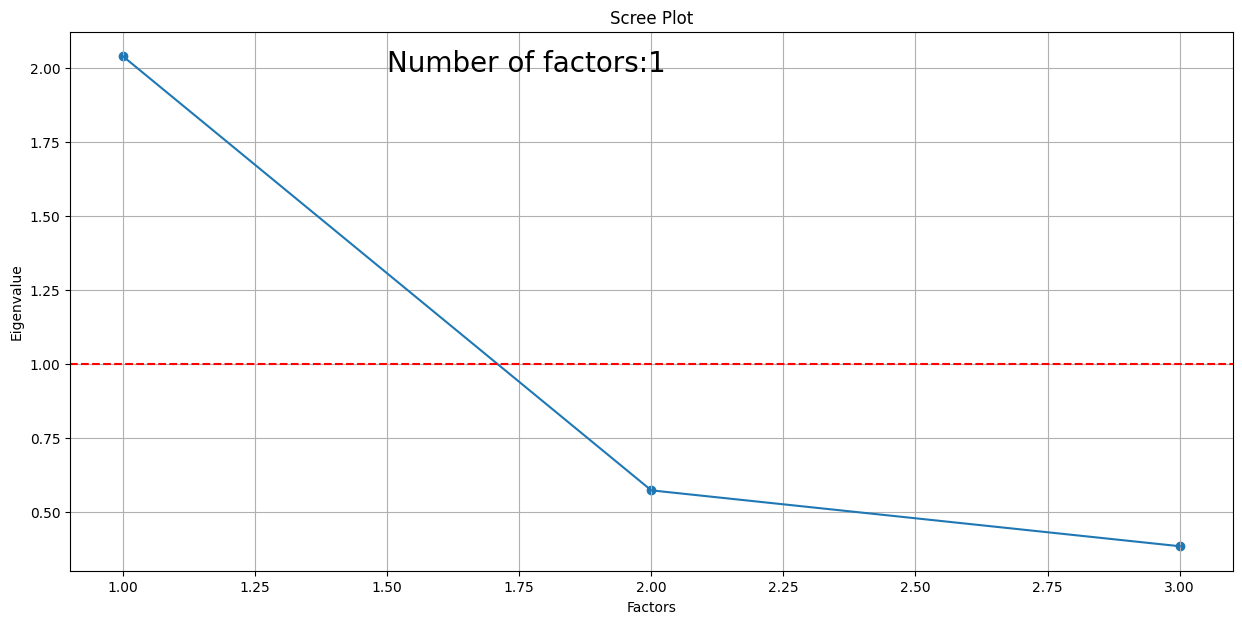

In [68]:
Factorial_fuction.Nfactores(s20)

In [69]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s20.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s20.select_dtypes(include = "float64"))
fact = fa.loadings_
a = np.zeros((len(fact), len(fact[0,:])))
for i in range(len(fact)):
    arr = fact[i,:]
    ind=np.where(arr==max(arr))[0]
    a[i,ind]=fact[i,:].max()
    
pd.DataFrame(np.round(a,3), 
             columns=['Factor '+str(i+1) for i in range(len(fact[0,:]))],
             index=coln)

Factor 1
D.4.1.1    -0.605
D.4.1.2    -0.824
D.4.1.3    -0.740

In [ ]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1
ss Loadings     1.592359
Proportion Var  0.530786
Cumulative Var  0.530786

<AxesSubplot: xlabel='Percentage of Responses'>

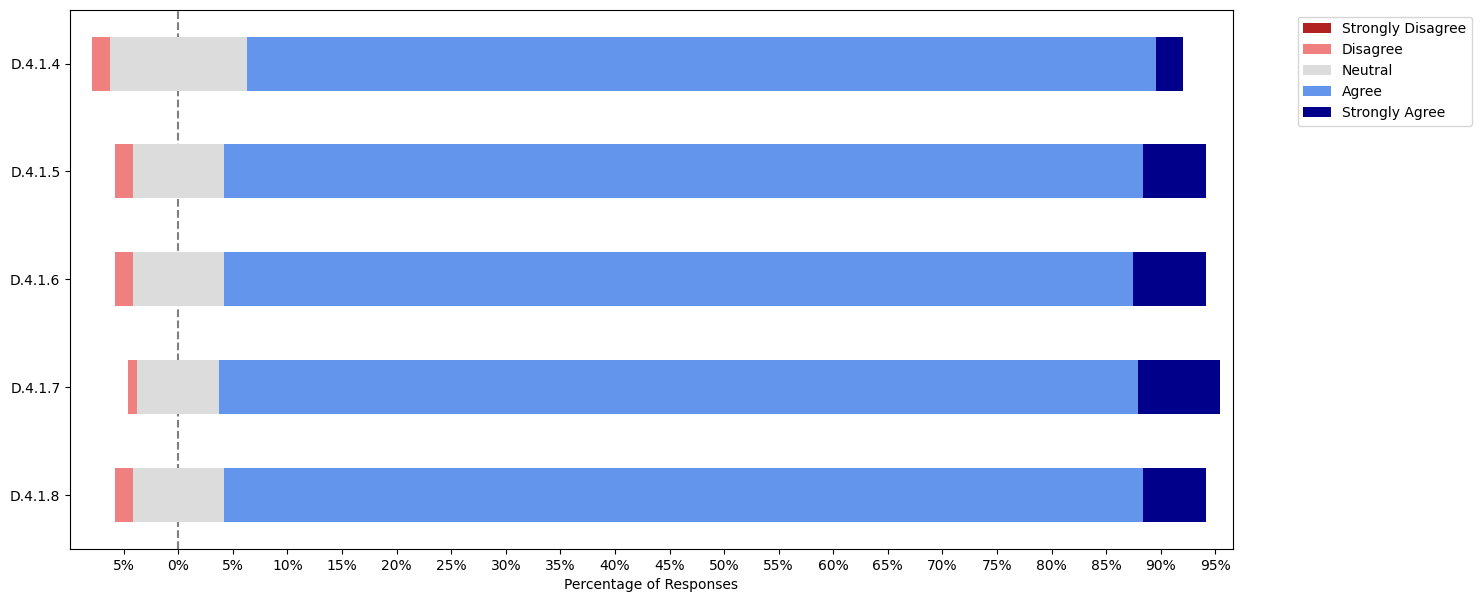

In [74]:
# Disruptiva
s21=data_train.iloc[:,138:143]#.replace('En desacuerdo, Neutral','Neutral')
coln=s21.columns
# s18=s18.replace('Neutral, De acuerdo','Neutral')
# define my selections
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
# create a likert plot
plot_likert.plot_likert(s21, myscale1, plot_percentage=True)

In [75]:
# codificar las variables
Factorial_fuction.Coding(s21,myscale1)
#validez
Factorial_fuction.validez(s21)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.917605918202511
   
Validez de constructo: 
--------------------------------------
Bartlett test: 535.9232407935557  P-Value: 9.211558343194752e-109
KMO: 0.788407128242424


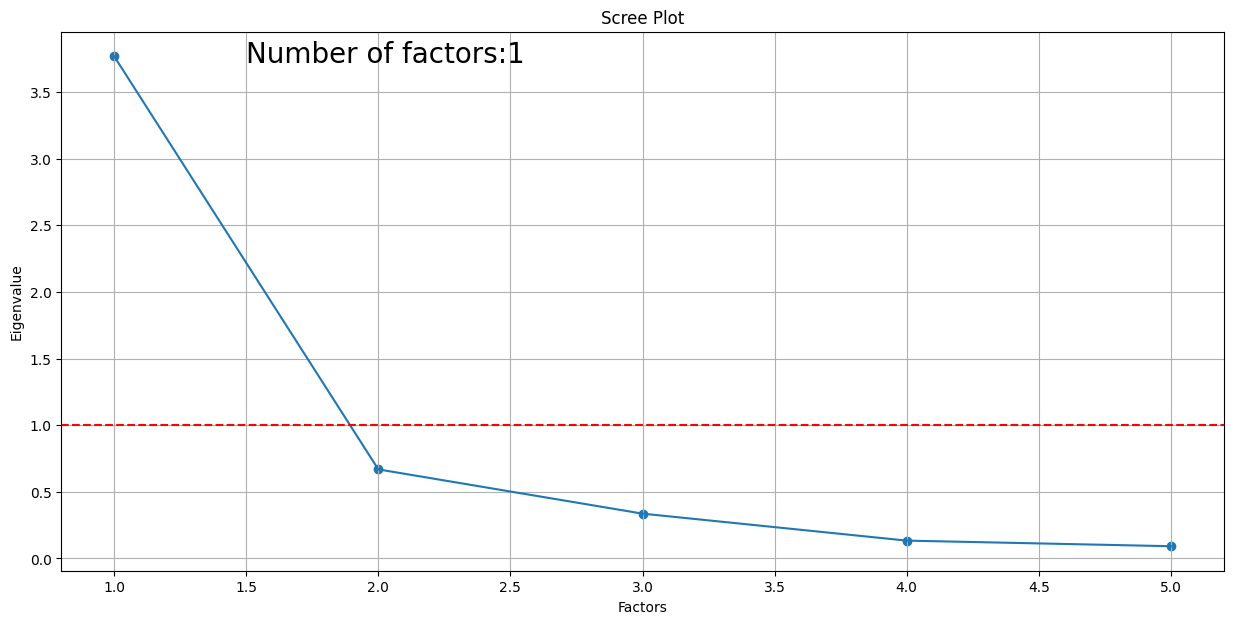

In [76]:
Factorial_fuction.Nfactores(s21)

In [77]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s21.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s21.select_dtypes(include = "float64"))
fact = fa.loadings_
a = np.zeros((len(fact), len(fact[0,:])))
for i in range(len(fact)):
    arr = fact[i,:]
    ind=np.where(arr==max(arr))[0]
    a[i,ind]=fact[i,:].max()
    
pd.DataFrame(np.round(a,3), 
             columns=['Factor '+str(i+1) for i in range(len(fact[0,:]))],
             index=coln)

Factor 1
D.4.1.4    -0.748
D.4.1.5    -0.866
D.4.1.6    -0.935
D.4.1.7    -0.838
D.4.1.8    -0.770

In [78]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1
ss Loadings     3.479033
Proportion Var  0.695807
Cumulative Var  0.695807

<AxesSubplot: xlabel='Percentage of Responses'>

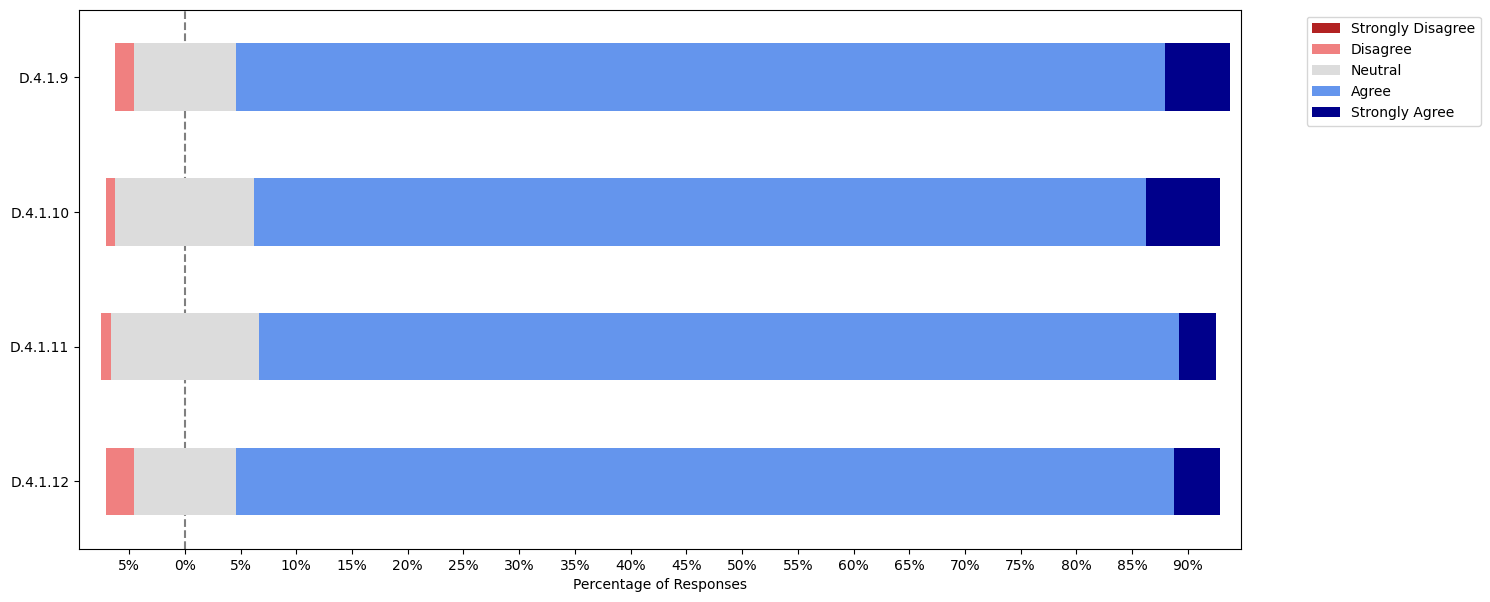

In [80]:
# Institucional
s22=data_train.iloc[:,143:147]#.replace('En desacuerdo, Neutral','Neutral')
coln=s22.columns
# define my selections
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
# create a likert plot
plot_likert.plot_likert(s22, myscale1, plot_percentage=True)

In [81]:
# codificar las variables
Factorial_fuction.Coding(s22,myscale1)
#validez
Factorial_fuction.validez(s22)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.8025149792426581
   
Validez de constructo: 
--------------------------------------
Bartlett test: 173.87712880011352  P-Value: 6.767778242940144e-35
KMO: 0.7438533418445973


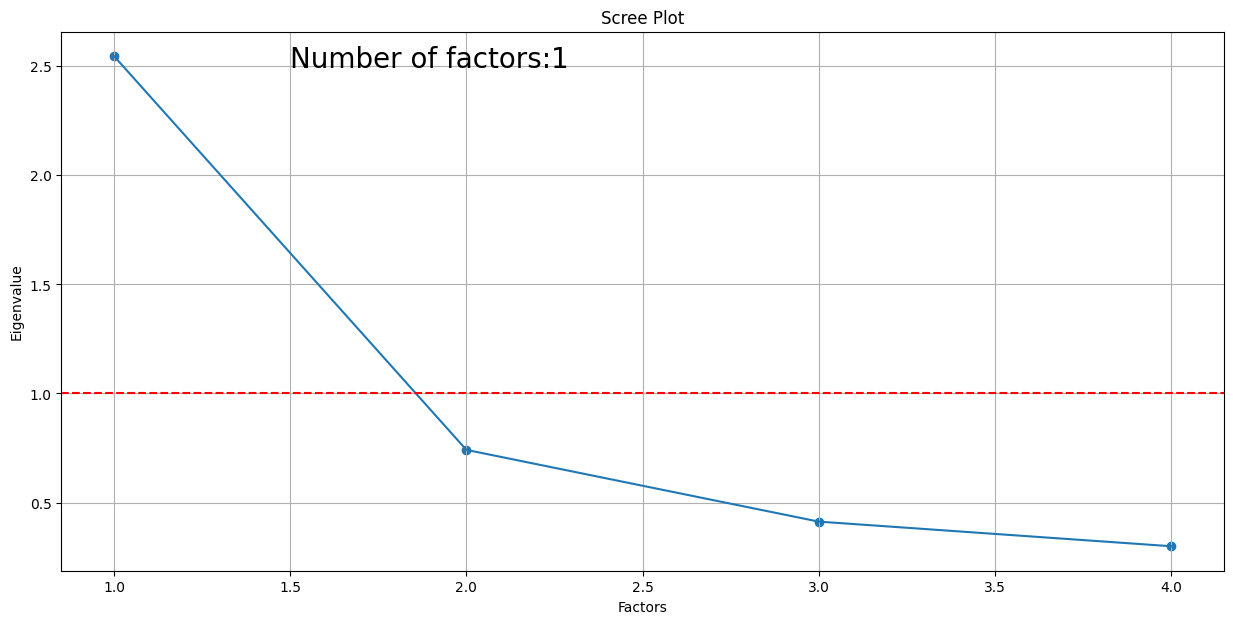

In [82]:
Factorial_fuction.Nfactores(s22)

In [83]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s22.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s22.select_dtypes(include = "float64"))
fact = fa.loadings_
a = np.zeros((len(fact), len(fact[0,:])))
for i in range(len(fact)):
    arr = fact[i,:]
    ind=np.where(arr==max(arr))[0]
    a[i,ind]=fact[i,:].max()
    
pd.DataFrame(np.round(a,3), 
             columns=['Factor '+str(i+1) for i in range(len(fact[0,:]))],
             index=coln)

Factor 1
D.4.1.9     -0.778
D.4.1.10    -0.485
D.4.1.11    -0.816
D.4.1.12    -0.785

In [84]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1
ss Loadings     2.124387
Proportion Var  0.531097
Cumulative Var  0.531097

<AxesSubplot: xlabel='Percentage of Responses'>

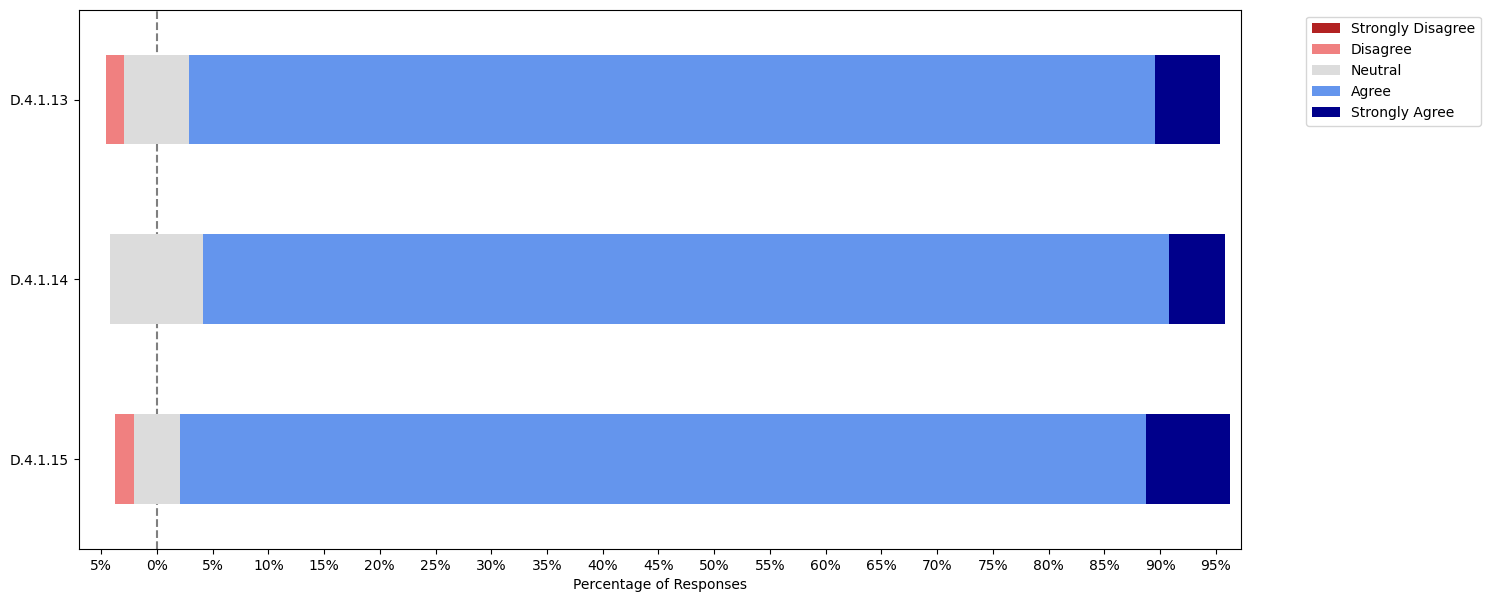

In [85]:
# De producto
s23=data_train.iloc[:,147:150]#.replace('En desacuerdo, Neutral','Neutral')
coln=s23.columns
# define my selections
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
# create a likert plot
plot_likert.plot_likert(s23, myscale1, plot_percentage=True)

In [86]:
# codificar las variables
Factorial_fuction.Coding(s23,myscale1)
#validez
Factorial_fuction.validez(s23)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.8286713286713284
   
Validez de constructo: 
--------------------------------------
Bartlett test: 141.55677000551813  P-Value: 1.7449358295689514e-30
KMO: 0.6943747190297104


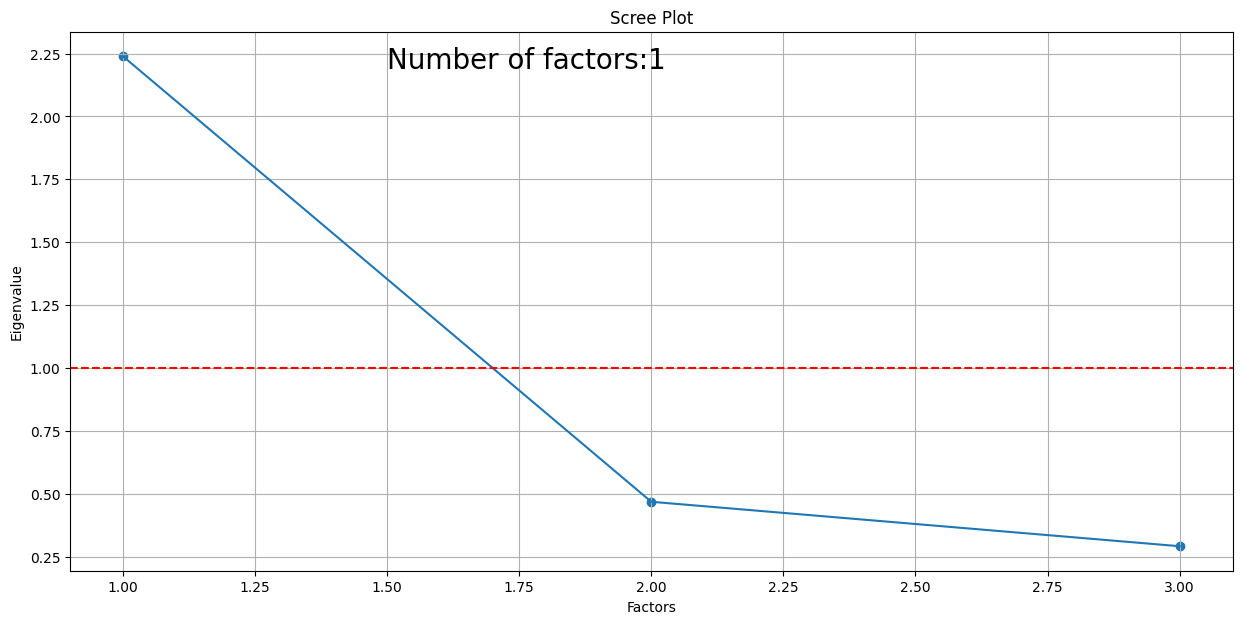

In [87]:
Factorial_fuction.Nfactores(s23)

In [88]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s23.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s23.select_dtypes(include = "float64"))
fact = fa.loadings_
a = np.zeros((len(fact), len(fact[0,:])))
for i in range(len(fact)):
    arr = fact[i,:]
    ind=np.where(arr==max(arr))[0]
    a[i,ind]=fact[i,:].max()
    
pd.DataFrame(np.round(a,3), 
             columns=['Factor '+str(i+1) for i in range(len(fact[0,:]))],
             index=coln)

Factor 1
D.4.1.13    -0.902
D.4.1.14    -0.706
D.4.1.15    -0.758

In [89]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1
ss Loadings     1.887189
Proportion Var  0.629063
Cumulative Var  0.629063

<AxesSubplot: xlabel='Percentage of Responses'>

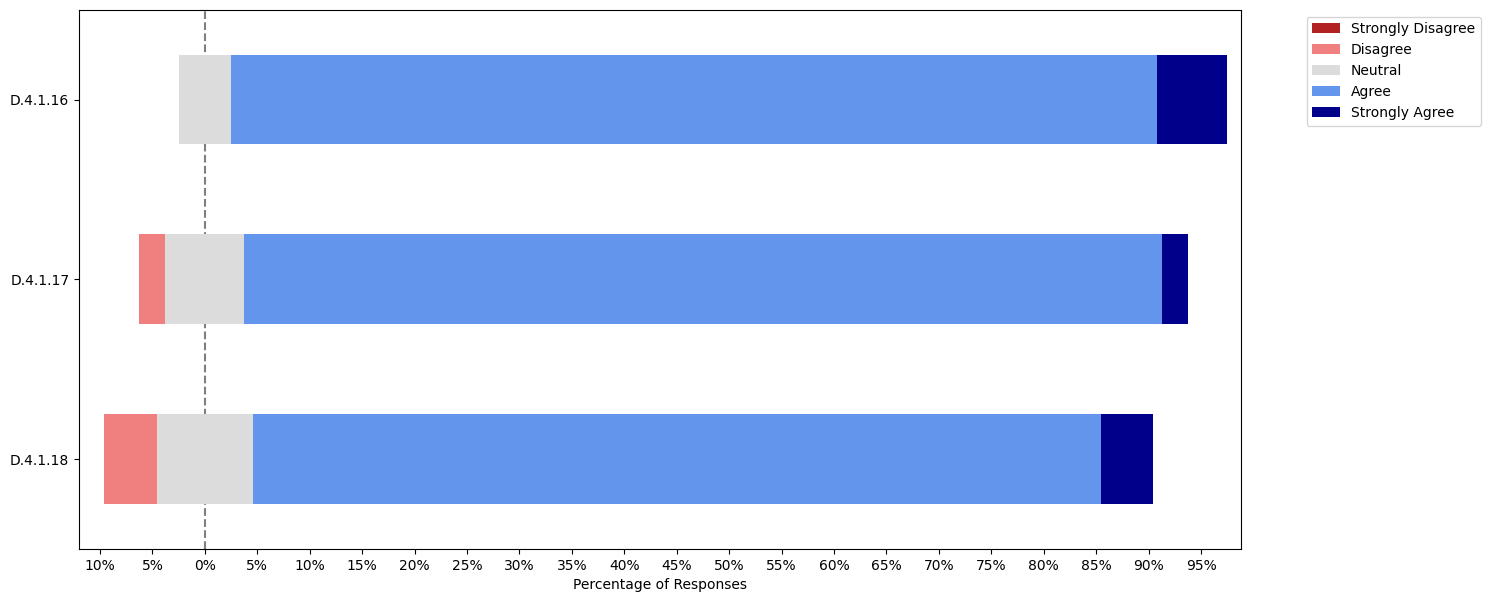

In [90]:
# De markenting
s24=data_train.iloc[:,150:153]#.replace('En desacuerdo, Neutral','Neutral')
coln=s24.columns
# define my selections
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
# create a likert plot
plot_likert.plot_likert(s24, myscale1, plot_percentage=True)

In [91]:
# codificar las variables
Factorial_fuction.Coding(s24,myscale1)
#validez
Factorial_fuction.validez(s24)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.6744568194266933
   
Validez de constructo: 
--------------------------------------
Bartlett test: 69.02620597222852  P-Value: 6.8985412788435954e-15
KMO: 0.6031001603845202


<AxesSubplot: xlabel='Percentage of Responses'>

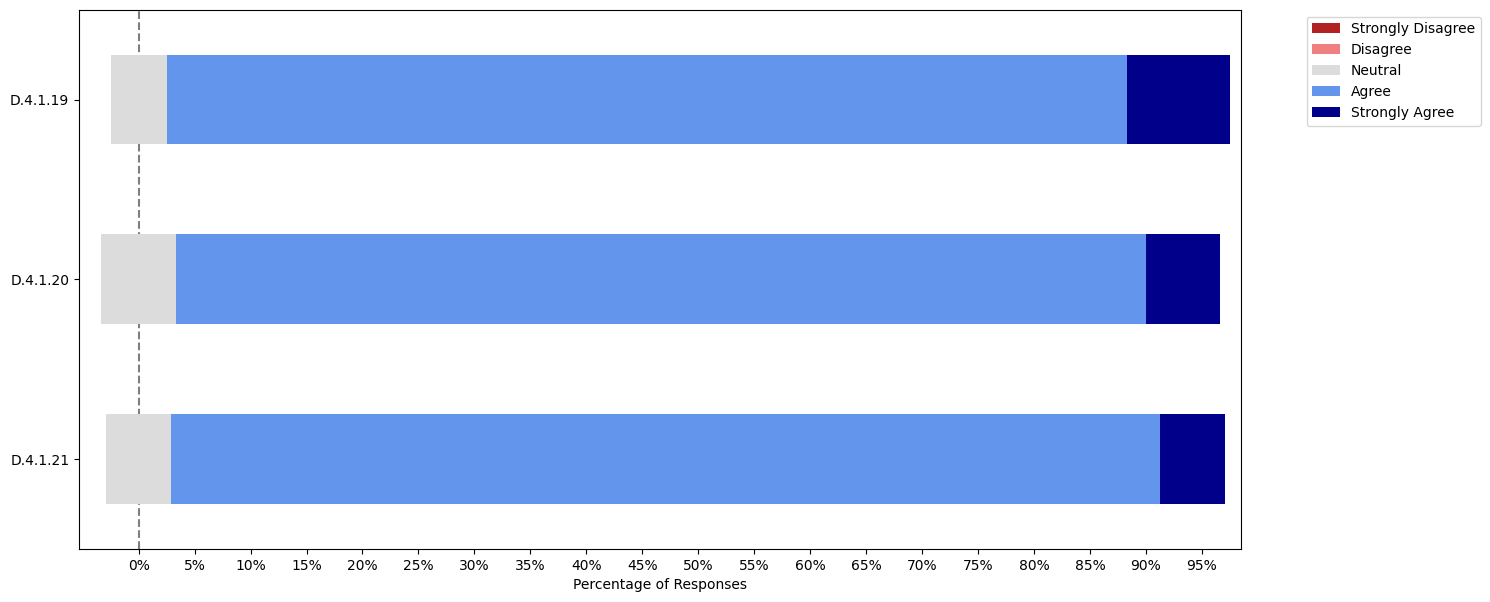

In [92]:
# Organizacional
s25=data_train.iloc[:,153:156]#.replace('En desacuerdo, Neutral','Neutral')
coln=s25.columns
# define my selections
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
# create a likert plot
plot_likert.plot_likert(s25, myscale1, plot_percentage=True)

In [93]:
# codificar las variables
Factorial_fuction.Coding(s25,myscale1)
#validez
Factorial_fuction.validez(s25)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.8548448870164689
   
Validez de constructo: 
--------------------------------------
Bartlett test: 188.88546050572165  P-Value: 1.0625857390140876e-40
KMO: 0.6665502595154428


### Capital social

<AxesSubplot: xlabel='Percentage of Responses'>

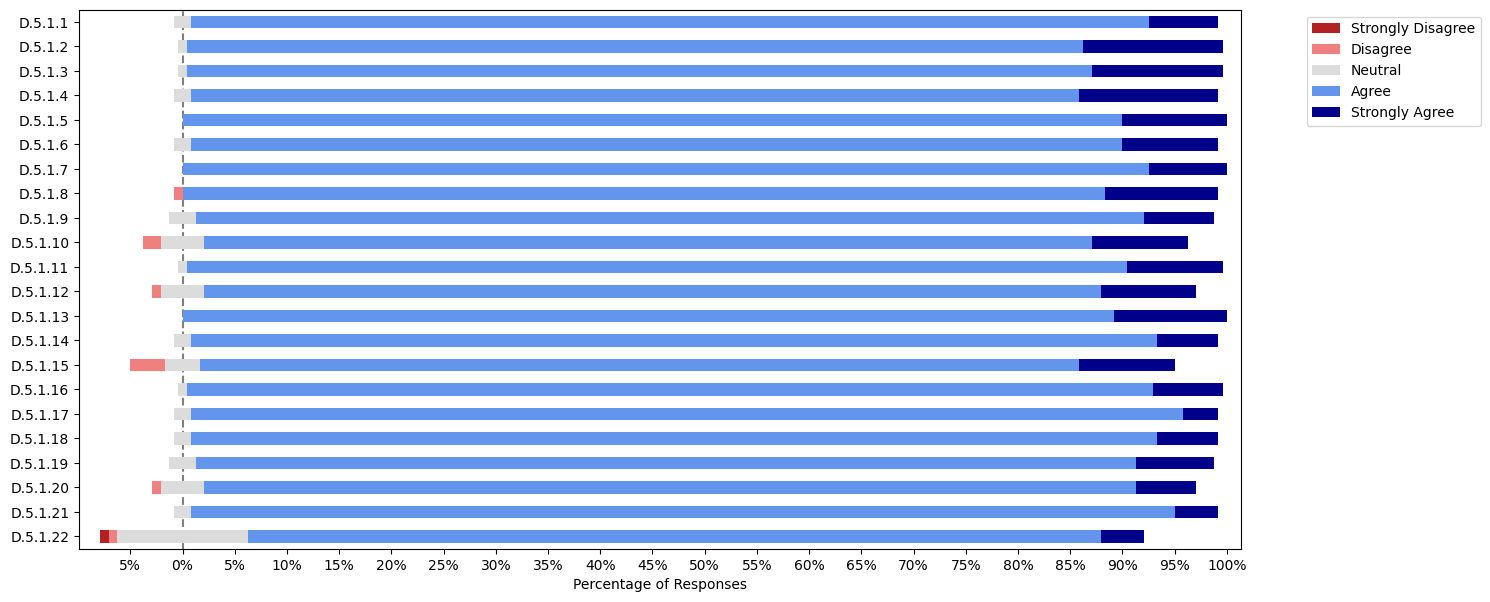

In [37]:
# teniendo en cuenta todos los indicadores
# s26t=data_train[['D.5.1.1', 'D.5.1.2', 'D.5.1.3','D.5.1.4','D.5.1.5']]
s26t=data_train.iloc[:,156:178]#.replace('En desacuerdo, Neutral','Neutral')
coln=s26t.columns
# define my selections
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
# create a likert plot
plot_likert.plot_likert(s26t, myscale1, plot_percentage=True)

In [38]:
# codificar las variables
Factorial_fuction.Coding(s26t,myscale1)
#validez
Factorial_fuction.validez(s26t)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.920655654497548
   
Validez de constructo: 
--------------------------------------
Bartlett test: 2309.013943375567  P-Value: 0.0
KMO: 0.7121904626877504


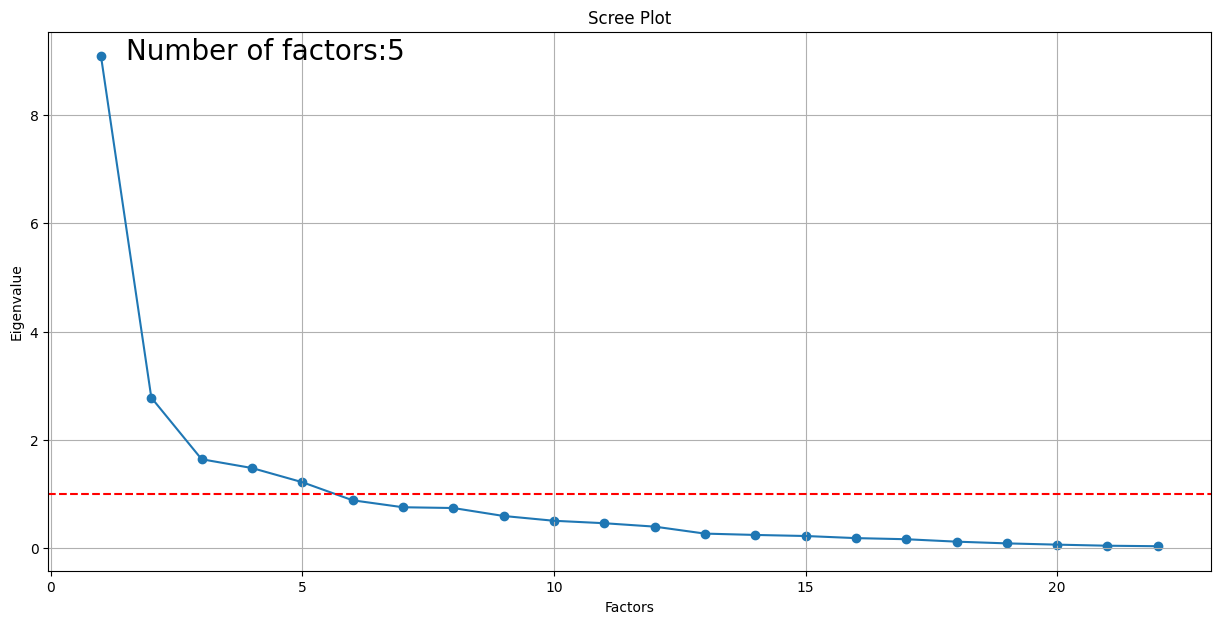

In [39]:
Factorial_fuction.Nfactores(s26t)

In [40]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s26t.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s26t.select_dtypes(include = "float64"))
fact = fa.loadings_
a = np.zeros((len(fact), len(fact[0,:])))
for i in range(len(fact)):
    arr = fact[i,:]
    ind=np.where(arr==max(arr))[0]
    a[i,ind]=fact[i,:].max()
    
pd.DataFrame(np.round(a,3), 
             columns=['Factor '+str(i+1) for i in range(len(fact[0,:]))],
             index=coln)

Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
D.5.1.1      0.676     0.000     0.000     0.000     0.000
D.5.1.2      0.785     0.000     0.000     0.000     0.000
D.5.1.3      0.686     0.000     0.000     0.000     0.000
D.5.1.4      0.000     0.000     0.523     0.000     0.000
D.5.1.5      0.000     0.000     0.778     0.000     0.000
D.5.1.6      0.000     0.000     0.640     0.000     0.000
D.5.1.7      0.000     0.000     0.469     0.000     0.000
D.5.1.8      0.000     0.679     0.000     0.000     0.000
D.5.1.9      0.000     0.628     0.000     0.000     0.000
D.5.1.10     0.000     0.510     0.000     0.000     0.000
D.5.1.11     0.000     0.000     0.000     0.000     0.669
D.5.1.12     0.000     0.000     0.000     0.000     0.645
D.5.1.13     0.000     0.000     0.000     0.000     0.476
D.5.1.14     0.000     0.000     0.000     0.605     0.000
D.5.1.15     0.000     0.672     0.000     0.000     0.000
D.5.1.16     0.534     0.000     0.000     0.000     0.000
D.5.1.17     0.000     0.000     0.000     0.838     0.000
D.5.1.18     0.812     0.000     0.000     0.000     0.000
D.5.1.19     0.733     0.000     0.000     0.000     0.000
D.5.1.20     0.000     0.801     0.000     0.000     0.000
D.5.1.21     0.534     0.000     0.000     0.000     0.000
D.5.1.22     0.000     0.593     0.000     0.000     0.000

In [41]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1  factor 2  factor 3  factor 4  factor 5
ss Loadings     4.525732  3.253750  2.915845  2.024420  1.992880
Proportion Var  0.205715  0.147898  0.132538  0.092019  0.090585
Cumulative Var  0.205715  0.353613  0.486151  0.578170  0.668756

<AxesSubplot: xlabel='Percentage of Responses'>

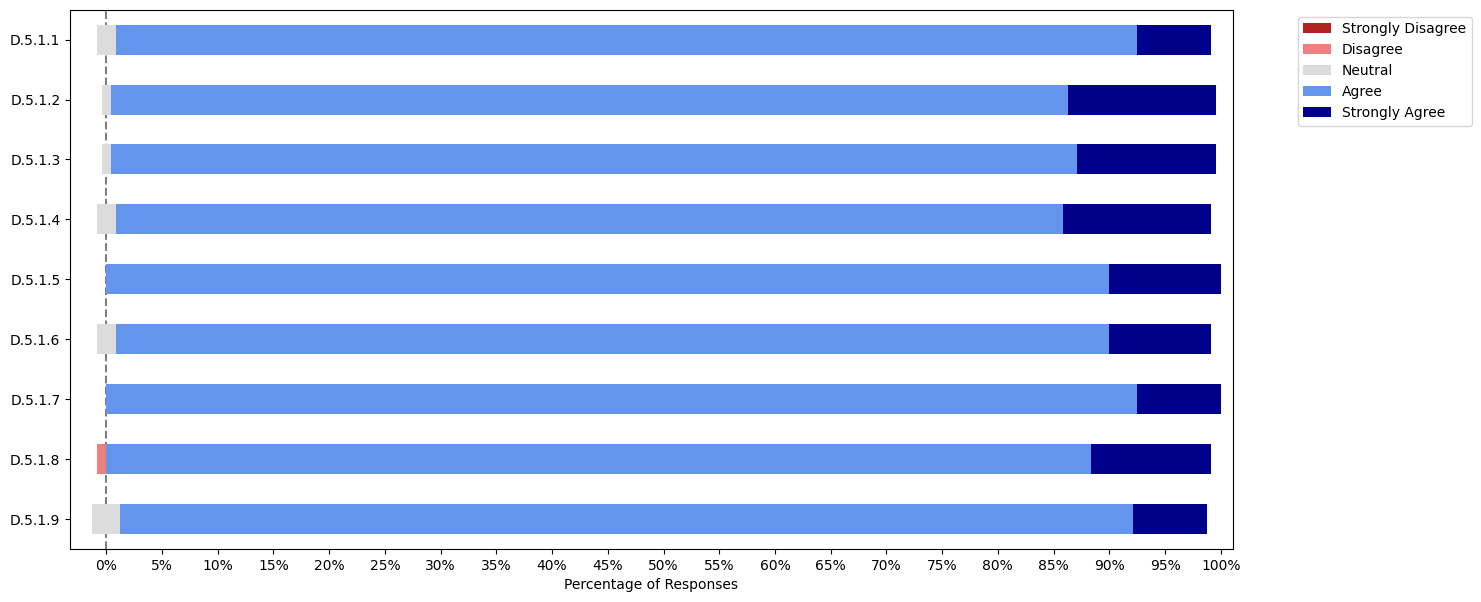

In [100]:
# dimension 1
s26=data_train.iloc[:,156:165]#.replace('En desacuerdo, Neutral','Neutral')
coln=s26.columns
# define my selections
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
# create a likert plot
plot_likert.plot_likert(s26, myscale1, plot_percentage=True)

In [101]:
# codificar las variables
Factorial_fuction.Coding(s26,myscale1)
#validez
Factorial_fuction.validez(s26)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.887842531840988
   
Validez de constructo: 
--------------------------------------
Bartlett test: 648.0447343044244  P-Value: 2.6971645665913185e-113
KMO: 0.73497833073259


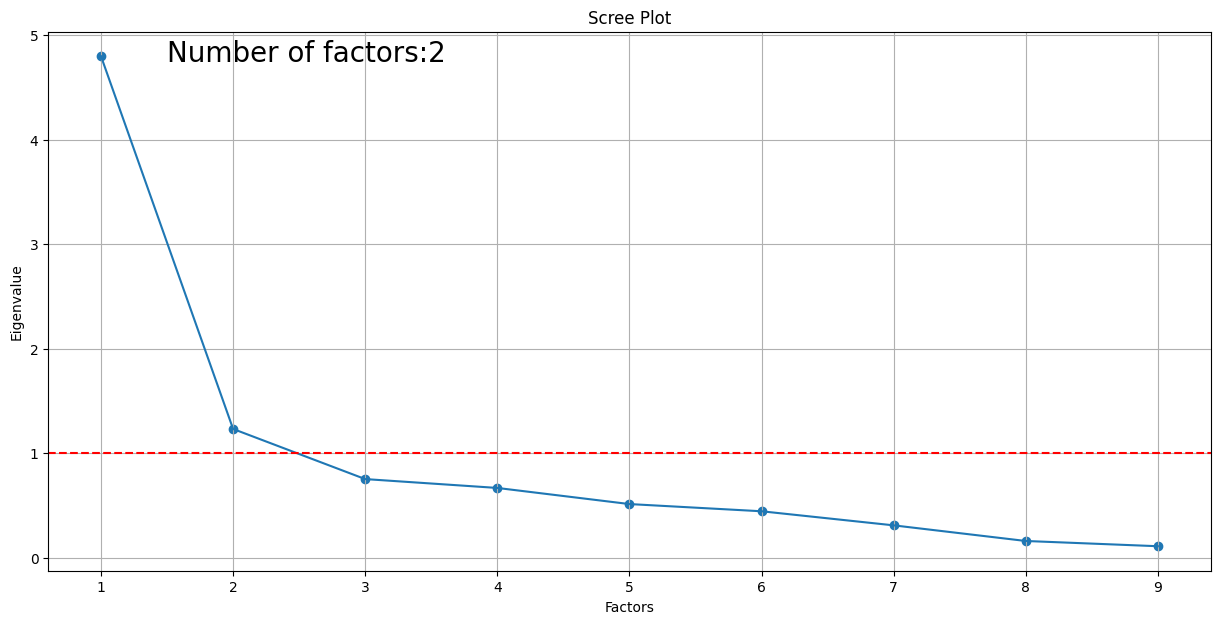

In [102]:
Factorial_fuction.Nfactores(s26)

In [103]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s26.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s26.select_dtypes(include = "float64"))
fact = fa.loadings_
a = np.zeros((len(fact), len(fact[0,:])))
for i in range(len(fact)):
    arr = fact[i,:]
    ind=np.where(arr==max(arr))[0]
    a[i,ind]=fact[i,:].max()
    
pd.DataFrame(np.round(a,3), 
             columns=['Factor '+str(i+1) for i in range(len(fact[0,:]))],
             index=coln)

Factor 1  Factor 2
D.5.1.1     0.618     0.000
D.5.1.2     0.840     0.000
D.5.1.3     0.802     0.000
D.5.1.4     0.699     0.000
D.5.1.5     0.551     0.000
D.5.1.6     0.000     0.594
D.5.1.7     0.000     0.520
D.5.1.8     0.000     0.661
D.5.1.9     0.000     0.882

In [104]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1  factor 2
ss Loadings     2.980290  2.296351
Proportion Var  0.331143  0.255150
Cumulative Var  0.331143  0.586293

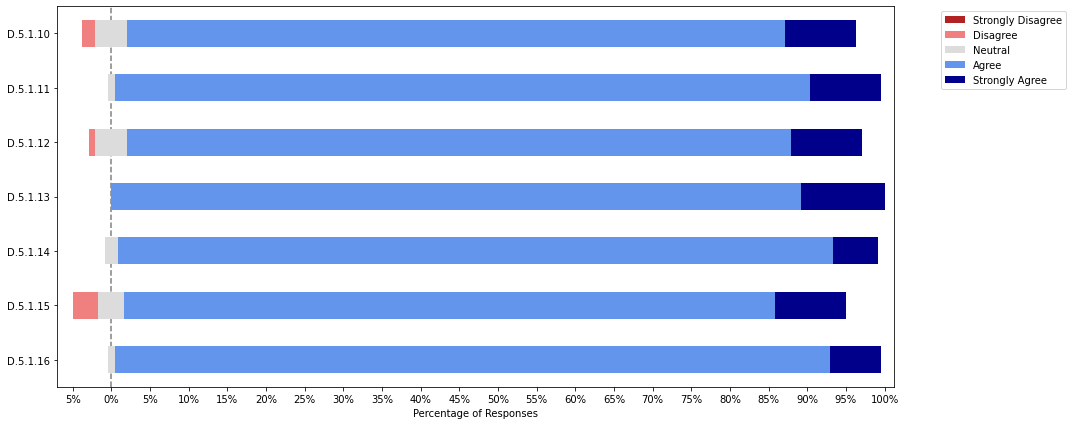

In [ ]:
# Cognitiva
s27=data_train.iloc[:,165:172]#.replace('En desacuerdo, Neutral','Neutral')
# define my selections
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
# create a likert plot
plot_likert.plot_likert(s27, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s27,myscale1)
#validez
Factorial_fuction.validez(s27)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.7819789674952198
   
Validez de constructo: 
--------------------------------------
Bartlett test: 297.0511093750839  P-Value: 1.2660246142988067e-50
KMO: 0.7006887108564094


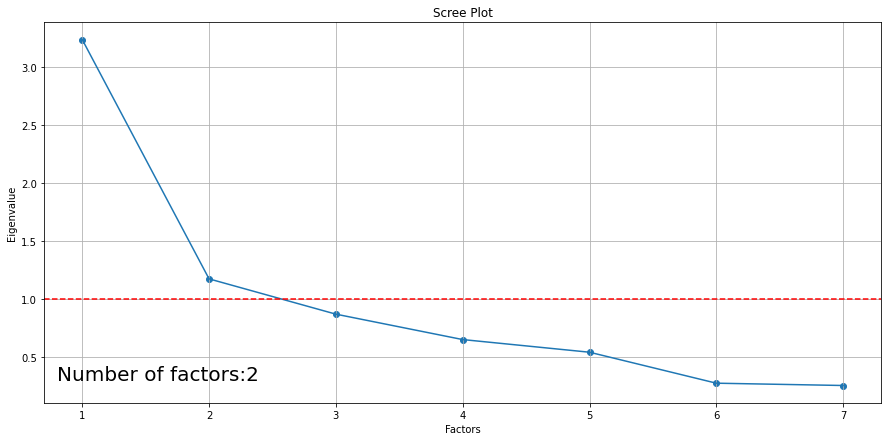

In [ ]:
Factorial_fuction.Nfactores(s27)

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s27.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s27.select_dtypes(include = "float64"))
pd.DataFrame(fa.loadings_)

0         1
0  0.298550  0.422120
1  0.845713  0.047852
2  0.583623  0.293404
3  0.655308  0.234744
4  0.401771  0.604029
5  0.055899  0.997557
6  0.511202  0.233544

In [ ]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1  factor 2
ss Loadings     2.000278  1.736180
Proportion Var  0.285754  0.248026
Cumulative Var  0.285754  0.533780

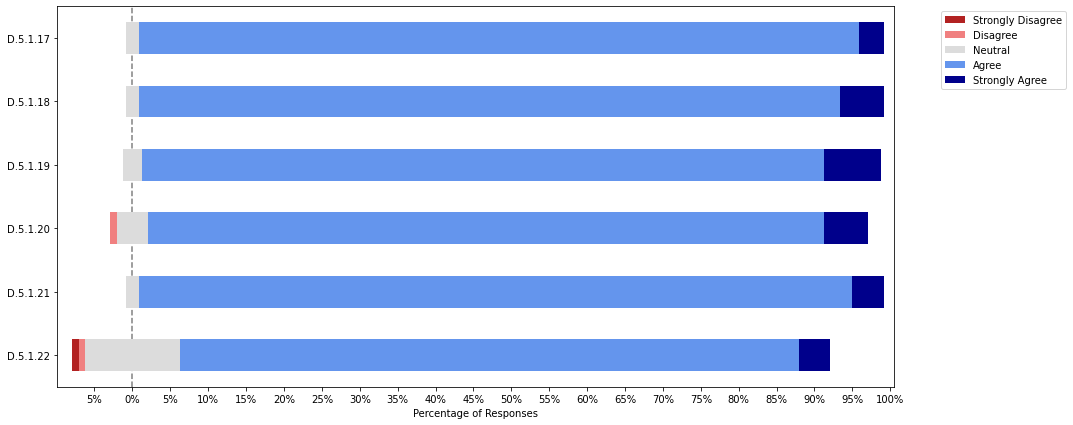

In [ ]:
# Relacional
s28=data_train.iloc[:,172:178]#.replace('En desacuerdo, Neutral','Neutral')
# define my selections
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
# create a likert plot
plot_likert.plot_likert(s28, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s28,myscale1)
#validez
Factorial_fuction.validez(s28)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.7781069180101167
   
Validez de constructo: 
--------------------------------------
Bartlett test: 289.0846193244323  P-Value: 1.0321527846070322e-52
KMO: 0.7334070813884047


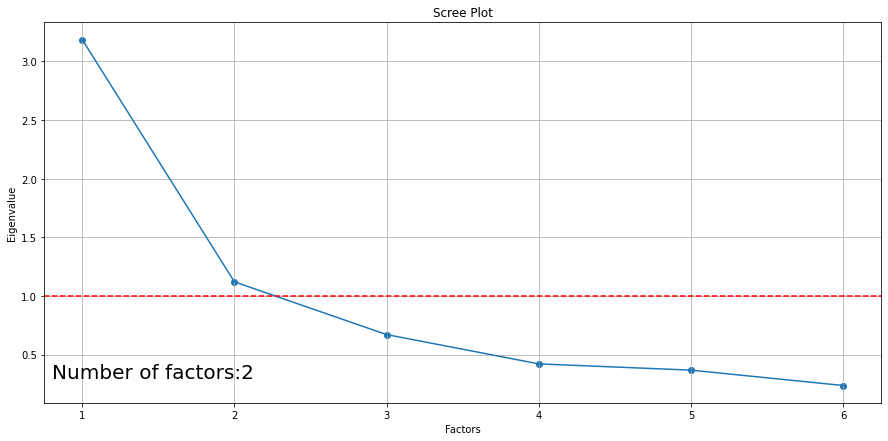

In [ ]:
Factorial_fuction.Nfactores(s28)

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s28.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s28.select_dtypes(include = "float64"))
pd.DataFrame(fa.loadings_)

0         1
0  0.576858  0.209190
1  0.821440  0.119134
2  0.779839  0.253555
3  0.238043  0.733278
4  0.584068  0.566922
5  0.127191  0.683223

In [ ]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1  factor 2
ss Loadings     2.029655  1.448134
Proportion Var  0.338276  0.241356
Cumulative Var  0.338276  0.579631

## Factores individuales

### Caractersiticas demograficas

Text(0, 0.5, 'Frecuency')

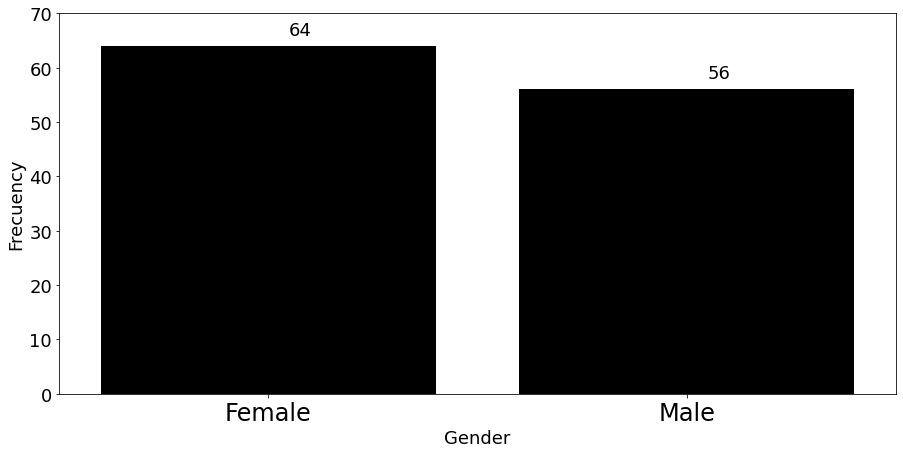

In [ ]:
#sexo
ax=sns. countplot(data_train.iloc[:,178],color="k")
ax.set_ylim(0,70)
Factorial_fuction.with_hue(ax,data_train.iloc[:,178])
plt.xlabel("Gender", fontsize=18)
plt.xticks(fontsize = 18, rotation=0)
labels = ("Female", 
          "Male")
ax.set_xticklabels(labels)
plt.xticks(fontsize = 24, rotation=0)
plt.yticks(fontsize = 18, rotation=0)
# plt.ylabel("Network types", fontsize=18)
plt.ylabel('Frecuency', fontsize=18)


Text(0.5, 0, '')

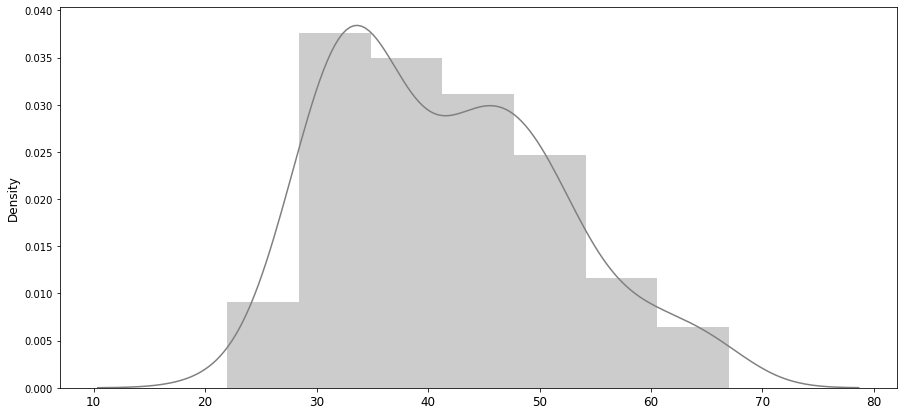

In [ ]:
# Edad
edad=data_train.iloc[:,179]
sns.distplot(edad, color="grey")
plt.xticks(fontsize = 12, rotation=0)
# plt.ylabel("Network types", fontsize=18)
plt.ylabel('Density', fontsize=12)
plt.xlabel("")

[Text(0, 0, 'Stratum 6'),
 Text(0, 0, 'Stratum  5'),
 Text(0, 0, 'Stratum  3'),
 Text(0, 0, 'Stratum  4'),
 Text(0, 0, 'Stratum  2'),
 Text(0, 0, 'Stratum  1')]

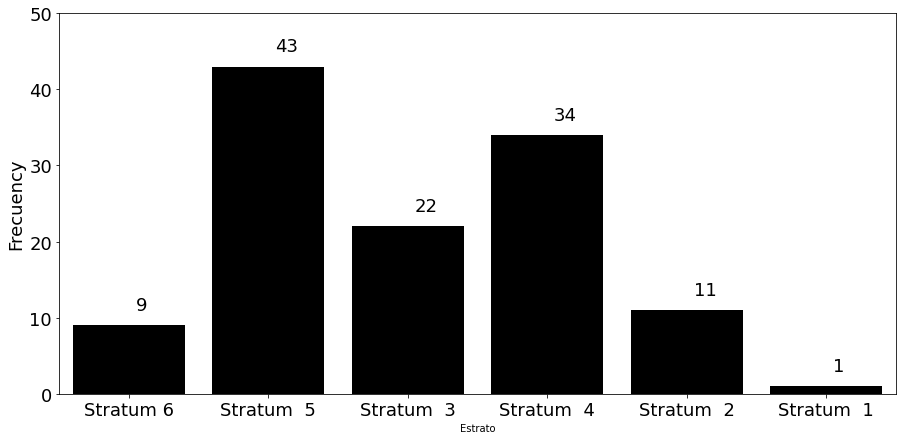

In [ ]:
# Estrato socioeconomico
ax=sns. countplot(data_train.iloc[:,181],color="k")
ax.set_ylim(0,50)
Factorial_fuction.with_hue(ax,data_train.iloc[:,181])
plt.ylabel("Frecuency", fontsize=18)
# plt.xlabel("Socioeconomic stratum")
plt.xticks(fontsize = 18, rotation=0)
plt.yticks(fontsize = 18, rotation=0)
labels = ("Stratum 6", 
          "Stratum  5",
          "Stratum  3",
          "Stratum  4",
          "Stratum  2",
          "Stratum  1")
ax.set_xticklabels(labels)

### Formación

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

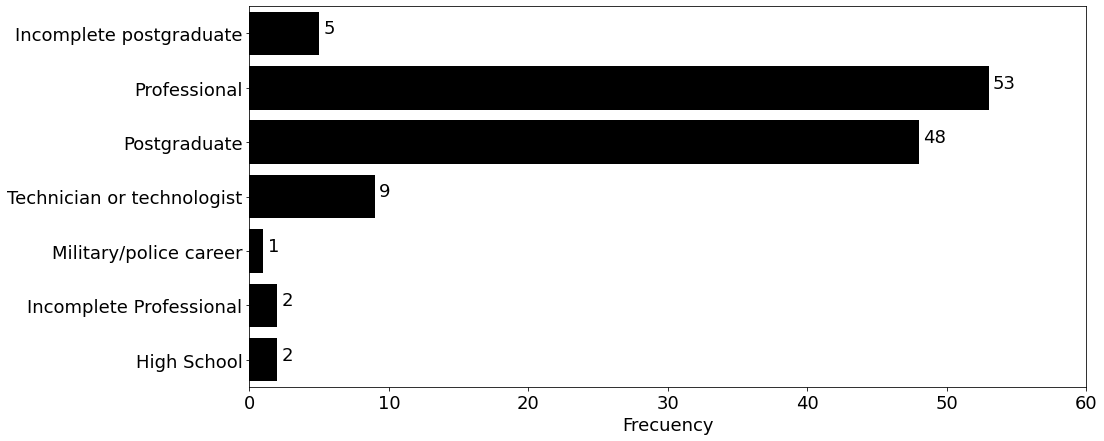

In [ ]:
# Educación
ax=sns. countplot(y=data_train.iloc[:,182],color="k")
ax.set_xlim(0,60)
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 10)
Factorial_fuction.without_hueH(ax,data_train.iloc[:,182])
plt.xlabel("Frecuency", fontsize=18)
plt.ylabel("")
labels = ("Incomplete postgraduate", 
          "Professional",
          "Postgraduate",
          "Technician or technologist",
          "Military/police career",
          "Incomplete Professional",
          "High School")
ax.set_yticklabels(labels)
plt.xticks(fontsize = 18, rotation=0)
plt.yticks(fontsize = 18, rotation=0)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

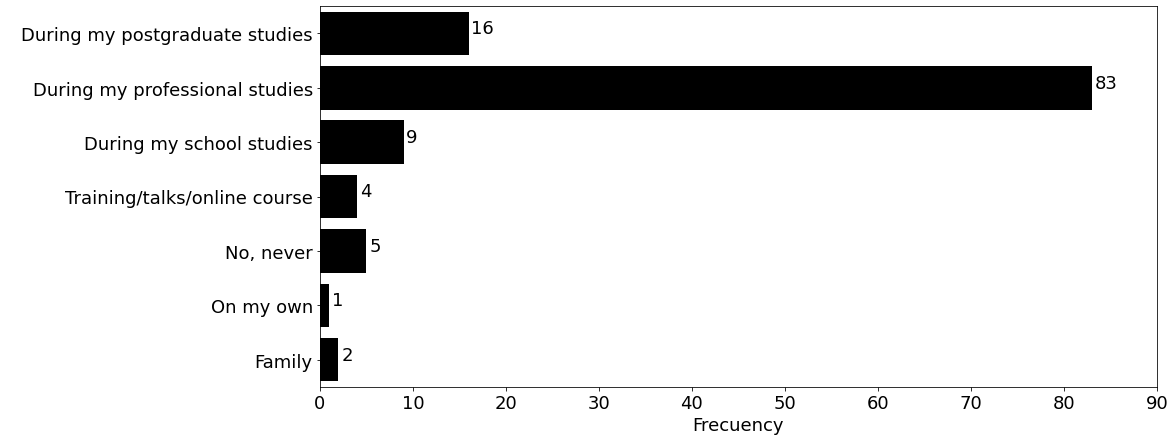

In [ ]:
# previa información
ax=sns. countplot(y=data_train.iloc[:,183],color="k")
ax.set_xlim(0,90)
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)
Factorial_fuction.without_hueH(ax,data_train.iloc[:,183])
plt.xlabel("Frecuency", fontsize=18)
plt.ylabel(" ")
plt.xticks(fontsize = 10, rotation=0)
labels = ("During my postgraduate studies", 
          "During my professional studies",
          "During my school studies",
          "Training/talks/online course",
          "No, never",
          "On my own",
          "Family")
ax.set_yticklabels(labels)
plt.xticks(fontsize = 18, rotation=0)
plt.yticks(fontsize = 18, rotation=0)

### Experiencia

[Text(0, 0, 'Private'), Text(0, 0, 'Volunteer'), Text(0, 0, 'Public')]

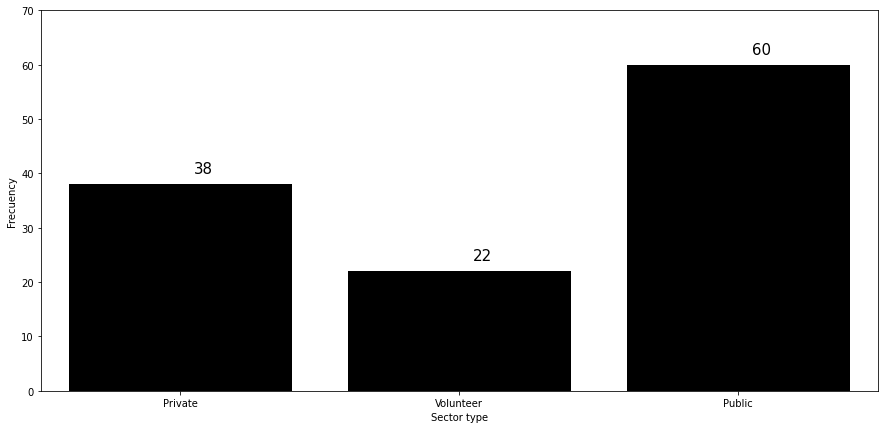

In [ ]:
#b3.1 frecuencia del tipo de sector
ax=sns. countplot(data_train.iloc[:,184],color="k")
ax.set_ylim(0,70)
Factorial_fuction.with_hue(ax,data_train.iloc[:,184])
plt.ylabel("Frecuency")
plt.xlabel("Sector type")
plt.xticks(fontsize = 10, rotation=0)
labels = ("Private", 
          "Volunteer",
          "Public")
ax.set_xticklabels(labels)

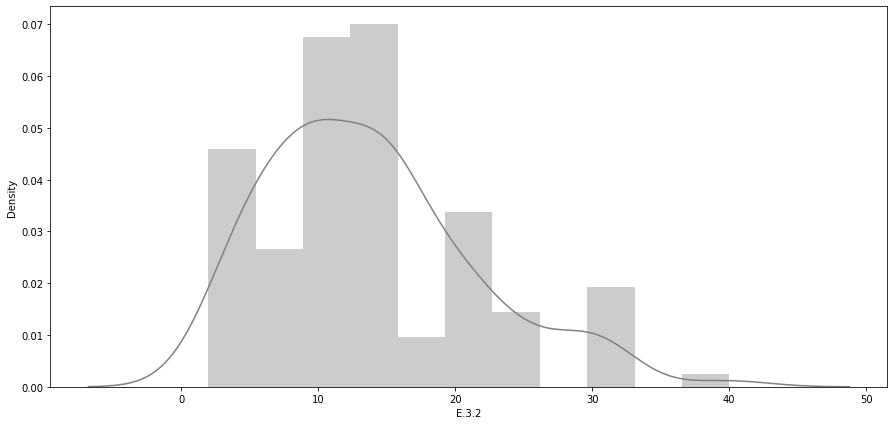

In [ ]:
# Años de experiencia relacionados a la empresa social
Exper=data_train.iloc[:,185]
sns.distplot(Exper,color="grey")

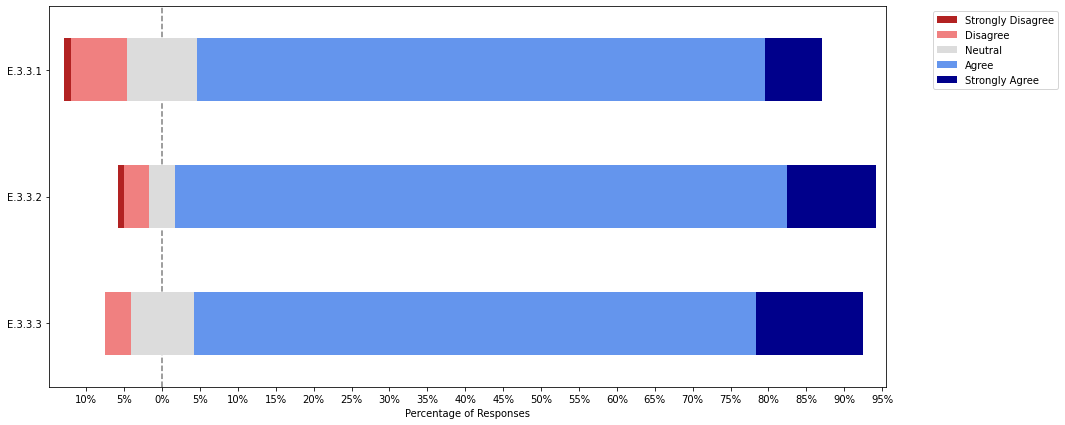

In [ ]:
s29=data_train.iloc[:,186:189]#.replace('En desacuerdo, Neutral','Neutral')
# define my selections
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
# create a likert plot
plot_likert.plot_likert(s29, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s29,myscale1)
#validez
Factorial_fuction.validez(s29)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.05155091957178154
   
Validez de constructo: 
--------------------------------------
Bartlett test: 39.33322850251776  P-Value: 1.4752512340393878e-08
KMO: 0.42160330534431073


### Tiempo de dedicación

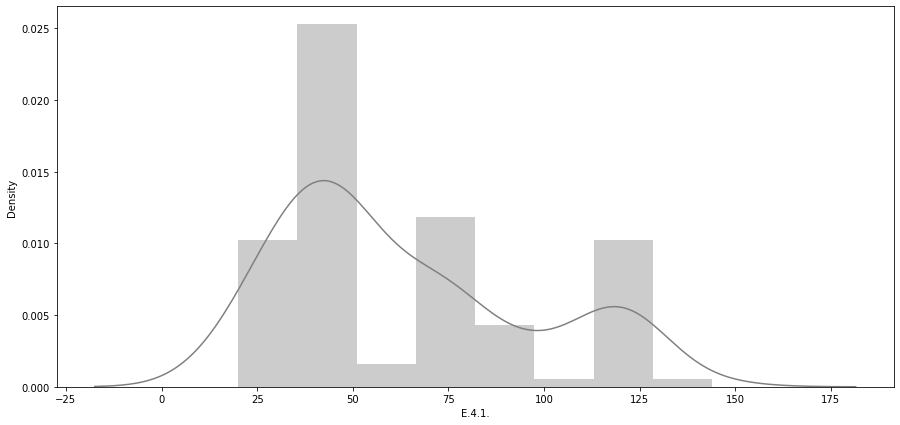

In [ ]:
# En una semana habitual de trabajo (48 horas),  indique el número de horas promedio aproximado del tiempo que dedica a la empresa social
dedi=data_train.iloc[:,189]
sns.distplot(dedi, color='grey')

### Empatía

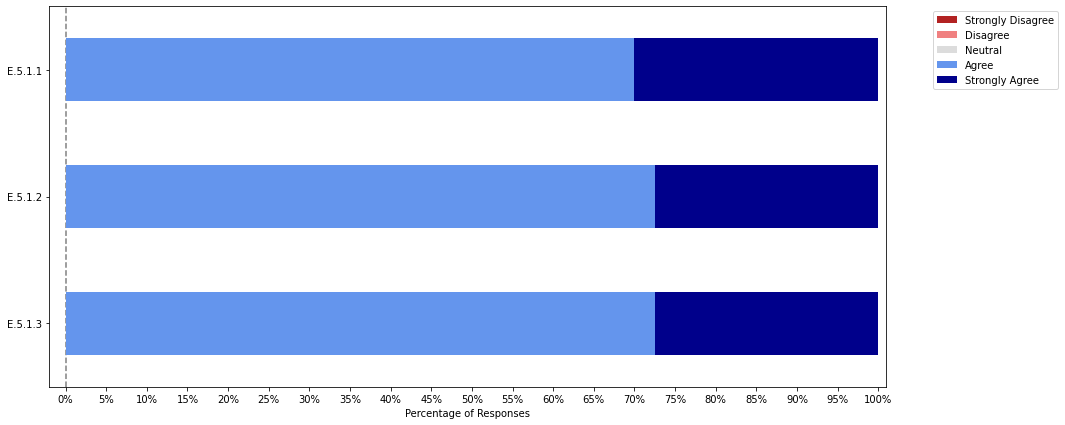

In [ ]:
s30=data_train.iloc[:,190:193]#.replace('En desacuerdo, Neutral','Neutral')
# define my selections
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
# create a likert plot
plot_likert.plot_likert(s30, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s30,myscale1)
#validez
Factorial_fuction.validez(s30)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.9556631892697462
   
Validez de constructo: 
--------------------------------------
Bartlett test: 412.29696442998204  P-Value: 4.802268069052829e-89
KMO: 0.7079133667751207


### Obligación moral

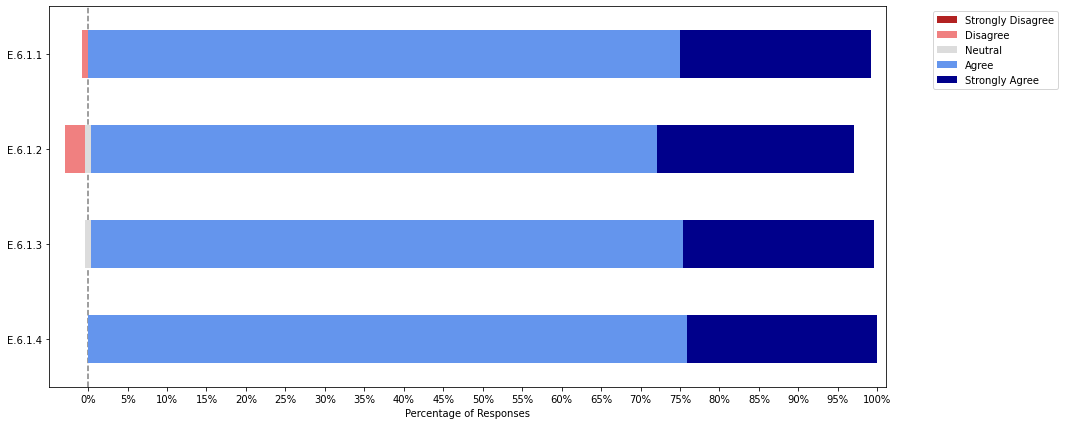

In [ ]:
s31=data_train.iloc[:,193:197]#.replace('En desacuerdo, Neutral','Neutral')
# define my selections
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
# create a likert plot
plot_likert.plot_likert(s31, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s31,myscale1)
#validez
Factorial_fuction.validez(s31)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.9573938020932579
   
Validez de constructo: 
--------------------------------------
Bartlett test: 662.254686154028  P-Value: 8.606078403884011e-140
KMO: 0.8117154890041968


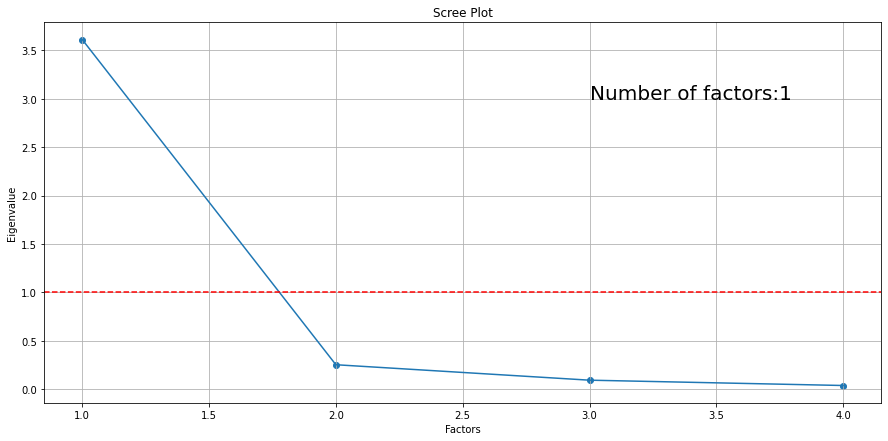

In [ ]:
Factorial_fuction.Nfactores(s31)

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s31.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s31.select_dtypes(include = "float64"))
pd.DataFrame(fa.loadings_)

0
0 -0.974474
1 -0.852343
2 -0.980912
3 -0.922355

In [ ]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1
ss Loadings     3.489014
Proportion Var  0.872254
Cumulative Var  0.872254

### Autoeficacia social emprendedor

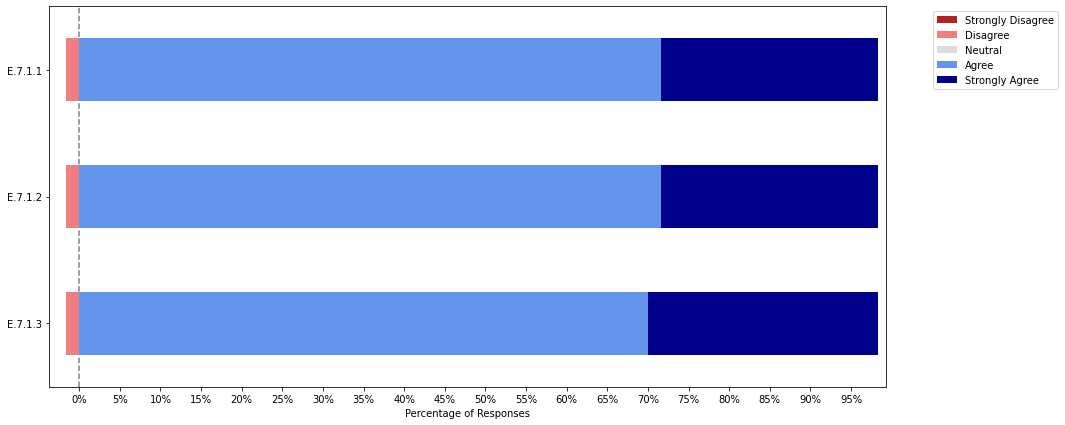

In [ ]:
s32=data_train.iloc[:,197:200]#.replace('En desacuerdo, Neutral','Neutral')
# define my selections
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
# create a likert plot
plot_likert.plot_likert(s32, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s32,myscale1)
#validez
Factorial_fuction.validez(s32)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.9649513538858281
   
Validez de constructo: 
--------------------------------------
Bartlett test: 446.02860918077596  P-Value: 2.3643403222828415e-96
KMO: 0.7622904415635932


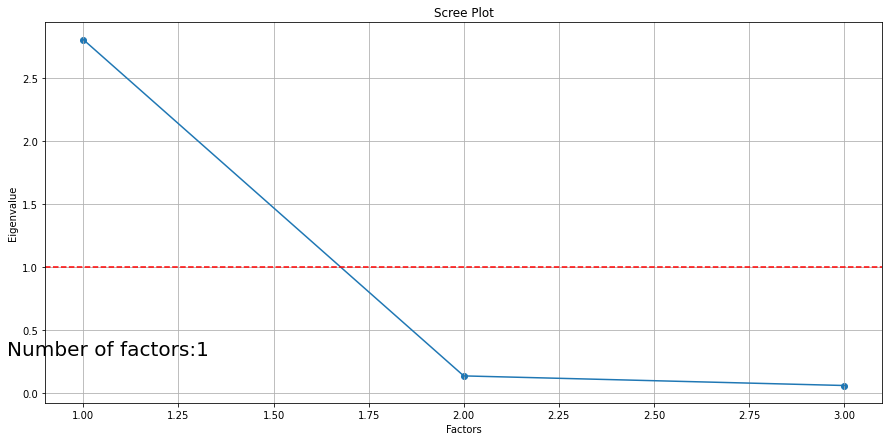

In [ ]:
Factorial_fuction.Nfactores(s32)

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s32.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s32.select_dtypes(include = "float64"))
pd.DataFrame(fa.loadings_)

0
0 -0.969659
1 -0.969659
2 -0.910513

In [ ]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1
ss Loadings     2.709512
Proportion Var  0.903171
Cumulative Var  0.903171

### Apoyo social percibido

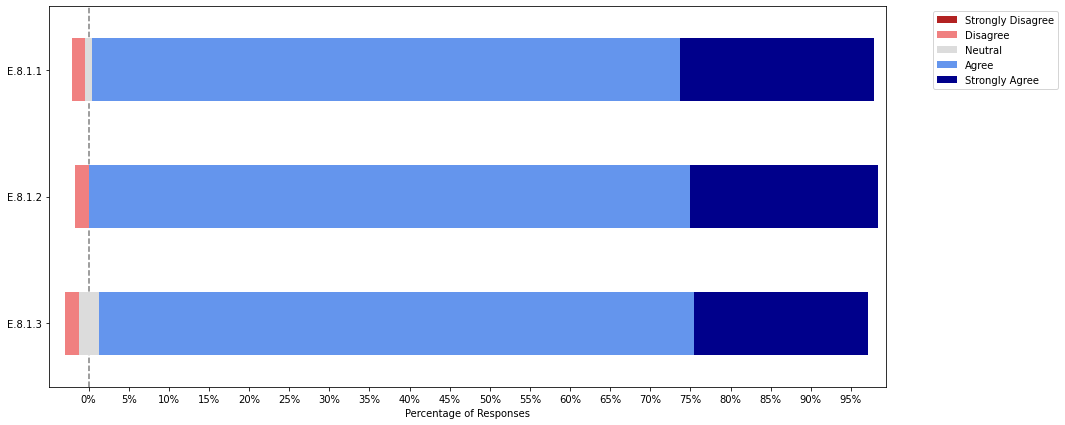

In [ ]:
s33=data_train.iloc[:,200:203].replace('Agree, Strongly Agree','Agree')
# define my selections
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
# create a likert plot
plot_likert.plot_likert(s33, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s33,myscale1)
#validez
Factorial_fuction.validez(s33)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.9443067365316428
   
Validez de constructo: 
--------------------------------------
Bartlett test: 341.694464859435  P-Value: 9.375926843061758e-74
KMO: 0.7515370033185069


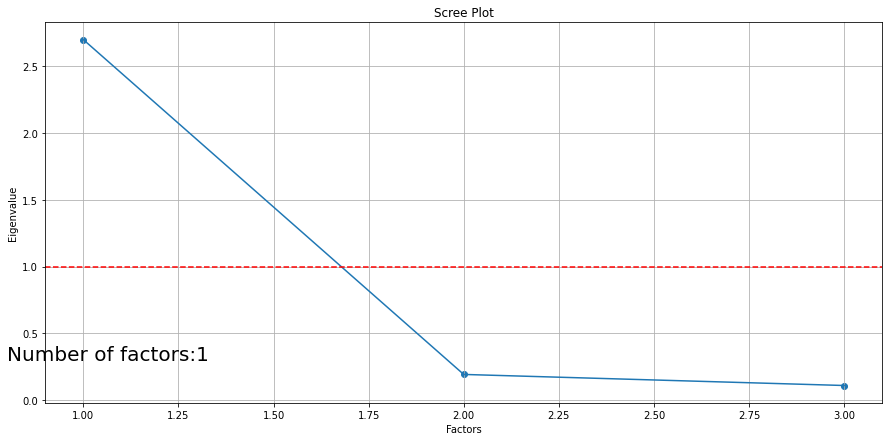

In [ ]:
Factorial_fuction.Nfactores(s33)

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s33.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s33.select_dtypes(include = "float64"))
pd.DataFrame(fa.loadings_)

0
0 -0.905138
1 -0.968027
2 -0.894538

In [ ]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1
ss Loadings     2.556549
Proportion Var  0.852183
Cumulative Var  0.852183

### Intención social emprendedora


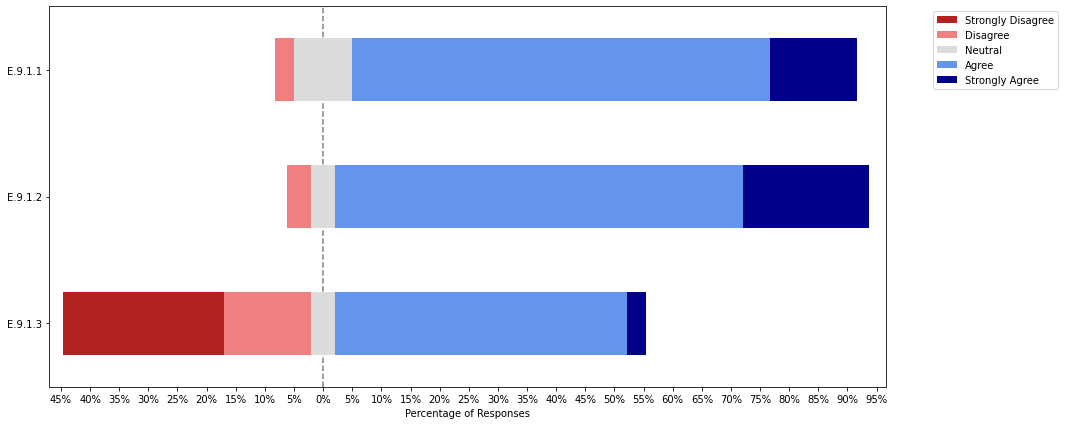

In [ ]:
s34=data_train.iloc[:,203:206].replace('Neutral, Agree','Neutral').replace('Strongly Disagree, Disagree','Disagree').replace('Strongly Disagree, Strongly Agree','Neutral')
# define my selections
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
# create a likert plot
plot_likert.plot_likert(s34, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s34,myscale1)
#validez
Factorial_fuction.validez(s34)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.14707057413456798
   
Validez de constructo: 
--------------------------------------
Bartlett test: 37.42084297806594  P-Value: 3.7483201297518675e-08
KMO: 0.463268496502403


### Uso de TICS

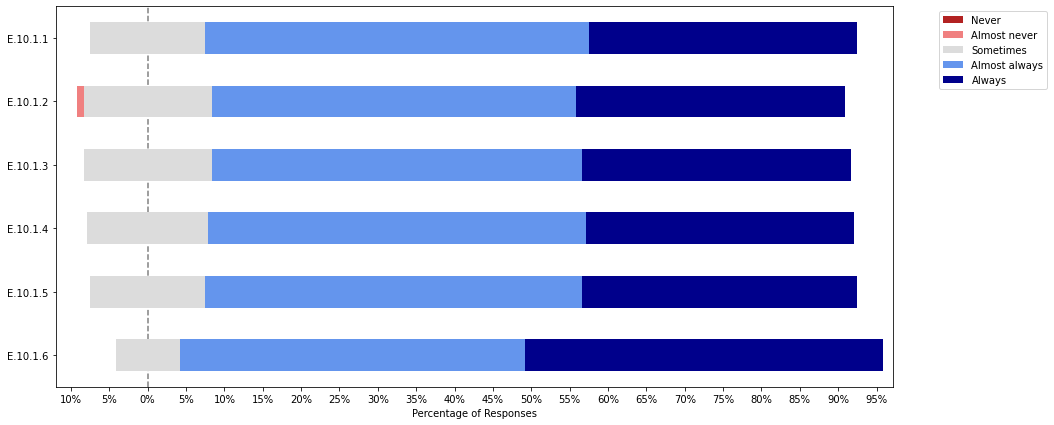

In [ ]:
s35=data_train.iloc[:,206:212]#.replace('Neutral, De acuerdo','Neutral').replace('Muy en desacuerdo, En desacuerdo','En desacuerdo').replace('Muy en desacuerdo, Muy de acuerdo','Neutral')
# define my selections
myscale1 = \
    ['Never',
     'Almost never',
     'Sometimes',
     'Almost always',
     'Always']
# create a likert plot
plot_likert.plot_likert(s35, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s35,myscale1)
#validez
Factorial_fuction.validez(s35)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.9776697247706422
   
Validez de constructo: 
--------------------------------------
Bartlett test: 1588.0576169819417  P-Value: 0.0
KMO: 0.8806774979370986


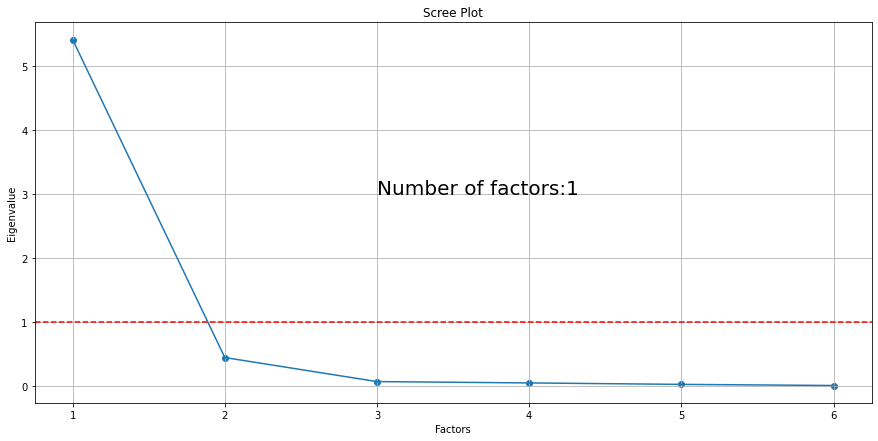

In [ ]:
Factorial_fuction.Nfactores(s35)

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s35.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s35.select_dtypes(include = "float64"))
pd.DataFrame(fa.loadings_)

0
0 -0.978681
1 -0.962606
2 -0.994846
3 -0.993415
4 -0.973318
5 -0.719873

In [ ]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1
ss Loadings     5.326583
Proportion Var  0.887764
Cumulative Var  0.887764

### Habilidades de emprendimiento

<AxesSubplot: xlabel='Percentage of Responses'>

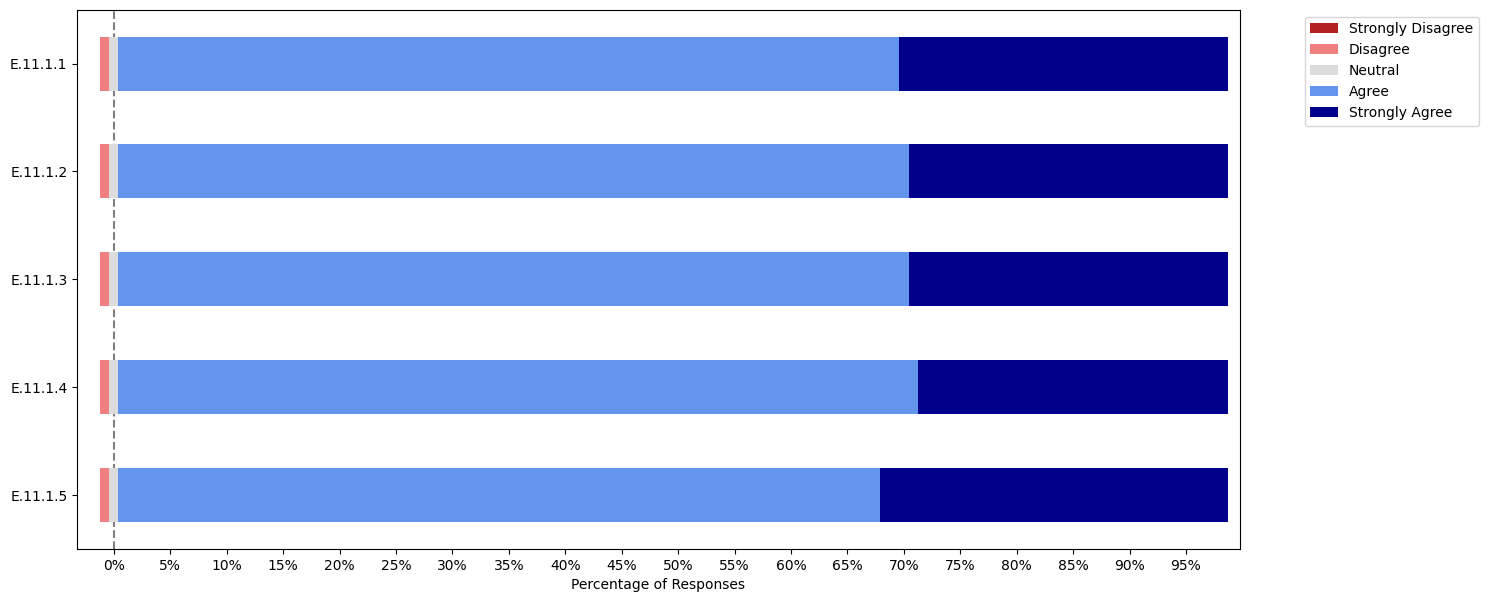

In [105]:
s36=data_train.iloc[:,212:217]#.replace('Neutral, De acuerdo','Neutral').replace('Muy en desacuerdo, En desacuerdo','En desacuerdo').replace('Muy en desacuerdo, Muy de acuerdo','Neutral')
coln=s36.columns
# define my selections
myscale1 = \
    ['Strongly Disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly Agree']
# create a likert plot
plot_likert.plot_likert(s36, myscale1, plot_percentage=True)

In [106]:
# codificar las variables
Factorial_fuction.Coding(s36,myscale1)
#validez
Factorial_fuction.validez(s36)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.9837810527271904
   
Validez de constructo: 
--------------------------------------
Bartlett test: 1232.2238940493721  P-Value: 1.6115085162665708e-258
KMO: 0.742023079970757


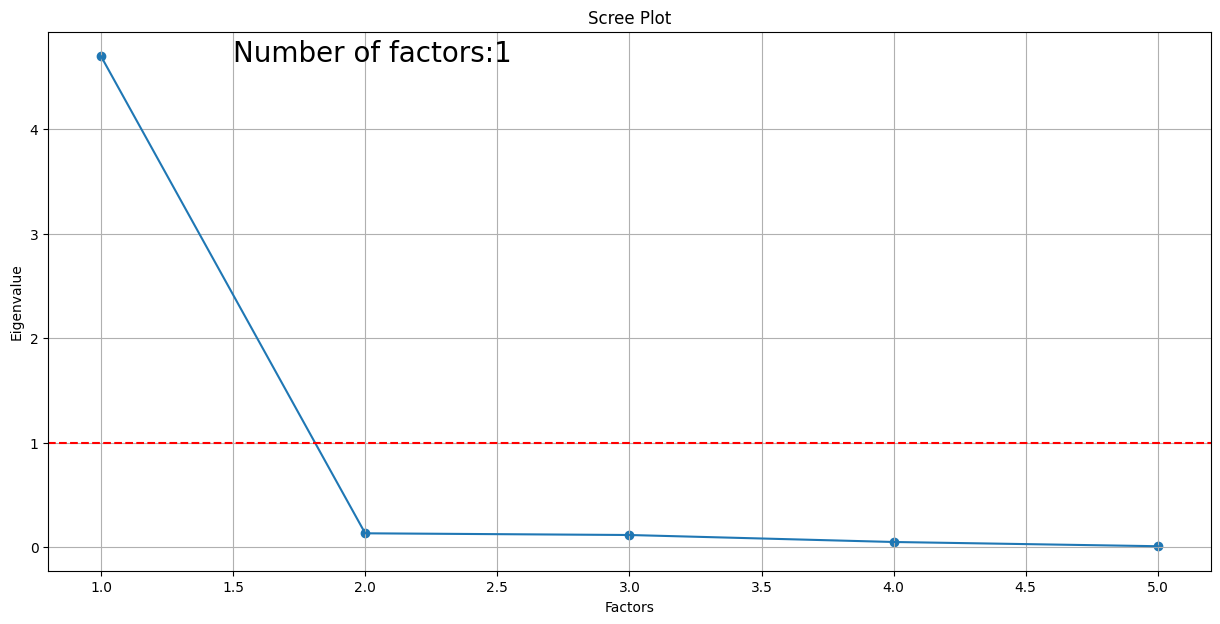

In [107]:
Factorial_fuction.Nfactores(s36)

In [108]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s36.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s36.select_dtypes(include = "float64"))
fact = fa.loadings_
a = np.zeros((len(fact), len(fact[0,:])))
for i in range(len(fact)):
    arr = fact[i,:]
    ind=np.where(arr==max(arr))[0]
    a[i,ind]=fact[i,:].max()
    
pd.DataFrame(np.round(a,3), 
             columns=['Factor '+str(i+1) for i in range(len(fact[0,:]))],
             index=coln)

Factor 1
E.11.1.1    -0.979
E.11.1.2    -0.973
E.11.1.3    -0.950
E.11.1.4    -0.978
E.11.1.5    -0.927

In [109]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1
ss Loadings     4.623492
Proportion Var  0.924698
Cumulative Var  0.924698

# Variables dependientes

## Valor economico

### Stakeholders

Text(0.5, 0, 'Frecuency')

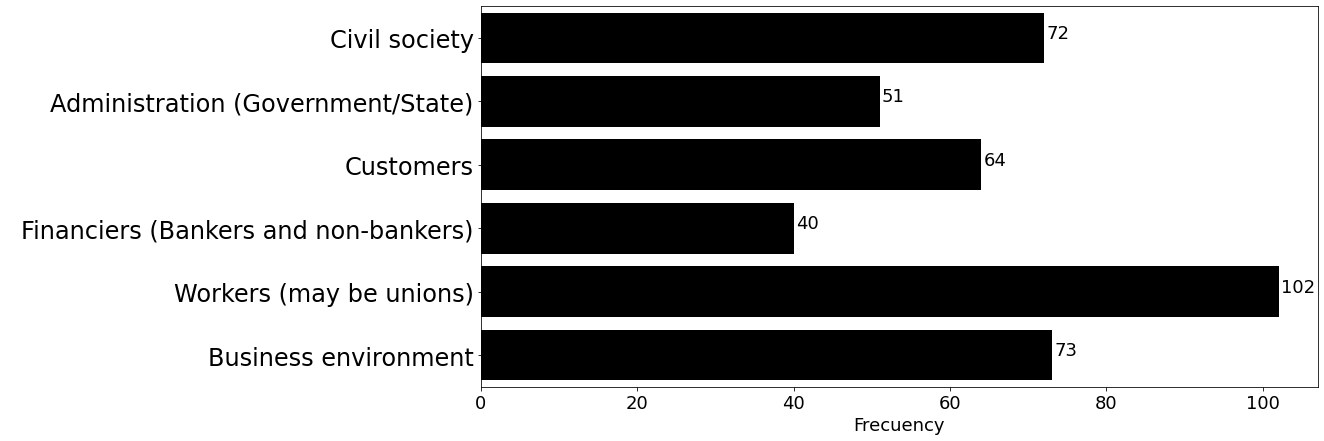

In [ ]:
# F.1.1. Señale los grupos de interés (stakeholders) que participan en su empresa social (pueden ser todos o algunos)  :

gr = [data_train.iloc[:,217][i].split(sep=',') for i in range(120)]
gr=[elem for sublista in gr for elem in sublista]
gr=[x.replace(',','') for x in gr]
gr=[x.strip() for x in gr]
gr=pd.DataFrame({'Tipo':gr})
ax=sns.countplot(y="Tipo", data=gr, color='k')
Factorial_fuction.without_hueH(ax,gr['Tipo'])
ax.set_xlim(0,max(gr["Tipo"].value_counts())+5)
labels = ("Civil society", 
          "Administration (Government/State)", 
          "Customers",
          "Financiers (Bankers and non-bankers)",
          "Workers (may be unions)",
          "Business environment")
ax.set_yticklabels(labels)
# plt.ylabel("The stakeholders involved in your social enterprise ")
plt.ylabel(' ')
plt.xticks(fontsize = 18, rotation=0)
plt.yticks(fontsize = 24, rotation=0)
# plt.ylabel("Network types", fontsize=18)
plt.xlabel('Frecuency', fontsize=18)

### Crecimiento

Text(0, 0.5, 'Frecuency')

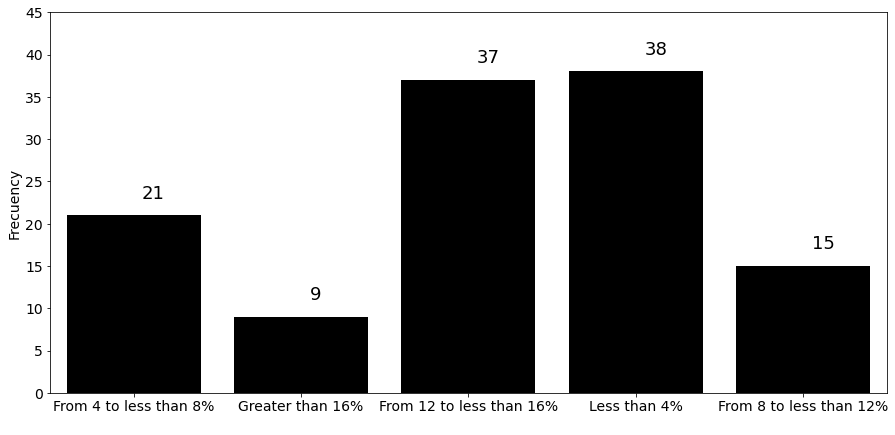

In [ ]:
# F.1.2.1. Cuál es la tasa promedio de crecimiento potencial de su empresa :
ax=sns. countplot(data_train.iloc[:,218], color='k')
ax.set_ylim(0,45)
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)
Factorial_fuction.with_hue(ax,data_train.iloc[:,218])
plt.ylabel("Frecuency")
# plt.xlabel("Stratum")
labels = ("From 4 to less than 8%", 
          "Greater than 16%", 
          "From 12 to less than 16%",
          "Less than 4%",
          "From 8 to less than 12%")
ax.set_xticklabels(labels)
# plt.xlabel("Average growth rate")
# plt.ylabel('Frecuency')
plt.xlabel(' ')
plt.yticks(fontsize = 14, rotation=0)
plt.xticks(fontsize = 14, rotation=0)
# plt.ylabel("Network types", fontsize=18)
plt.ylabel('Frecuency', fontsize=14)

Text(0, 0.5, 'Frecuency')

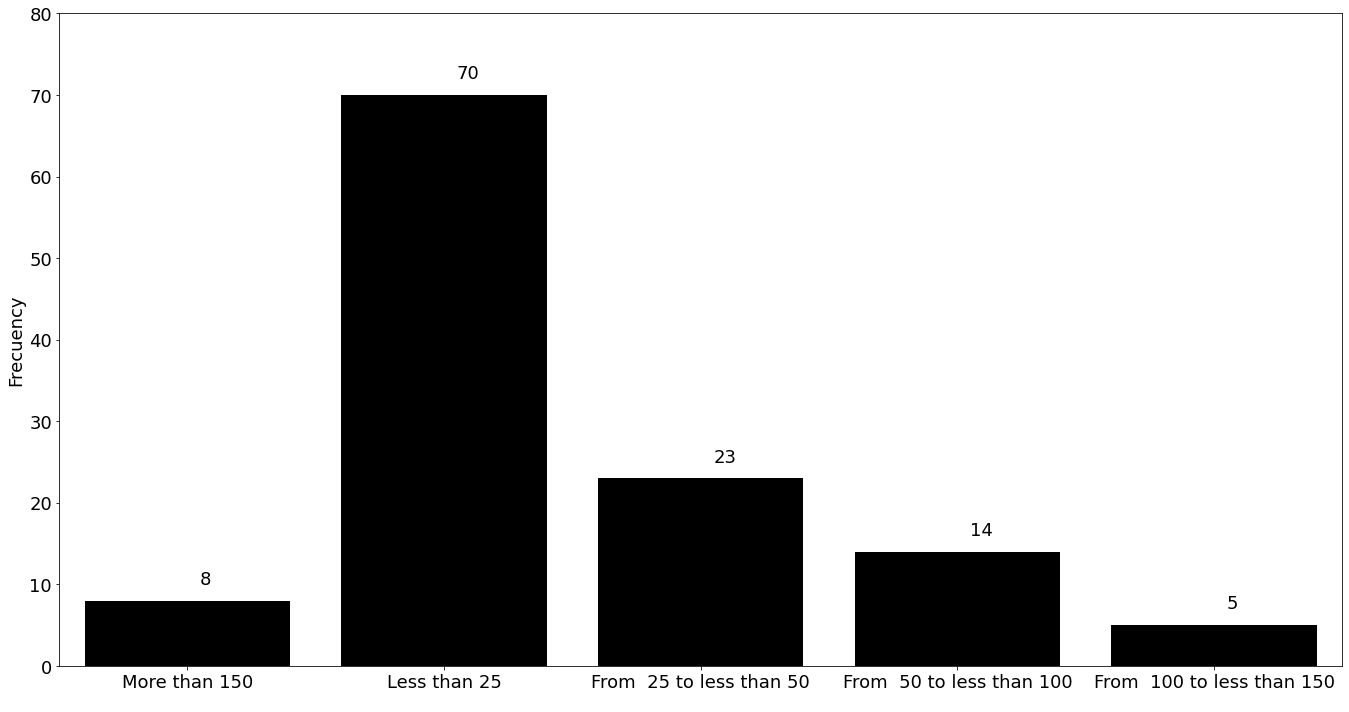

In [ ]:
# F.1.2.2. Cuál es el promedio de ingresos anuales de su empresa del último año
fig, ax = plt.subplots(1, 1, figsize=(23, 12))
ax=sns. countplot(data_train.iloc[:,219], color="k")
ax.set_ylim(0,80)
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)
Factorial_fuction.with_hue(ax,data_train.iloc[:,219])
plt.ylabel("Frecuency")
# plt.xlabel("Stratum")
labels = ("More than 150", 
          "Less than 25", 
          "From  25 to less than 50",
          "From  50 to less than 100",
          "From  100 to less than 150")
ax.set_xticklabels(labels)
# plt.xlabel("Average annual income")
plt.xlabel(' ')
plt.yticks(fontsize = 18, rotation=0)
plt.xticks(fontsize = 18, rotation=0)
# plt.ylabel("Network types", fontsize=18)
plt.ylabel('Frecuency', fontsize=18)

cifras en 1.000.000 de pesos . ejemplo: 150= $150.000.000

Text(0, 0.5, 'Frecuency')

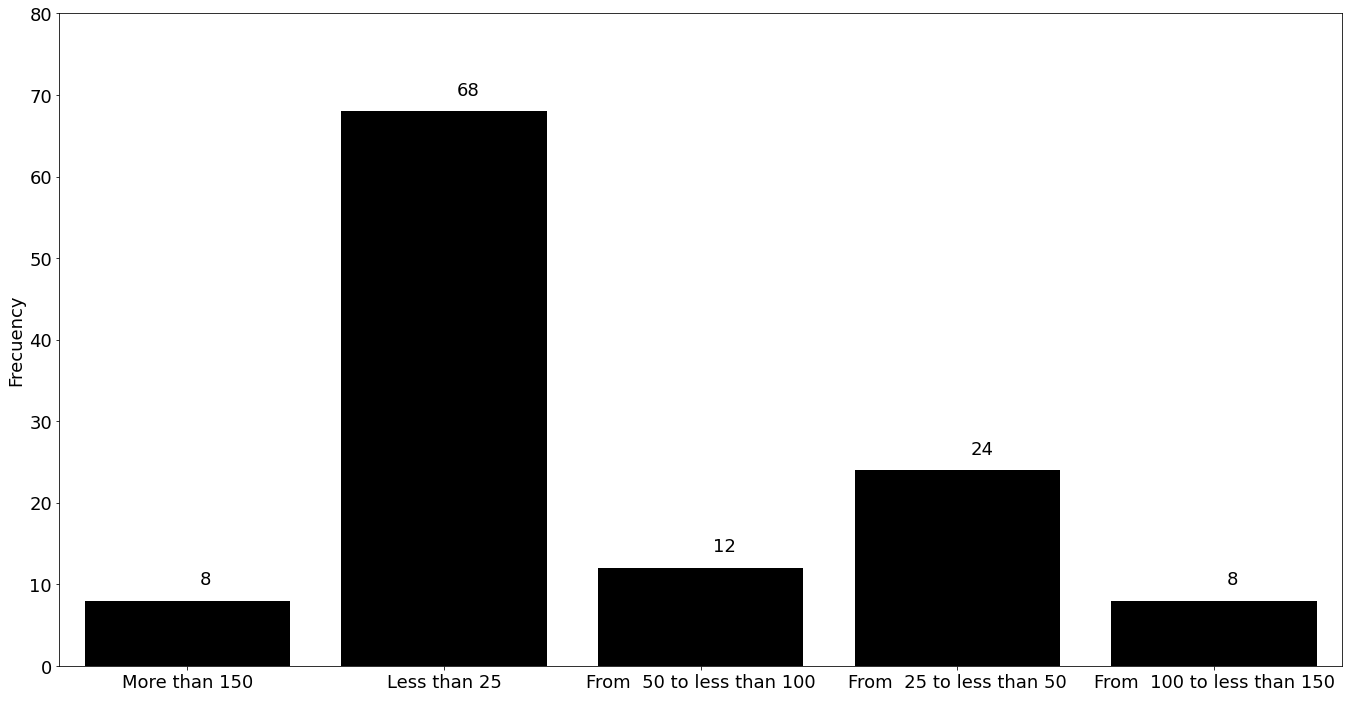

In [ ]:
# F.1.2.3. Cuál es el promedio de activos anuales de su empresa
fig, ax = plt.subplots(1, 1, figsize=(23, 12))
ax=sns. countplot(data_train.iloc[:,220], color="k")
ax.set_ylim(0,80)
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 10)
Factorial_fuction.with_hue(ax,data_train.iloc[:,220])
plt.ylabel("Frecuency")
# plt.xlabel("Stratum")

labels = ("More than 150", 
          "Less than 25", 
          "From  50 to less than 100",
          "From  25 to less than 50",
          "From  100 to less than 150")
ax.set_xticklabels(labels)
# plt.xlabel("Average annual assets")
plt.xlabel(' ')
plt.yticks(fontsize = 18, rotation=0)
plt.xticks(fontsize = 18, rotation=0)
# plt.ylabel("Network types", fontsize=18)
plt.ylabel('Frecuency', fontsize=18)

Text(0, 0.5, 'Frecuency')

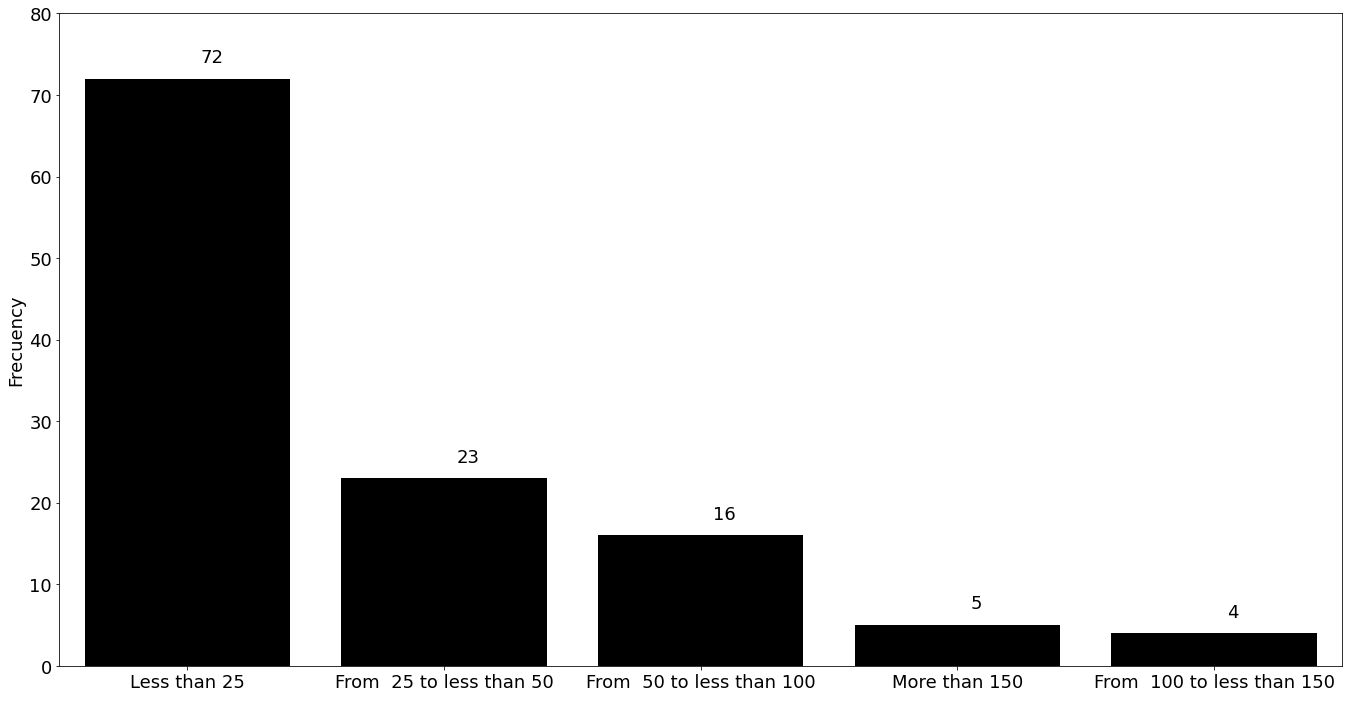

In [ ]:
# F.1.2.4. Cuál es el promedio de utilidades anuales de su empresa:
fig, ax = plt.subplots(1, 1, figsize=(23, 12))
ax=sns. countplot(data_train.iloc[:,221],color="k")
ax.set_ylim(0,80)
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 10)
Factorial_fuction.with_hue(ax,data_train.iloc[:,221])
# plt.xlabel("")
labels = ("Less than 25", 
          "From  25 to less than 50", 
          "From  50 to less than 100",
          "More than 150",
          "From  100 to less than 150")
ax.set_xticklabels(labels)
# plt.xlabel("Average annual profit")
plt.xlabel(' ')
plt.yticks(fontsize = 18, rotation=0)
plt.xticks(fontsize = 18, rotation=0)
# plt.ylabel("Network types", fontsize=18)
plt.ylabel('Frecuency', fontsize=18)

Text(0, 0.5, 'Frecuency')

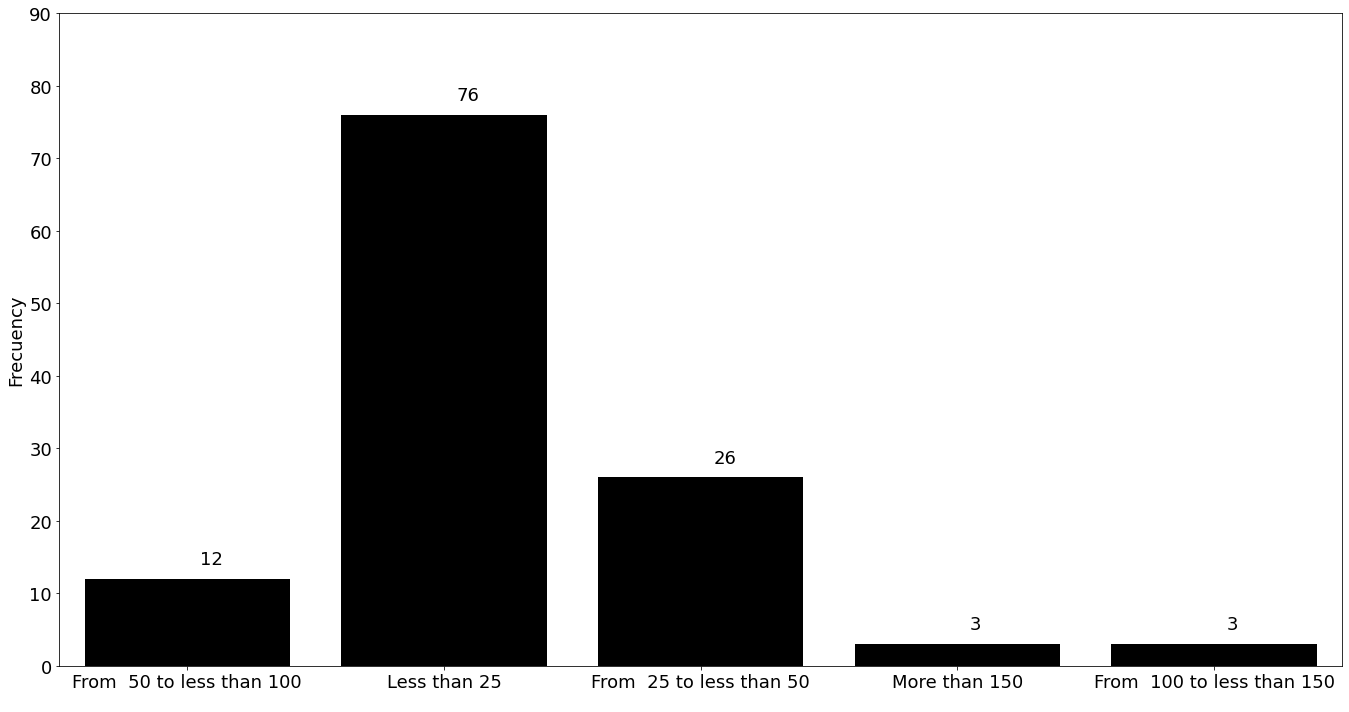

In [ ]:
# F.1.2.5. Cuál es el monto de costos y gastos de su empresa:
fig, ax = plt.subplots(1, 1, figsize=(23, 12))
ax=sns. countplot(data_train.iloc[:,222], color="k")
ax.set_ylim(0,90)
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 10)
Factorial_fuction.with_hue(ax,data_train.iloc[:,222])

labels = ("From  50 to less than 100", 
          "Less than 25", 
          "From  25 to less than 50",
          "More than 150",
          "From  100 to less than 150")
ax.set_xticklabels(labels)
# plt.xlabel("Average annual costs and expenses")
plt.xlabel(' ')
plt.yticks(fontsize = 18, rotation=0)
plt.xticks(fontsize = 18, rotation=0)
# plt.ylabel("Network types", fontsize=18)
plt.ylabel('Frecuency', fontsize=18)

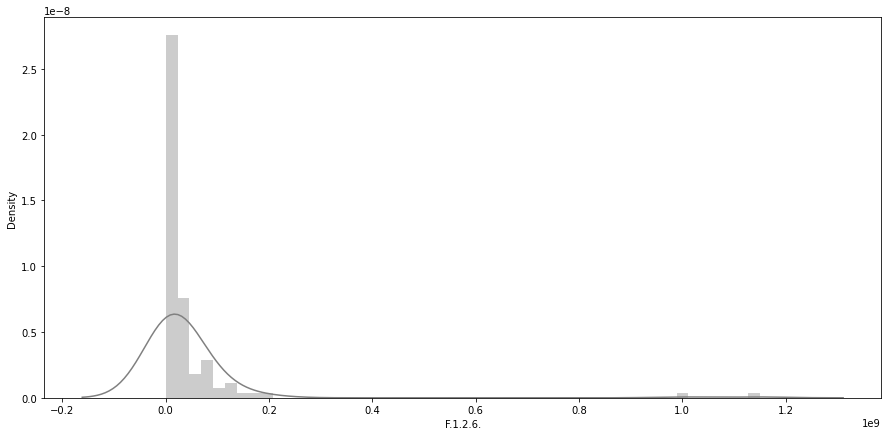

In [ ]:
# F.1.2.6. Valor neto de los ingresos de la operación social en pesos colombianos del último año (2020):
ingresos=data_train.iloc[:,223]
sns.distplot(ingresos, color="grey")

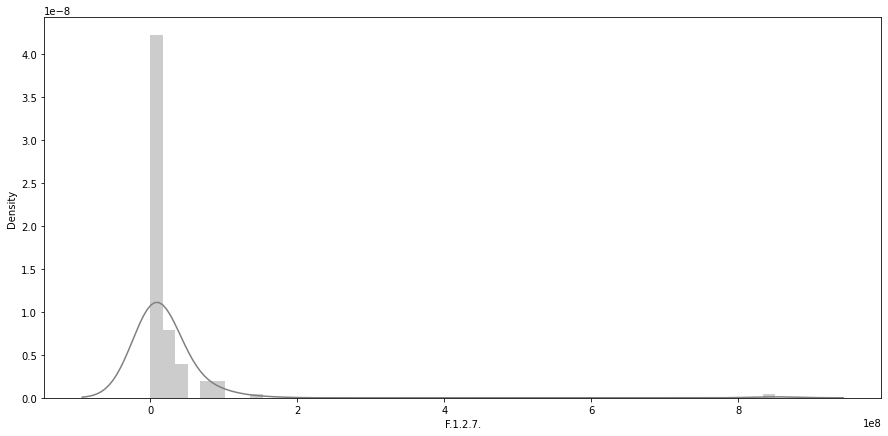

In [ ]:
# F.1.2.7. Valor neto de las inversiones en pesos colombianos del último año (2020):
ingresos=data_train.iloc[:,224]
sns.distplot(ingresos, color="grey")

## Valor social

Text(0.5, 0, 'Frecuency')

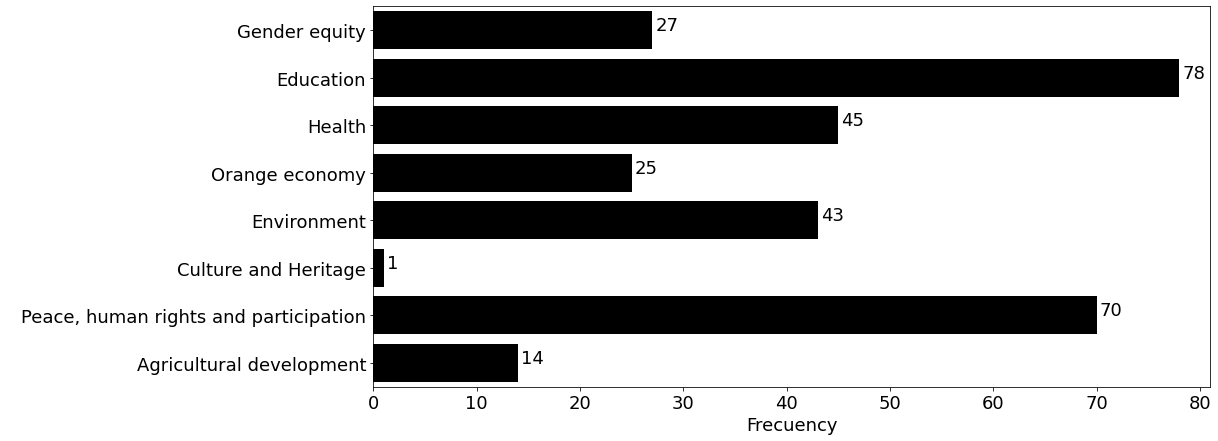

In [ ]:
# F.2.1. Indique en cuál de las siguientes áreas su empresa mejora las condiciones o características de la población objetivo:
area = [data_train.iloc[:,225][i].split(sep=',') for i in range(120)]
area=[elem for sublista in area for elem in sublista]
area=[x.replace(',','') for x in area]
area=[x.strip() for x in area]
area=pd.DataFrame({'Tipo':area})
ax=sns.countplot(y="Tipo", data=area,color="k")
Factorial_fuction.without_hueH(ax,area['Tipo'])
ax.set_xlim(0,max(area["Tipo"].value_counts())+3)
labels = ("Gender equity", "Education", "Health", "Orange economy", "Environment", "Culture and Heritage", 
          "Peace, human rights and participation", "Agricultural development")
ax.set_yticklabels(labels)
plt.ylabel(' ')
plt.yticks(fontsize = 18, rotation=0)
plt.xticks(fontsize = 18, rotation=0)
# plt.ylabel("Network types", fontsize=18)
plt.xlabel('Frecuency', fontsize=18)

Text(0, 0.5, 'Frecuency')

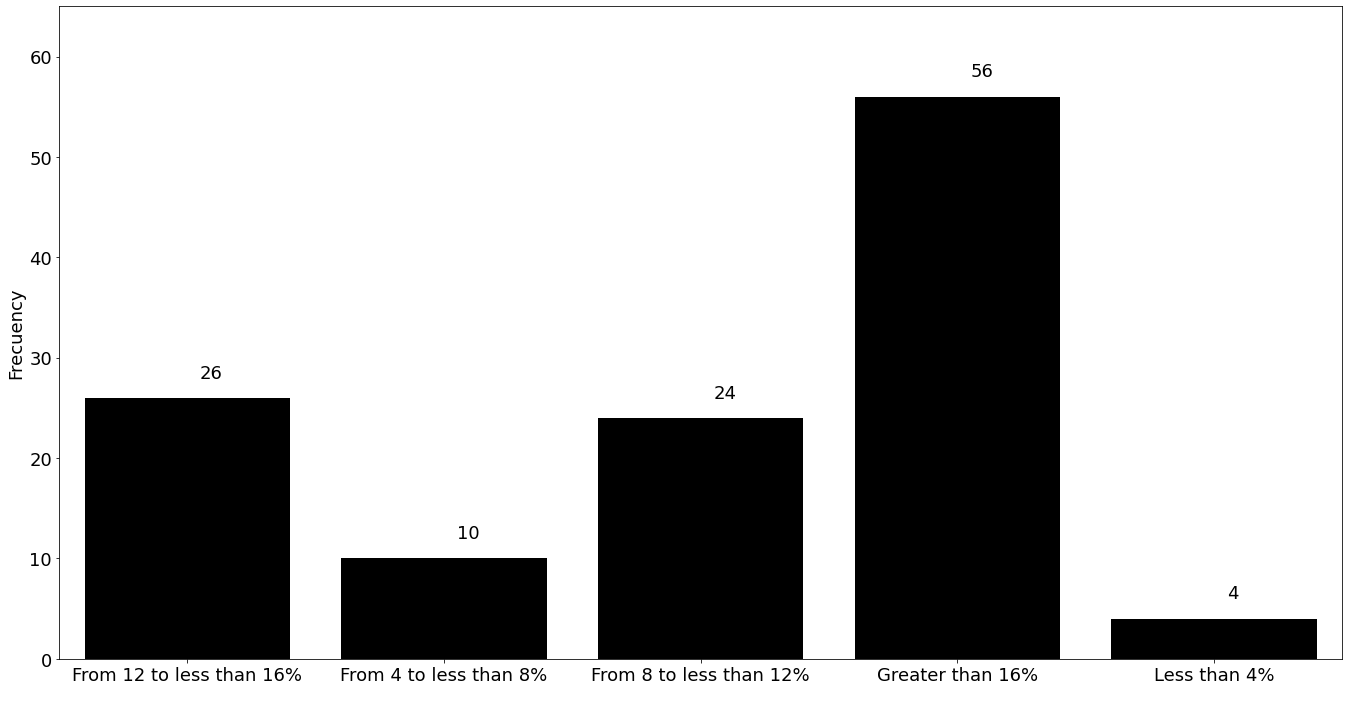

In [ ]:
# F.2.2. Si tuviera que valorar porcentualmente, el grado de contribución al mejoramiento de la calidad de vida de la población objetivo de su empresa, cual sería:
fig, ax = plt.subplots(1, 1, figsize=(23, 12))
ax=sns. countplot(data_train.iloc[:,226], color="k")
ax.set_ylim(0,65)
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 10)
Factorial_fuction.with_hue(ax,data_train.iloc[:,226])
labels = ("From 12 to less than 16%", 
          "From 4 to less than 8%", 
          "From 8 to less than 12%",
          "Greater than 16%",
          "Less than 4%")
ax.set_xticklabels(labels)
# plt.xlabel("Degree of contribution to the improvement of the quality of life of the target population")
plt.xlabel(' ')
plt.yticks(fontsize = 18, rotation=0)
plt.xticks(fontsize = 18, rotation=0)
# plt.ylabel("Network types", fontsize=18)
plt.ylabel('Frecuency', fontsize=18)

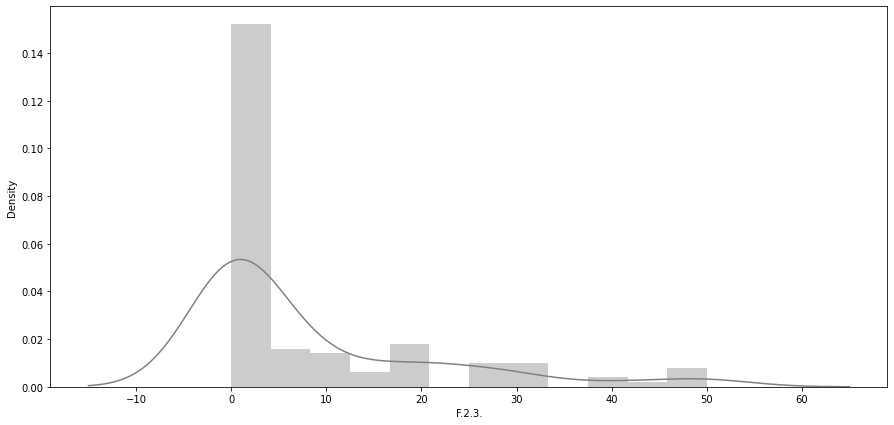

In [ ]:
# F.2.3. Cuantos trabajadores en condición de discapacidad tiene la ES:
disca=data_train.iloc[:,227]
sns.distplot(disca, color="grey")

Text(0, 0.5, 'Frecuency')

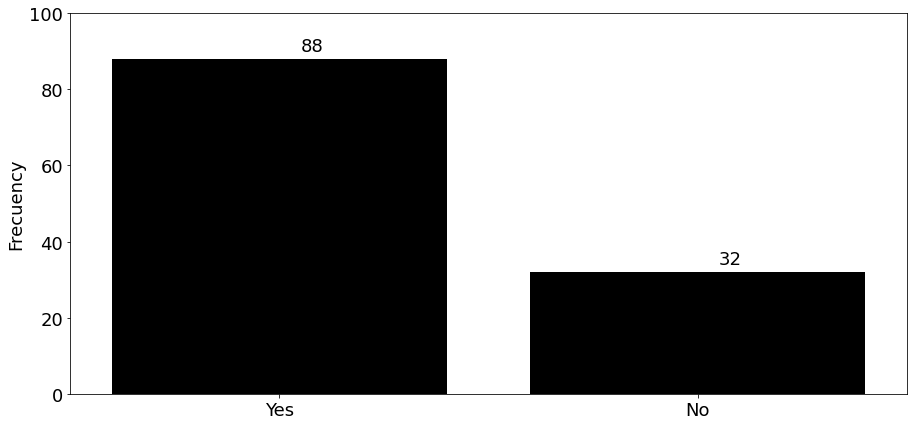

In [ ]:
#F.2.4. ¿La empresa social realiza aportes a seguridad social de sus empleados?
ax=sns. countplot(data_train.iloc[:,228], color="k")
ax.set_ylim(0,100)
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 10)
Factorial_fuction.with_hue(ax,data_train.iloc[:,228])
labels = ("Yes", 
          "No")
ax.set_xticklabels(labels)
# plt.xlabel("Employee social security contributions")
plt.xlabel(' ')
plt.yticks(fontsize = 18, rotation=0)
plt.xticks(fontsize = 18, rotation=0)
# plt.ylabel("Network types", fontsize=18)
plt.ylabel('Frecuency', fontsize=18)

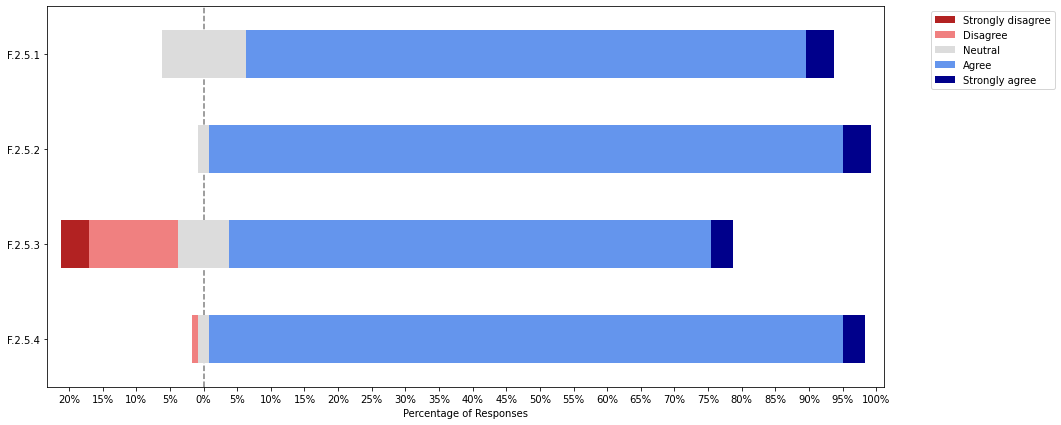

In [ ]:
s37=data_train.iloc[:,229:233]#.replace('Neutral, De acuerdo','Neutral').replace('Muy en desacuerdo, En desacuerdo','En desacuerdo').replace('Muy en desacuerdo, Muy de acuerdo','Neutral')
# define my selections
myscale1 = \
    ['Strongly disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s37, myscale1, plot_percentage=True)

In [ ]:
# codificar las variables
Factorial_fuction.Coding(s37,myscale1)
#validez
Factorial_fuction.validez(s37)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.42044418255538263
   
Validez de constructo: 
--------------------------------------
Bartlett test: 83.6288867049293  P-Value: 6.347540096144095e-16
KMO: 0.5078349276609502


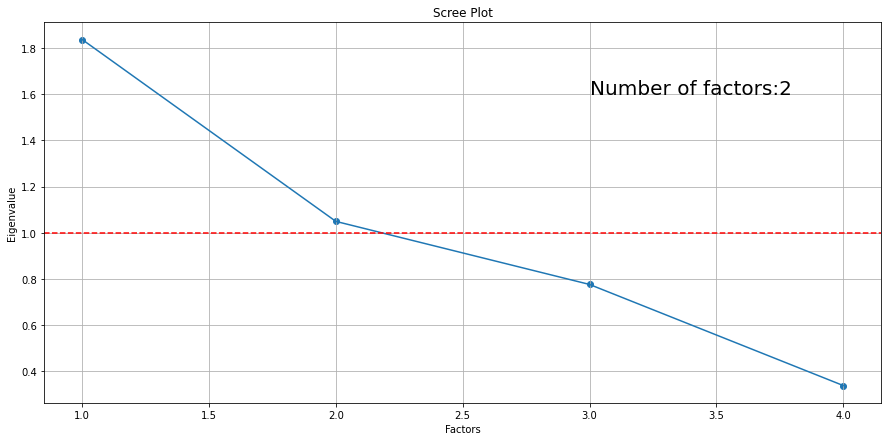

In [ ]:
Factorial_fuction.Nfactores(s37)

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s37.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s37.select_dtypes(include = "float64"))
pd.DataFrame(fa.loadings_)

0         1
0  0.615908  0.182060
1  1.000363  0.039392
2  0.053482  0.997162
3  0.212711  0.238215

In [ ]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1  factor 2
ss Loadings     1.428174  1.085775
Proportion Var  0.357044  0.271444
Cumulative Var  0.357044  0.628487

<AxesSubplot: xlabel='Percentage of Responses'>

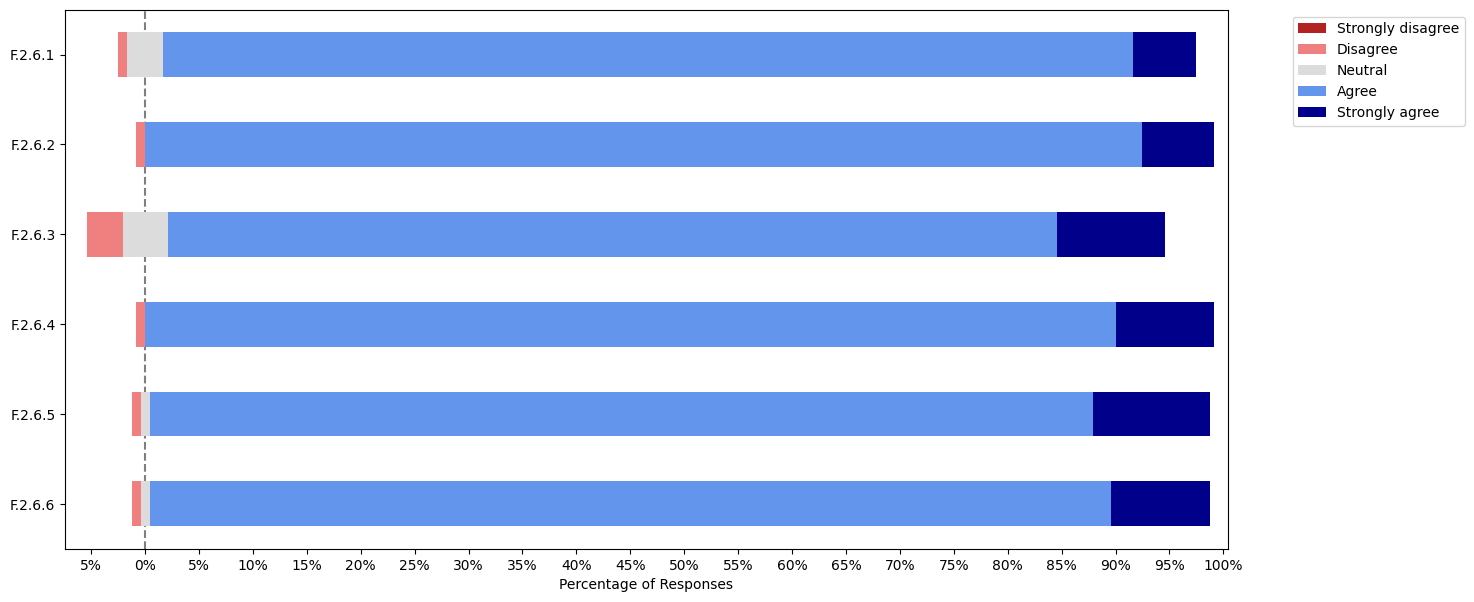

In [62]:
# Contribución social
s38=data_train.iloc[:,233:239]#.replace('Neutral, De acuerdo','Neutral').replace('Muy en desacuerdo, En desacuerdo','En desacuerdo').replace('Muy en desacuerdo, Muy de acuerdo','Neutral')
coln=s38.columns
# define my selections
myscale1 = \
    ['Strongly disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s38, myscale1, plot_percentage=True)

In [63]:
# codificar las variables
Factorial_fuction.Coding(s38,myscale1)
#validez
Factorial_fuction.validez(s38)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.9168335453891683
   
Validez de constructo: 
--------------------------------------
Bartlett test: 691.0206302685186  P-Value: 1.5235762292316731e-137
KMO: 0.8666738670637971


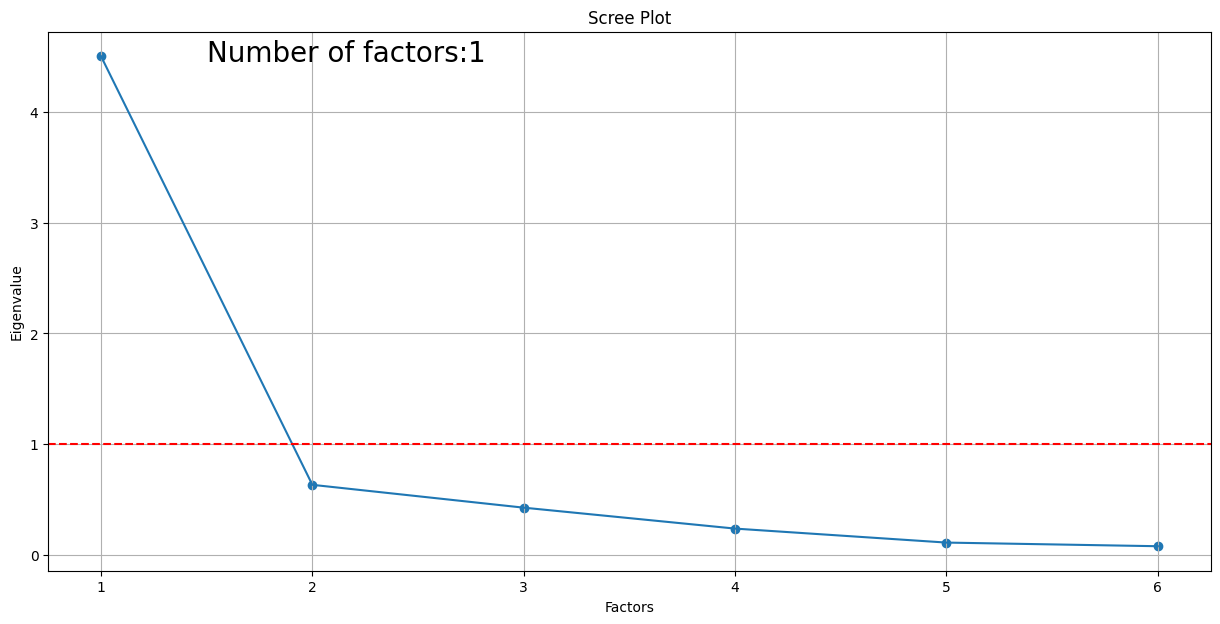

In [64]:
Factorial_fuction.Nfactores(s38)

In [65]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s38.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s38.select_dtypes(include = "float64"))
fact = fa.loadings_
a = np.zeros((len(fact), len(fact[0,:])))
for i in range(len(fact)):
    arr = fact[i,:]
    ind=np.where(arr==max(arr))[0]
    a[i,ind]=fact[i,:].max()
    
pd.DataFrame(np.round(a,3), 
             columns=['Factor '+str(i+1) for i in range(len(fact[0,:]))],
             index=coln)

Factor 1
F.2.6.1    -0.749
F.2.6.2    -0.935
F.2.6.3    -0.648
F.2.6.4    -0.972
F.2.6.5    -0.847
F.2.6.6    -0.854

In [66]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1
ss Loadings     4.245100
Proportion Var  0.707517
Cumulative Var  0.707517

<AxesSubplot: xlabel='Percentage of Responses'>

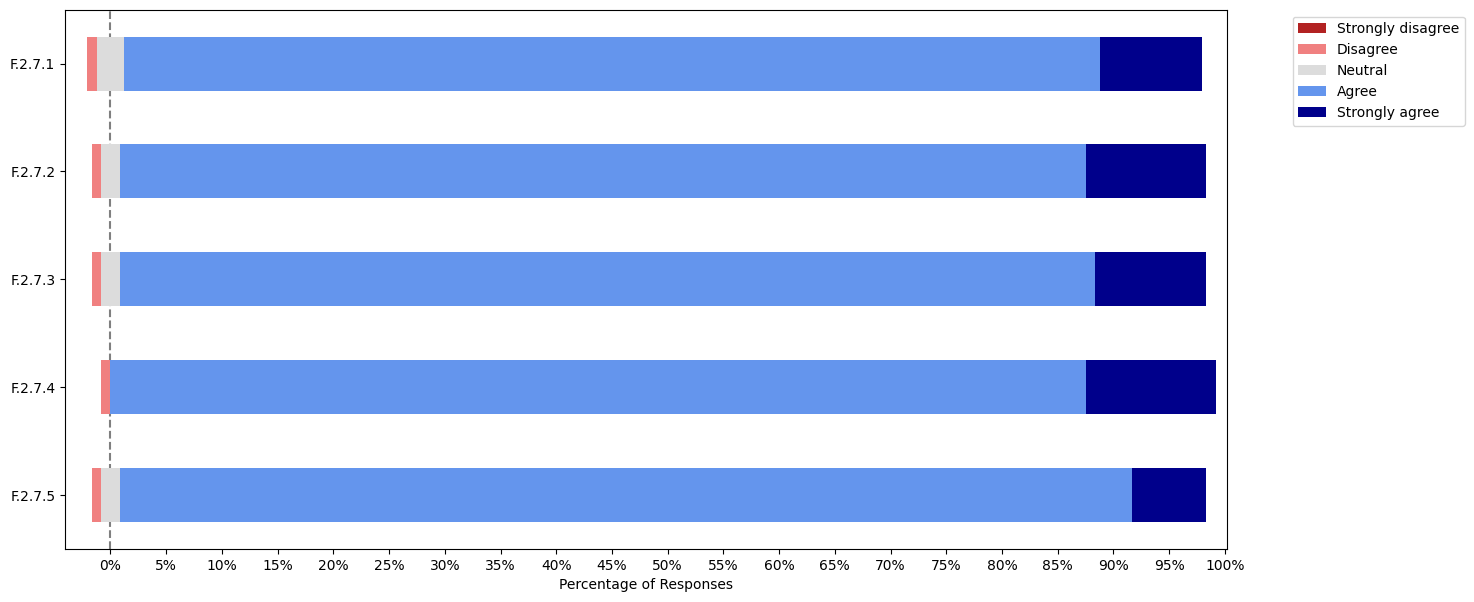

In [72]:
# Resultado social
s39=data_train.iloc[:,239:244]#.replace('Neutral, De acuerdo','Neutral').replace('Muy en desacuerdo, En desacuerdo','En desacuerdo').replace('Muy en desacuerdo, Muy de acuerdo','Neutral')
# define my selections
myscale1 = \
    ['Strongly disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly agree']
# create a likert plot
plot_likert.plot_likert(s39, myscale1, plot_percentage=True)

In [73]:
# codificar las variables
Factorial_fuction.Coding(s39,myscale1)
#validez
Factorial_fuction.validez(s39)

Validez de criterio: 
--------------------------------------
Alfa de cronbanch: 0.9110072773167915
   
Validez de constructo: 
--------------------------------------
Bartlett test: 462.48184838214047  P-Value: 4.538736650416563e-93
KMO: 0.7804651344911305


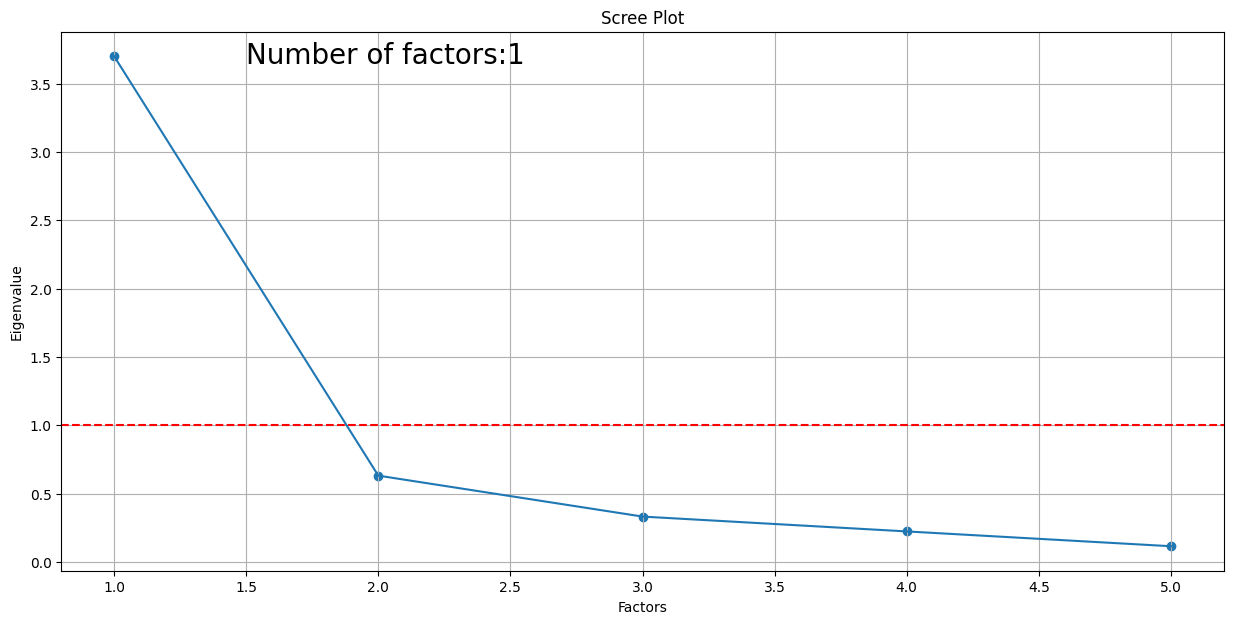

In [74]:
Factorial_fuction.Nfactores(s39)

In [75]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(s39.select_dtypes(include = "float64"))
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
fa.set_params(n_factors=np.sum(ev>1), rotation='varimax')
fa.fit(s39.select_dtypes(include = "float64"))
pd.DataFrame(fa.loadings_)

0
0 -0.846933
1 -0.821695
2 -0.796512
3 -0.778180
4 -0.864645

In [76]:
# Get variance of each factors
var=pd.DataFrame(fa.get_factor_variance())
var.index=['ss Loadings','Proportion Var','Cumulative Var']
ev, v = fa.get_eigenvalues()
var.columns=['factor '+str(i+1) for i in range(np.sum(ev>1))]
var

factor 1
ss Loadings     3.380085
Proportion Var  0.676017
Cumulative Var  0.676017

https://es.acervolima.com/tabla-de-contingencia-en-python/